# Will it be delayed?

Everyone who has flown has experienced a delayed or cancelled flight. Both airlines and airports would like to improve their on-time performance and predict when a flight will be delayed or cancelled several days in advance. You are being hired to build a model that can predict if a flight will be delayed. To learn more, you must schedule a meeting with your client (me). To schedule an appointment with your client, send an event request through Google Calendar for a 15 minute meeting. Both you and your project partner must attend the meeting. Come prepared with questions to ask your client. Remember that your client is not a data scientist and you will need to explain things in a way that is easy to understand. Make sure that your communications are efficient, thought out, and not redundant as your client might get frustrated and "fire" you (this only applies to getting information from your client, this does not necessary apply to asking for help with the actual project itself - you should continuously ask questions for getting help).

For this project you must go through most all steps in the checklist. You must write responses for all items as done in the homeworks, however sometimes the item will simply be "does not apply". Keep your progress and thoughts organized in this document and use formatting as appropriate (using markdown to add headers and sub-headers for each major part). Some changes to the checklist:

* Do not do the final part (launching the product).
* Your presentation will be done as information written in this document in a dedicated section (no slides or anything like that). It should include high-level summary of your results (including what you learned about the data, the "accuracy" of your model, what features were important, etc). It should be written for your client, not your professor or teammates. It should include the best summary plots/graphics/data points.
* The models and hyperparameters you should consider during short-listing and fine-tuning will be released at a later time (dependent on how far we get over the next two weeks).
* Data retrieval must be automatic as part of the code (so it can easily be re-run and grab the latest data). Do not commit any data to the repository.
* Your submission must include a pickled final model along with this notebook.

# **Frame the Problem and Look at the Big Picture**  

#### **1. Define the Objective in Business Terms**  
Airlines and airports experience frequent flight delays and cancellations, leading to passenger dissatisfaction and operational inefficiencies. The goal of this project is to develop a **multiclass classification model** that can **predict flight delays or cancellations** **7 days in advance**. The ability to predict disruptions early allows airlines to:  
- Reallocate aircraft and crew.  
- Notify passengers and offer rebooking options.  
- Optimize airport operations and prevent cascading delays.  

This project will focus on **domestic U.S. flights** and will exclude **international and diverted flights** to maintain consistency in the dataset.  

#### **2. How Will the Solution Be Used?**  
- The model will be run **daily**, providing updated predictions on which flights are likely to experience delays or cancellations.  
- Airlines can integrate the predictions into their **scheduling and rebooking systems**, enabling proactive customer communication.  
- Airports can use this data to **allocate ground resources efficiently** and manage air traffic congestion.  

#### **3. What Are the Current Solutions/Workarounds (If Any)?**  
- Currently, airlines and airports rely on **historical trends, weather forecasts, and real-time operational data** to predict delays.  
- Most delay tracking is **reactive**—flights are only flagged **after** they experience a disruption.  
- Government agencies such as the **Bureau of Transportation Statistics (BTS)** track flight performance, but their reports are **only available months after the fact**.  

#### **4. How Should You Frame This Problem?**  
This is a **supervised multiclass classification problem** since we are predicting a categorical outcome (on-time, minor delay, medium delay, major delay, or cancelled).  
- The model will be trained on historical flight data, with **flight status (delay/cancellation) as the target variable**. 
- under 15 delay ignore, 15-60 mins is minor, medium 60 mins-3 hours, major above 3 hour with combinations to reasoning of delay
- Since the model is used for forecasting rather than real-time decision-making, it does **not** need to be deployed in a real-time system.  
- The dataset consists of flight records from **2023 and newer**, sourced from **BTS and OpenFlights**.  

#### **5. How Should Performance Be Measured? Is the Performance Measure Aligned with the Business Objective?**  
*This will be determined later based on model evaluation metrics such as accuracy, precision, recall, or F1-score.*  

#### **6. What Would Be the Minimum Performance Needed to Reach the Business Objective?**  
*This will be a TBD for now*  

#### **7. What Are Comparable Problems? Can You Reuse (Personal or Readily Available) Experience or Tools?**  
- Similar approaches have been used in **weather-dependent demand forecasting** for airlines and ride-sharing services.  
- Predicting delays has been studied using **time-series forecasting** and **classification models** in previous airline research.  
- Past experience working with **the California Housing dataset** and **other classification problems** will be useful for feature engineering and model evaluation.  

#### **8. Is Human Expertise Available?**  
- Airlines employ **operations researchers and flight dispatchers** who have domain knowledge on **delay causes**.  
- The BTS dataset provides **historical justifications for past delays**, which can guide feature selection.  
- While expert input is valuable, the model will primarily rely on **data-driven predictions**.  

#### **9. How Would You Solve the Problem Manually?**  
If solving this problem manually, one could:  
1. **Analyze past trends**: Identify which flights and routes are most prone to delays.  
2. **Review seasonal patterns**: Account for peak travel times, weather conditions, and airport congestion.  
3. **Use airline reports**: Check for maintenance schedules, pilot shortages, or operational disruptions.  
4. **Compare historical and real-time data**: Look for signs of delays such as **late-arriving aircraft, bad weather, or air traffic control restrictions**.  

These insights will guide **feature selection and model training**.  


#### **10. List the Assumptions You (or Others) Have Made So Far. Verify Assumptions if Possible.**  
- **Assumption:** Delay and cancellation patterns remain **consistent** over time (i.e., historical delays are predictive of future delays).  
- **Assumption:** Only domestic flights are included, as international flights have **different regulations and factors** affecting delays.  
- **Assumption:** Some external factors (like **weather**) may not be necessary for accurate predictions.  
- **Verification Plan:** Test models **with and without** weather data to determine its importance in delay prediction.  

# **Get the Data**  

#### **1. List the Data You Need and How Much You Need**  
- **Flight performance data (delays, cancellations)** from **2023 and newer**.  
- **Airport and airline metadata** (e.g., number of employees, aircraft details).  
- **National air system and security data** affecting flight schedules.  
- **Holiday schedules**, as travel spikes influence delays.  

#### **2. Find and Document Where You Can Get That Data**  
- **Flight delay data**: [Bureau of Transportation Statistics (BTS)](https://www.transtats.bts.gov/DL_SelectFields.aspx?gnoyr_VQ=FGK&QO_fu146_anzr=b0-gvzr)  
- **Airport data**: [OpenFlights dataset](https://openflights.org/data.php)  
- **Holiday schedules**: Manually compiled from government sources.  

#### **3. Get Access Authorizations**  
- BTS flight data is **publicly available**.  
- OpenFlights data is **open-source**.  
- Holiday schedules are obtained from **public records**.  

#### **4. Create a Workspace**  
- All processing will be done in a **Jupyter Notebook** or similar data science environment.  

#### **5. Get the Data**  
- Use **automated scripts** to download BTS flight data.  
- Load and clean **OpenFlights data** to merge airport metadata.  

#### **6. Convert the Data to a Format You Can Easily Manipulate**  
- Convert flight data into a **structured DataFrame**.  
- Merge external datasets (airport information, holidays).  
- Format timestamps and categorical variables appropriately.  

In [2]:
# imports for this project 
import pandas as pd
import os
from glob import glob
from datetime import datetime, timedelta
import numpy as np
import holidays
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
# import statsmodels.api as sm

In [3]:
def merge_flight_data(directory: str) -> pd.DataFrame:
    """
    Loads and merges all CSV files from the specified directory into a single DataFrame.
    Assumes each CSV has the same structure.
    
    Parameters:
    directory (str): Path to the directory containing CSV files.

    Returns:
    pd.DataFrame: Merged DataFrame with datetime formatting.
    """
    # Get all CSV files in the directory
    csv_files = glob(os.path.join(directory, "*.csv"))
    
    if not csv_files:
        raise ValueError("No CSV files found in the directory.")

    # Load and concatenate all CSV files
    df_list = [pd.read_csv(file, low_memory=False) for file in csv_files]
    merged_df = pd.concat(df_list, ignore_index=True)
    
    # Convert FlightDate to datetime format
    if "FlightDate" in merged_df.columns:
        merged_df["FlightDate"] = pd.to_datetime(merged_df["FlightDate"], errors='coerce')

    return merged_df

def clean_flight_data(df: pd.DataFrame) -> pd.DataFrame:
    """
    Removes unnecessary columns related to diverted flights from the flight dataset.

    Parameters:
    df (pd.DataFrame): Merged flight dataset.

    Returns:
    pd.DataFrame: Cleaned DataFrame without diverted flight columns.
    """
    columns_to_drop = [
        "DivAirportLandings", "DivReachedDest", "DivActualElapsedTime", "DivArrDelay", "DivDistance",
        "Div1Airport", "Div1AirportID", "Div1AirportSeqID", "Div1WheelsOn", "Div1TotalGTime", 
        "Div1LongestGTime", "Div1WheelsOff", "Div1TailNum", "Div2Airport", "Div2AirportID", 
        "Div2AirportSeqID", "Div2WheelsOn", "Div2TotalGTime", "Div2LongestGTime", "Div2WheelsOff", 
        "Div2TailNum", "Div3Airport", "Div3AirportID", "Div3AirportSeqID", "Div3WheelsOn", 
        "Div3TotalGTime", "Div3LongestGTime", "Div3WheelsOff", "Div3TailNum", "Div4Airport", 
        "Div4AirportID", "Div4AirportSeqID", "Div4WheelsOn", "Div4TotalGTime", "Div4LongestGTime", 
        "Div4WheelsOff", "Div4TailNum", "Div5Airport", "Div5AirportID", "Div5AirportSeqID", 
        "Div5WheelsOn", "Div5TotalGTime", "Div5LongestGTime", "Div5WheelsOff", "Div5TailNum"
    ]
    
    # Drop columns that exist in the DataFrame
    df = df.drop(columns=[col for col in columns_to_drop if col in df.columns], errors='ignore')

    return df

def drop_international_flights(flight_df: pd.DataFrame) -> pd.DataFrame:
    """
    Removes international flights by keeping only flights where both the origin and destination
    are within U.S. states.

    Parameters:
    flight_df (pd.DataFrame): Flight dataset containing 'OriginState' and 'DestState'.

    Returns:
    pd.DataFrame: Filtered dataset with only domestic U.S. flights.
    """
    # List of all valid U.S. state abbreviations
    us_states = set([
        "AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA", "HI", "ID", "IL", "IN", "IA", "KS",
        "KY", "LA", "ME", "MD", "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", "NM", "NY",
        "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV",
        "WI", "WY"
    ])

    # Filter for domestic flights (both origin and destination should be in US states)
    domestic_flights = flight_df[
        flight_df["OriginState"].isin(us_states) & flight_df["DestState"].isin(us_states)
    ]

    print(f"Dropped {len(flight_df) - len(domestic_flights)} international flights.")
    return domestic_flights

def load_airport_data():
    """
    Downloads and processes the OpenFlights airport dataset.
    
    Returns:
    pd.DataFrame: Cleaned airport dataset with IATA, Latitude, and Longitude.
    """
    url = "https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat"

    # Column names for OpenFlights dataset
    columns = ["AirportID", "Name", "City", "Country", "IATA", "ICAO", "Lat", "Lon", "Altitude",
               "Timezone", "DST", "TzDatabaseTimeZone", "Type", "Source"]

    # Load only required columns: IATA, Lat, Lon
    airport_df = pd.read_csv(url, header=None, names=columns, usecols=["IATA", "Lat", "Lon"])

    # Ensure IATA codes are strings and clean whitespace
    airport_df["IATA"] = airport_df["IATA"].astype(str).str.strip()

    return airport_df


def merge_airport_coordinates(flight_df: pd.DataFrame) -> pd.DataFrame:
    """
    Merges airport latitude & longitude for both Origin and Destination airports
    using OpenFlights data.

    Parameters:
    flight_df (pd.DataFrame): Flight dataset containing 'Origin' and 'Dest' (IATA Codes).

    Returns:
    pd.DataFrame: Flight dataset with 'Origin_Lat', 'Origin_Lon', 'Dest_Lat', 'Dest_Lon' added.
    """
    # Load airport data
    airport_df = load_airport_data()

    # Ensure IATA codes are strings and clean whitespace
    flight_df["Origin"] = flight_df["Origin"].astype(str).str.strip()
    flight_df["Dest"] = flight_df["Dest"].astype(str).str.strip()
    airport_df["IATA"] = airport_df["IATA"].astype(str).str.strip()

    # Rename OpenFlights IATA column for easier merging
    iata_airport_df = airport_df.rename(columns={"IATA": "Dest"})  

    # Merge with flight data on Origin (IATA Code) for departure airport coordinates
    flight_df = flight_df.merge(
        airport_df[['IATA', 'Lat', 'Lon']], 
        left_on="Origin", 
        right_on="IATA", 
        how="left"
    ).rename(columns={"Lat": "Origin_Lat", "Lon": "Origin_Lon"}).drop(columns=["IATA"])

    # Merge with flight data on Dest (IATA Code) for destination airport coordinates
    if "Dest" in flight_df.columns:
        flight_df = flight_df.merge(
            iata_airport_df[['Dest', 'Lat', 'Lon']], 
            on="Dest", 
            how="left"
        ).rename(columns={"Lat": "Dest_Lat", "Lon": "Dest_Lon"})
    else:
        print("Warning: 'Dest' column not found in flight data!")

    return flight_df

def load_aircraft_data(filepath: str) -> pd.DataFrame:
    """
    Loads the aircraft dataset from a CSV file.
    
    Parameters:
    filepath (str): Path to the aircraft data CSV file.
    
    Returns:
    pd.DataFrame: Processed aircraft dataset.
    """
    aircraft_df = pd.read_csv(filepath)
    
    # Ensure necessary columns exist
    required_columns = {"reg", "airlineName", "model", "modelCode", "numSeats", 
                        "typeName", "numEngines", "engineType", "isFreighter", "ageYears"}
    
    missing_cols = required_columns - set(aircraft_df.columns)
    if missing_cols:
        raise ValueError(f"Missing columns in aircraft data: {missing_cols}")

    return aircraft_df

def merge_aircraft_data(flight_df: pd.DataFrame, aircraft_df: pd.DataFrame) -> pd.DataFrame:
    """
    Merges aircraft metadata with the flight dataset using the Tail_Number column.

    Parameters:
    flight_df (pd.DataFrame): The main flight dataset containing 'Tail_Number'.
    aircraft_df (pd.DataFrame): The aircraft dataset containing 'reg' (registration number).

    Returns:
    pd.DataFrame: Flight dataset with aircraft information merged.
    """
    # Ensure both columns are strings and remove whitespace
    flight_df["Tail_Number"] = flight_df["Tail_Number"].astype(str).str.strip()
    aircraft_df["reg"] = aircraft_df["reg"].astype(str).str.strip()

    # Select relevant aircraft columns to merge
    aircraft_df_selected = aircraft_df[[
        "reg", "airlineName", "model", "modelCode", "numSeats", "typeName", 
        "numEngines", "engineType", "isFreighter", "ageYears"
    ]]

    aircraft_df_selected = aircraft_df_selected.rename(columns={
        "reg": "Tail_Number",
        "airlineName": "Aircraft_Airline",
        "model": "Aircraft_Model",
        "modelCode": "Aircraft_ModelCode",
        "numSeats": "Aircraft_Seats",
        "typeName": "Aircraft_Type",
        "numEngines": "Aircraft_Engines",
        "engineType": "Aircraft_EngineType",
        "isFreighter": "Is_Freighter",
        "ageYears": "Aircraft_Age"
    })

    # Merge the flight data with aircraft data on Tail_Number
    merged_df = flight_df.merge(aircraft_df_selected, on="Tail_Number", how="left")

    return merged_df

def generate_us_holiday_data(start_year: int, end_year: int) -> pd.DataFrame:
    """
    Generates a dataset of major U.S. holidays and includes the week before each holiday.

    Parameters:
    start_year (int): The starting year for holiday data.
    end_year (int): The ending year for holiday data.

    Returns:
    pd.DataFrame: A DataFrame containing holiday dates and their corresponding holiday week.
    """
    # Get U.S. holidays for the specified years
    us_holidays = holidays.US(years=range(start_year, end_year + 1))

    # Define major holidays that should be considered
    major_holidays = [
        "New Year's Day", "Martin Luther King Jr. Day", "Presidents' Day",
        "Memorial Day", "Independence Day", "Labor Day",
        "Columbus Day", "Veterans Day", "Thanksgiving", "Christmas Day"
    ]

    # Create a list to store holiday records
    holiday_data = []

    for date, name in sorted(us_holidays.items()):
        if name in major_holidays:
            holiday_date = datetime.strptime(str(date), "%Y-%m-%d")

            # Generate the entire holiday week (7 days leading up to the holiday)
            for i in range(-7, 1):
                holiday_week_date = holiday_date + timedelta(days=i)
                holiday_data.append({
                    "Holiday": name,
                    "Holiday_Date": holiday_date,
                    "Week_Date": holiday_week_date,
                    "Is_Holiday_Week": 1
                })

    # Convert to DataFrame
    holiday_df = pd.DataFrame(holiday_data)

    return holiday_df

def merge_holiday_data(flight_df: pd.DataFrame, holiday_df: pd.DataFrame) -> pd.DataFrame:
    """
    Merges holiday data with the flight dataset based on FlightDate, ensuring all flights are retained.

    Parameters:
    flight_df (pd.DataFrame): The flight dataset containing 'FlightDate'.
    holiday_df (pd.DataFrame): The holiday dataset containing 'Week_Date', 'Is_Holiday_Week', and 'Holiday'.

    Returns:
    pd.DataFrame: Flight dataset with holiday week indicator and holiday name.
    """
    # Convert FlightDate and Week_Date to datetime format (if not already)
    flight_df = flight_df.copy()
    holiday_df = holiday_df.copy()
    
    flight_df["FlightDate"] = pd.to_datetime(flight_df["FlightDate"], errors="coerce")
    holiday_df["Week_Date"] = pd.to_datetime(holiday_df["Week_Date"], errors="coerce")

    # Create a lookup dictionary for holiday weeks
    holiday_week_dict = holiday_df.set_index("Week_Date")["Is_Holiday_Week"].to_dict()
    holiday_name_dict = holiday_df.set_index("Week_Date")["Holiday"].to_dict()

    # Map holiday week and holiday name to the flight data without merging
    flight_df["Is_Holiday_Week"] = flight_df["FlightDate"].map(holiday_week_dict).fillna(0).astype(int)
    flight_df["Holiday"] = flight_df["FlightDate"].map(holiday_name_dict).fillna("None")

    return flight_df

def create_flight_status(df):
    """
    Creates a new Flight_Status column that combines delay severity with the main reason,
    while grouping all unknown delays as 'Unknown'.
    
    Parameters:
    df (pd.DataFrame): The flight dataset containing delay and cancellation details.

    Returns:
    pd.DataFrame: Updated DataFrame with new `Flight_Status` column.
    """
    # Initialize Flight_Status as "On-Time" for all flights that have no delay
    df["Flight_Status"] = "On-Time"

    # Define delay categories
    df.loc[(df["DepDelayMinutes"] >= 15) & (df["DepDelayMinutes"] < 60), "Flight_Status"] = "Minor Delay"
    df.loc[(df["DepDelayMinutes"] >= 60) & (df["DepDelayMinutes"] < 180), "Flight_Status"] = "Medium Delay"
    df.loc[df["DepDelayMinutes"] >= 180, "Flight_Status"] = "Major Delay"

    # Identify the main reason for delay
    delay_reasons = ["CarrierDelay", "WeatherDelay", "NASDelay", "SecurityDelay", "LateAircraftDelay"]

    def get_delay_reason(row):
        """Returns the reason for delay based on the highest value among delay reasons, or 'Unknown'."""
        if row[delay_reasons].isna().all() or row[delay_reasons].sum() == 0:
            return "Unknown"
        return row[delay_reasons].idxmax()

    df["Delay_Reason"] = df.apply(
        lambda row: get_delay_reason(row) if "Delay" in row["Flight_Status"] else "", axis=1
    )

    # If the delay reason is unknown, mark the whole flight status as 'Unknown'
    df.loc[df["Delay_Reason"] == "Unknown", "Flight_Status"] = "Unknown"

    # Otherwise, append the reason to the delay type
    mask = df["Flight_Status"].str.contains("Delay") & (df["Delay_Reason"] != "Unknown")
    df.loc[mask, "Flight_Status"] = df.loc[mask, "Flight_Status"] + " - " + df.loc[mask, "Delay_Reason"]

    # Handle cancellations based on CancellationCode
    cancel_reasons = {
        "A": "Carrier Cancellation",
        "B": "Weather Cancellation",
        "C": "NAS Cancellation",
        "D": "Security Cancellation"
    }

    df.loc[df["Cancelled"] == 1, "Flight_Status"] = df["CancellationCode"].map(cancel_reasons)

    # Drop temporary column
    df.drop(columns=["Delay_Reason"], inplace=True)

    return df

def save_as_parquet(df: pd.DataFrame, filename: str, directory: str = "./data"):
    """
    Saves the given DataFrame as a Parquet file.

    Parameters:
    df (pd.DataFrame): The dataset to save.
    filename (str): The name of the output Parquet file (without extension).
    directory (str): The directory to save the file (default: "./data").

    Returns:
    str: Path to the saved Parquet file.
    """
    # Ensure directory exists
    os.makedirs(directory, exist_ok=True)

    # Define full file path
    file_path = os.path.join(directory, f"{filename}.parquet")

    # Save DataFrame as Parquet
    df.to_parquet(file_path, index=False, engine="pyarrow")

    print(f"File saved successfully: {file_path}")
    return file_path

def load_parquet(file_path: str):
    """
    Loads a Parquet file into a Pandas DataFrame.

    Parameters:
    file_path (str): Path to the Parquet file.

    Returns:
    pd.DataFrame: Loaded dataset.
    """
    df = pd.read_parquet(file_path, engine="pyarrow")
    return df

def drop_leakage_features(df: pd.DataFrame) -> pd.DataFrame:
    """
    Drops features that would not be known at the time of prediction to avoid data leakage.

    Parameters:
    df (pd.DataFrame): The dataset from which to drop the features.

    Returns:
    pd.DataFrame: The dataset with leakage features removed.
    """
    leakage_features = [
        "DepTime", "DepDelay", "DepDelayMinutes", "DepDel15", "DepartureDelayGroups",
        "TaxiOut", "WheelsOff", "ArrTime", "ArrDelay", "ArrDelayMinutes", "ArrDel15",
        "ArrivalDelayGroups", "TaxiIn", "WheelsOn", "ActualElapsedTime", "AirTime",
        "CarrierDelay", "WeatherDelay", "NASDelay", "SecurityDelay", "LateAircraftDelay",
        "FirstDepTime", "TotalAddGTime", "LongestAddGTime", "Cancelled", "CancellationCode", "Diverted"
    ]
    
    df = df.drop(columns=[col for col in leakage_features if col in df.columns], errors='ignore')
    return df

def merge_flight_weather_on_origin(flight_df: pd.DataFrame, weather_df: pd.DataFrame) -> pd.DataFrame:
    """
    Merge flight data with weather data based on scheduled departure time (CRSDepTime)
    and origin airport (IATA).

    Parameters:
        flight_df (pd.DataFrame): DataFrame with flight info, must include 'FlightDate', 'CRSDepTime', and 'Origin'.
        weather_df (pd.DataFrame): DataFrame with weather info, must include 'date' in ms and 'IATA'.

    Returns:
        pd.DataFrame: Merged DataFrame with weather features joined on origin and hour-aligned CRSDepTime.
    """

    # --- Convert weather 'date' from ms to datetime ---
    weather_df = weather_df.copy()
    weather_df['datetime'] = pd.to_datetime(weather_df['date'], unit='ms').dt.tz_localize(None)

    # --- Create datetime from FlightDate + CRSDepTime ---
    flight_df = flight_df.copy()

    # Ensure CRSDepTime is a 4-digit string like '0930'
    flight_df['CRSDepTime'] = flight_df['CRSDepTime'].astype(str).str.zfill(4)

    # Combine FlightDate and time, then round to the nearest hour
    flight_df['FlightDateTime'] = pd.to_datetime(
        flight_df['FlightDate'].astype(str) + ' ' + 
        flight_df['CRSDepTime'].str[:2] + ':' + flight_df['CRSDepTime'].str[2:], 
        format='%Y-%m-%d %H:%M', errors='coerce'
    )
    flight_df['datetime'] = flight_df['FlightDateTime'].dt.round('h')

    # --- Align weather by IATA and hour ---
    # Rename Origin to IATA for the merge
    flight_df = flight_df.rename(columns={'Origin': 'IATA'})

    # Merge on airport and datetime
    merged_df = pd.merge(flight_df, weather_df, how='left', on=['IATA', 'datetime'])

    # Make IATA back into Origin
    merged_df = merged_df.rename(columns={'IATA': 'Origin'})

    return merged_df

def stratified_random_split(df: pd.DataFrame, target_column: str, test_size: float = 0.1, random_state: int = 42):
    """
    Performs a stratified random train-test split to ensure all classes in 
    'Flight_Status' are proportionally represented in both sets.

    Parameters:
    df (pd.DataFrame): The dataset containing the target variable.
    target_column (str): The column representing the classification target.
    test_size (float): The proportion of data to be used as test data.
    random_state (int): Random seed for reproducibility.

    Returns:
    tuple: (train_df, test_df) DataFrames.
    """
    train_df, test_df = train_test_split(
        df, test_size=test_size, stratify=df[target_column], random_state=random_state
    )

    print(f"Train size: {len(train_df)} samples")
    print(f"Test size: {len(test_df)} samples")

    return train_df, test_df

# weather data will be needed using coordinates of the airports

In [8]:
# # Merge flight data
# aircraft_data = load_aircraft_data("aircrafts.csv")
# holiday_data = generate_us_holiday_data(2023, 2025)
# data = merge_flight_data("./FlightData")
# data = clean_flight_data(data)
# data = drop_international_flights(data)
# data = merge_airport_coordinates(data)
# data = merge_aircraft_data(data, aircraft_data)
# data = merge_holiday_data(data, holiday_data)
# flight_data = create_flight_status(data)

In [ ]:
# # Turn out dataframe into a parquet file
# save_as_parquet(flight_data, "flight_data")

File saved successfully: ./data\flight_data.parquet


'./data\\flight_data.parquet'

In [12]:
# Load the parquet file
flight_data = load_parquet("flight_weather.parquet")

In [ ]:
# # Drop leakage features
# # This function will drop features that would not be known at the time of prediction to avoid data leakage.
# flight_data = drop_leakage_features(flight_data)

In [ ]:
# # This cell is for if you do not have the weather data merged with the flight_data (Otherwise skip this cell)
# weather = pd.read_parquet('weather.parquet')

# flight_data = merge_flight_weather_on_origin(flight_data, weather)

In [ ]:
# # Save the merged data to a new parquet file if not already, otherwise skip this cell
# flight_data.to_parquet('flight_weather.parquet')

In [13]:
# Calculate the number of missing values for each feature
missing_data = flight_data.isnull().sum()

# Calculate the percentage of missing values for each feature
missing_percentage = (missing_data / len(flight_data)) * 100

# Filter out features with no missing values
missing_percentage = missing_percentage[missing_percentage > 0]

# Display the missing data percentage
pd.set_option('display.max_rows', None)
print(missing_percentage)

Flight_Number_Marketing_Airline                         0.000007
Originally_Scheduled_Code_Share_Airline                99.989070
DOT_ID_Originally_Scheduled_Code_Share_Airline         99.989070
IATA_Code_Originally_Scheduled_Code_Share_Airline      99.989070
Flight_Num_Originally_Scheduled_Code_Share_Airline     99.989070
Flight_Number_Operating_Airline                         0.000007
CRSElapsedTime                                          0.000034
Unnamed: 119                                          100.000000
Origin_Lat                                              0.025685
Origin_Lon                                              0.025685
Dest_Lat                                                0.025692
Dest_Lon                                                0.025692
Aircraft_Airline                                        4.121214
Aircraft_Model                                          6.843674
Aircraft_ModelCode                                      4.319533
Aircraft_Seats           

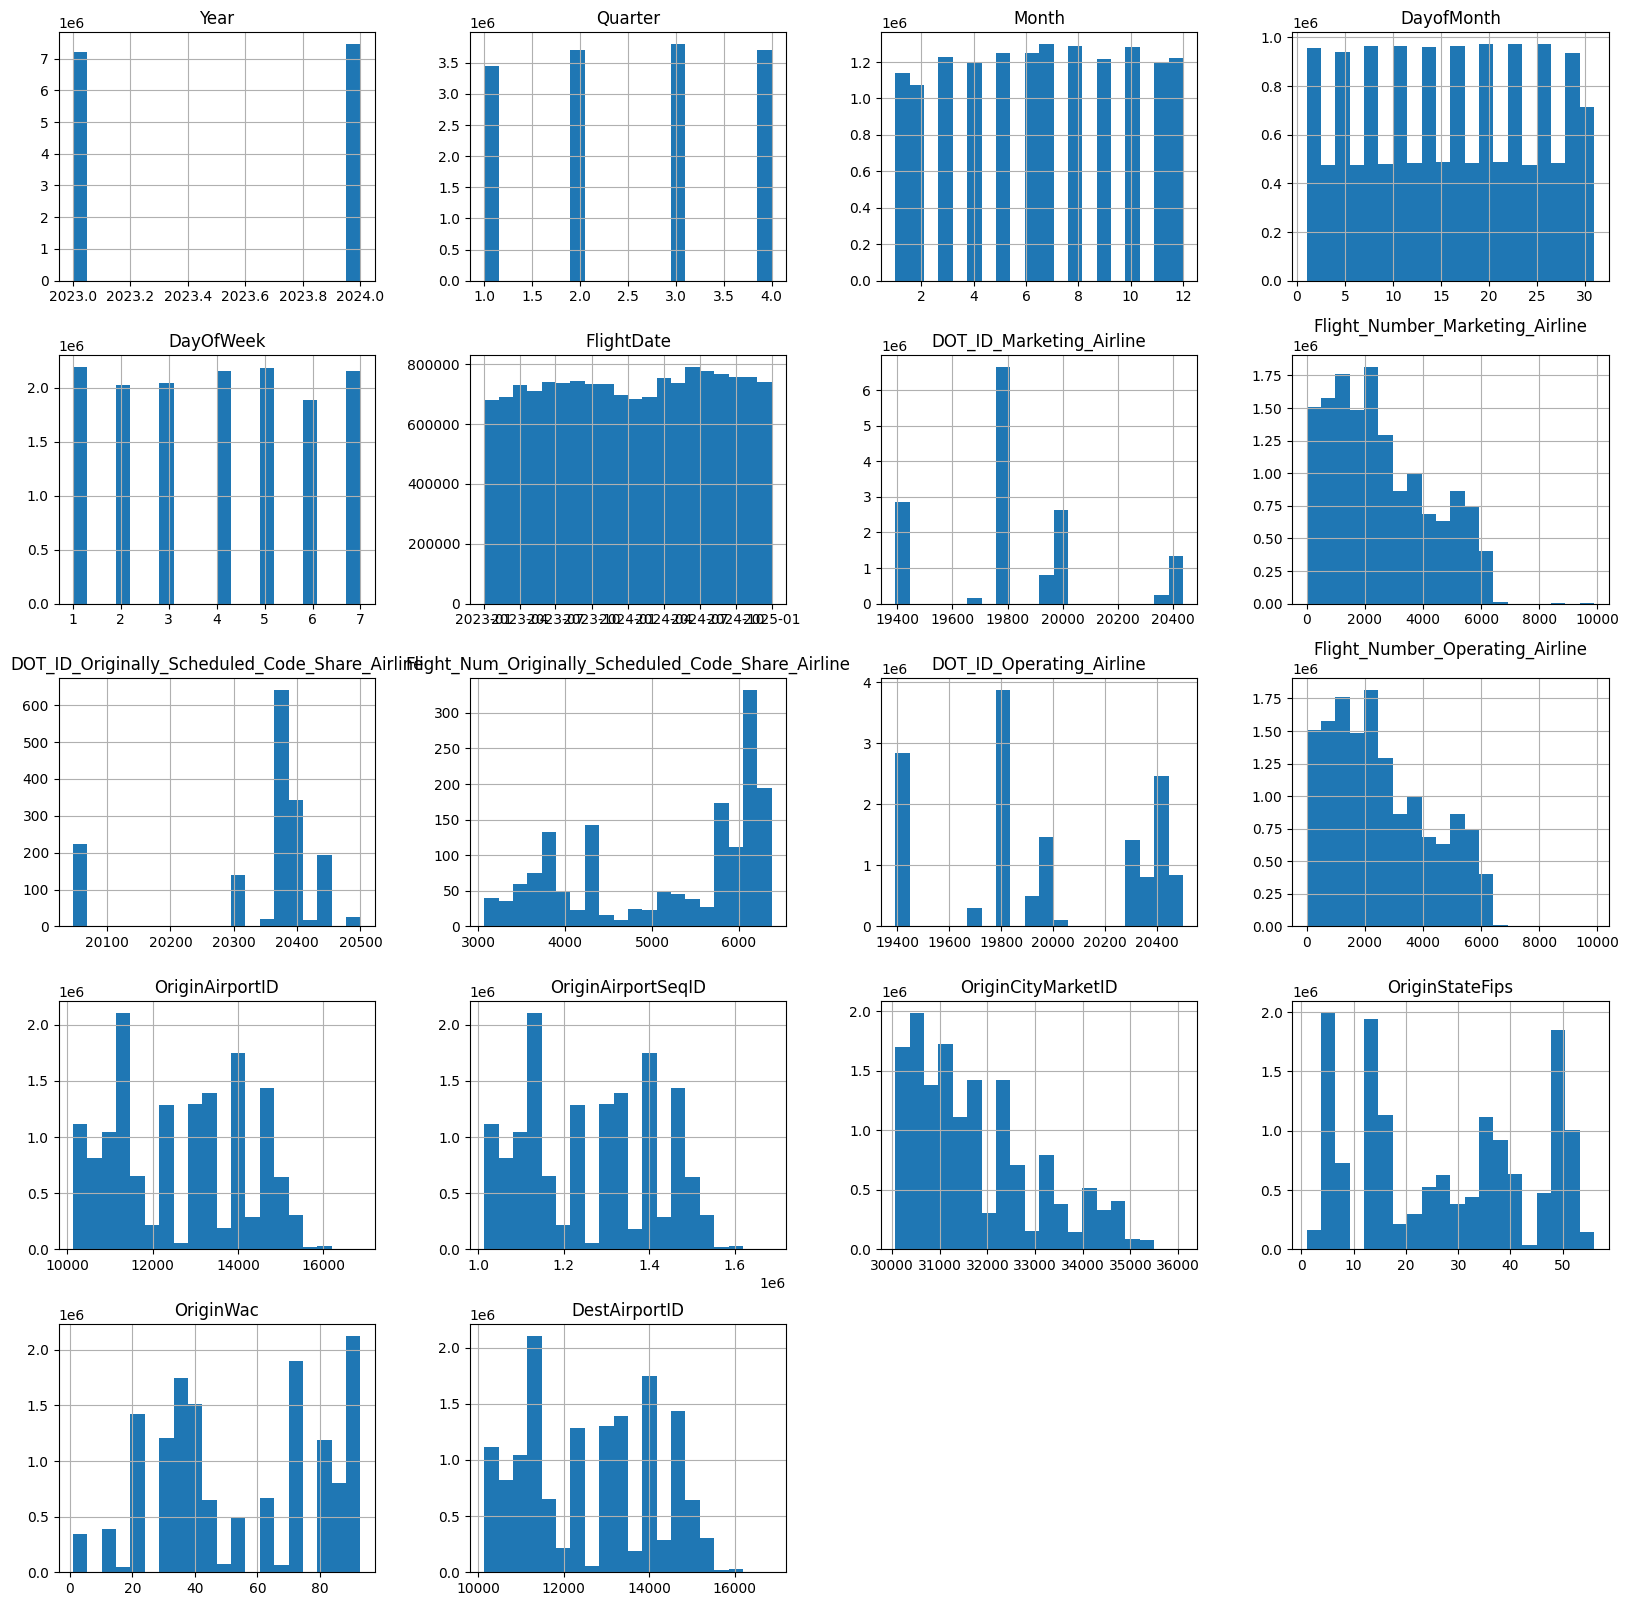

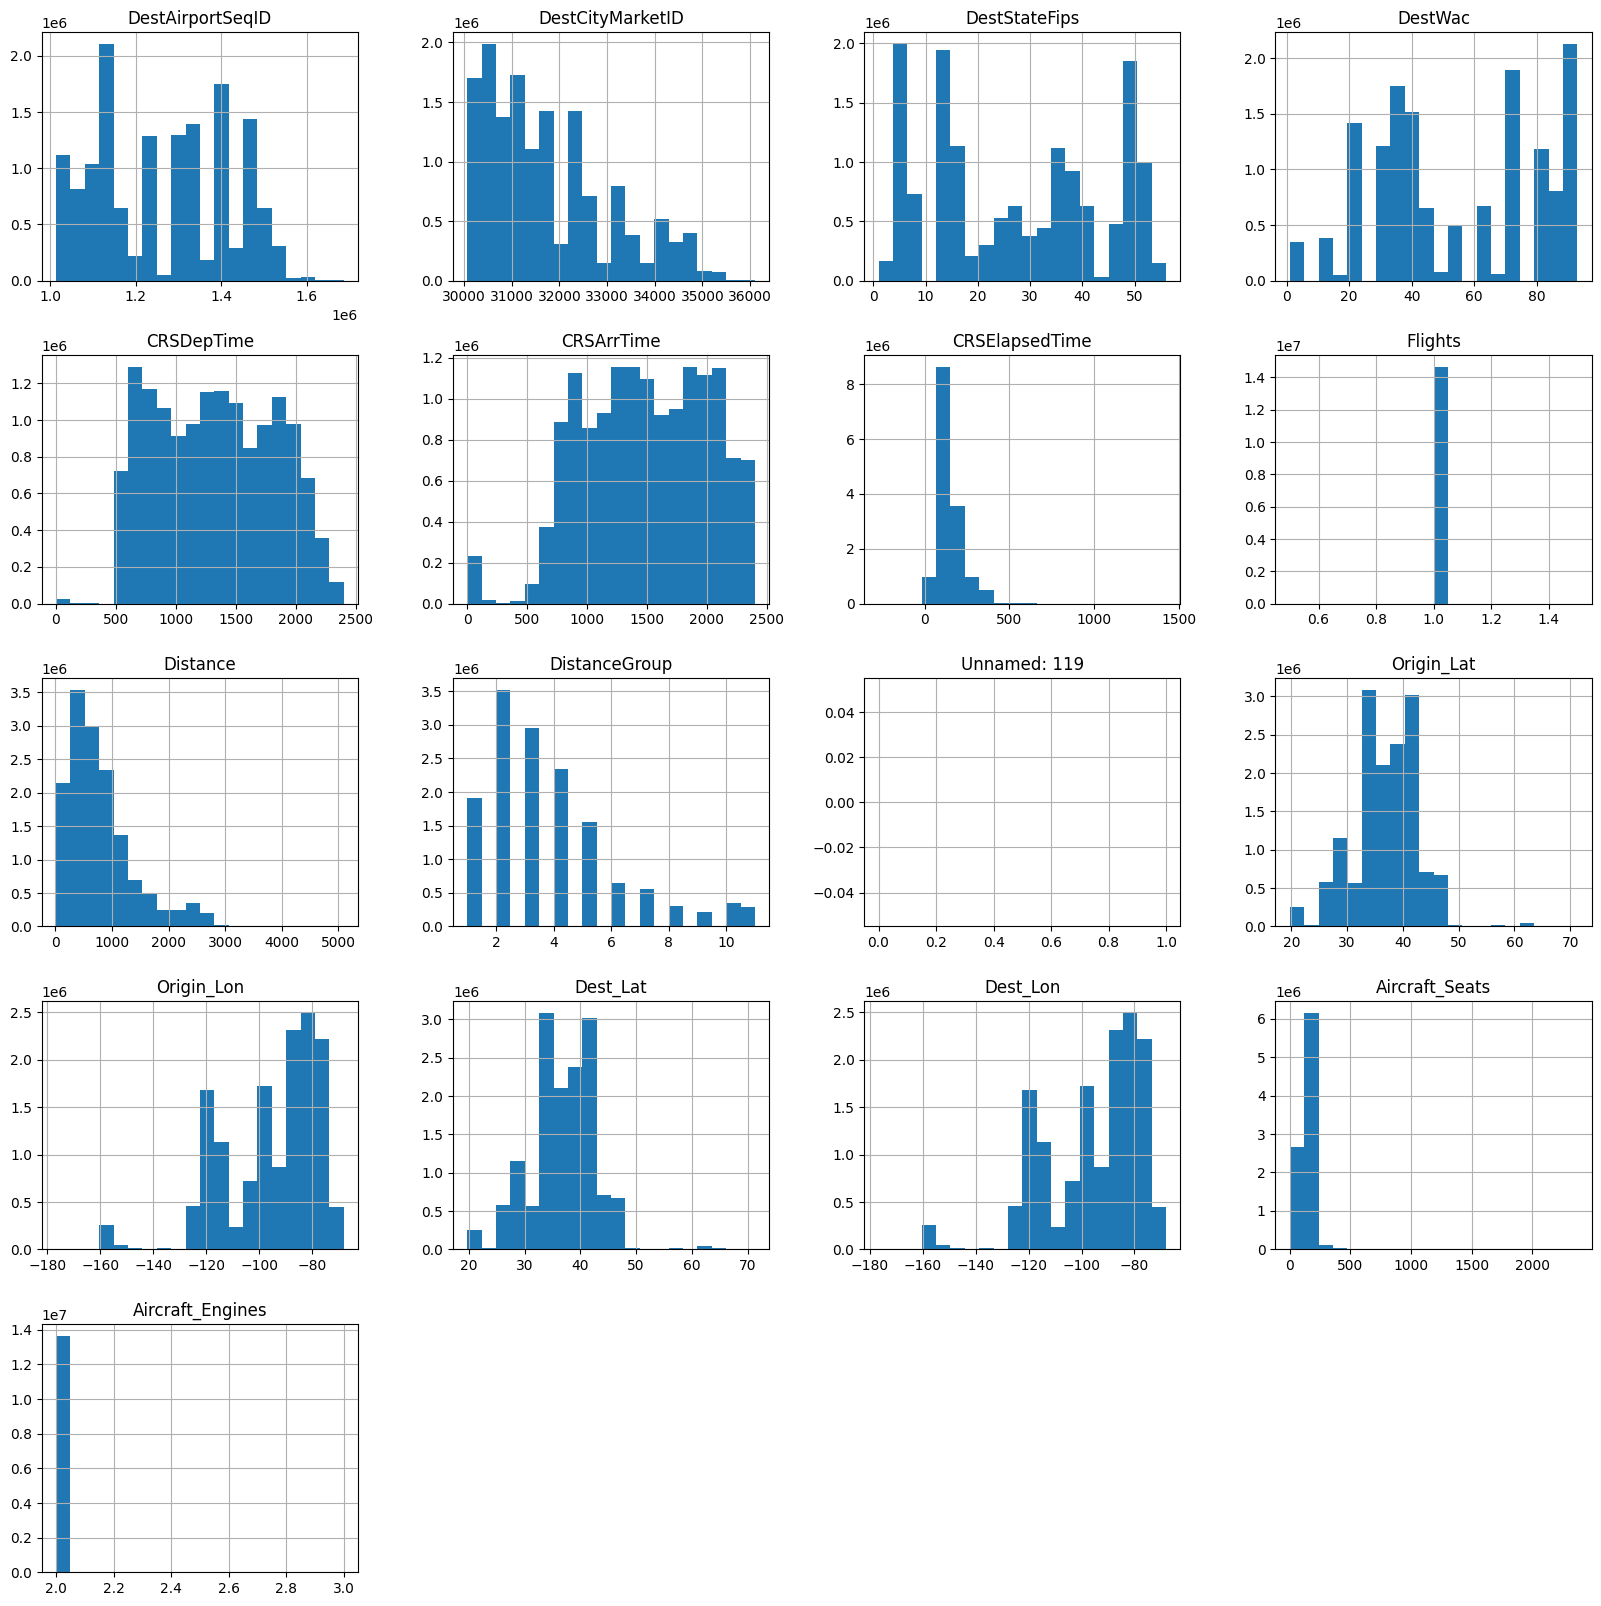

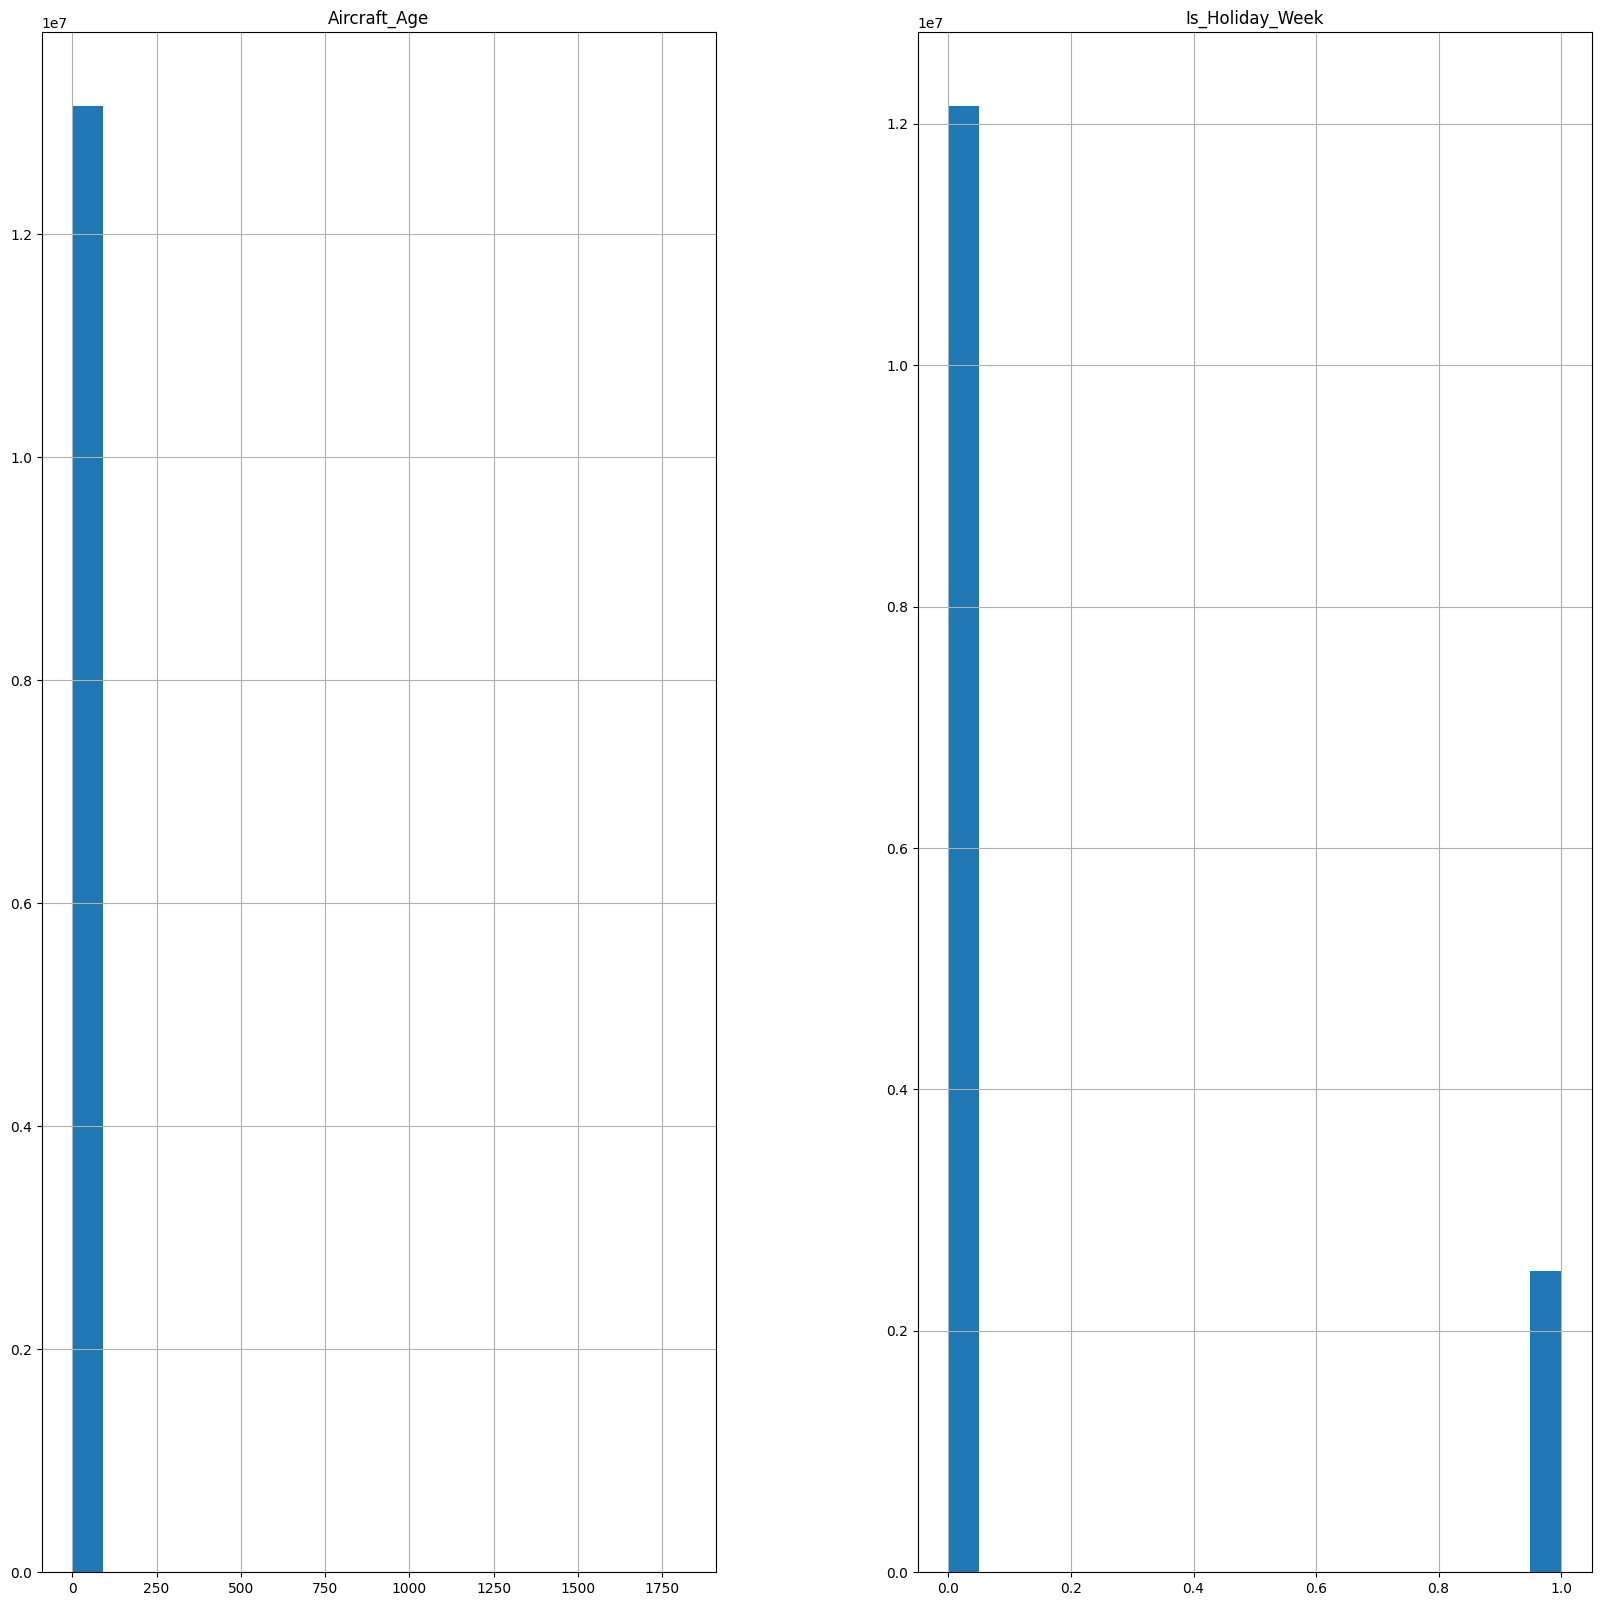

In [6]:
# histogram of athe first 30 columns of the data

flight_data.iloc[:, :30].hist(bins=20, figsize=(20, 20))
plt.show()

# histogram of the next 30 columns of the data

flight_data.iloc[:, 30:60].hist(bins=20, figsize=(20, 20))
plt.show()

# histogram of the next 31 columns of the data

flight_data.iloc[:, 60:91].hist(bins=20, figsize=(20, 20))
plt.show()

In [14]:
train_data, test_data = stratified_random_split(flight_data, target_column="Flight_Status")

Train size: 13199634 samples
Test size: 1466626 samples


# **Data Exploration**

### **NOTE**: The Data Analysis on this section is based on the train data not the down sampled data unless otherwise specified

In [ ]:
# Feature table analysis needed???
# Down sampling for now to make the model run faster, will be removed later
data = train_data.sample(n=500000, random_state=42).copy()
data

In [ ]:
unknown_status = data[data['Flight_Status'].str.contains("Unknown", na=False)]
unknown_status

Year  Quarter  Month  DayofMonth  DayOfWeek FlightDate  \
10976723  2023        3      9          23          6 2023-09-23   
2170578   2023        4     11          28          2 2023-11-28   
78069     2023        4     12          17          7 2023-12-17   
7797343   2023        1      3           8          3 2023-03-08   
8158819   2023        3      7           2          7 2023-07-02   
...        ...      ...    ...         ...        ...        ...   
9850924   2023        2      5          14          7 2023-05-14   
5814873   2024        1      1          10          3 2024-01-10   
9274518   2023        2      4          24          1 2023-04-24   
6598663   2023        1      1          12          4 2023-01-12   
14054556  2024        3      9           2          1 2024-09-02   

         Marketing_Airline_Network Operated_or_Branded_Code_Share_Partners  \
10976723                        DL                                      DL   
2170578                         WN                                      WN   
78069                           AA                                      AA   
7797343                         AA                            AA_CODESHARE   
8158819                         WN                                      WN   
...                            ...                                     ...   
9850924                         DL                                      DL   
5814873                         AA                            AA_CODESHARE   
9274518                         UA                            UA_CODESHARE   
6598663                         WN                                      WN   
14054556                        WN                                      WN   

          DOT_ID_Marketing_Airline IATA_Code_Marketing_Airline  ...  \
10976723                     19790                          DL  ...   
2170578                      19393                          WN  ...   
78069                        19805                          AA  ...   
7797343                      19805                          AA  ...   
8158819                      19393                          WN  ...   
...                            ...                         ...  ...   
9850924                      19790                          DL  ...   
5814873                      19805                          AA  ...   
9274518                      19977                          UA  ...   
6598663                      19393                          WN  ...   
14054556                     19393                          WN  ...   

          Aircraft_ModelCode Aircraft_Seats     Aircraft_Type  \
10976723             321-211          192.0       Airbus A321   
2170578            B737-8MAX          175.0    Boeing 737-800   
78069                319-132          128.0       Airbus A319   
7797343                175LR           76.0       Embraer 175   
8158819             B737-7H4            NaN    Boeing 737-700   
...                      ...            ...               ...   
9850924              319-114          126.0       Airbus A319   
5814873                175LR            NaN       Embraer 175   
9274518            CRJ-200LR            NaN  Canadair CRJ 200   
6598663             B737-7H4            NaN    Boeing 737-700   
14054556            737-8MAX            NaN  Boeing 737 MAX 8   

         Aircraft_Engines  Aircraft_EngineType Is_Freighter  Aircraft_Age  \
10976723              2.0                  Jet        False           6.9   
2170578               2.0                  Jet        False           4.1   
78069                 2.0                  Jet        False          23.7   
7797343               2.0                  Jet        False           8.4   
8158819               2.0                  Jet        False          13.7   
...                   ...                  ...          ...           ...   
9850924               2.0                  Jet        False          23.1   
581487

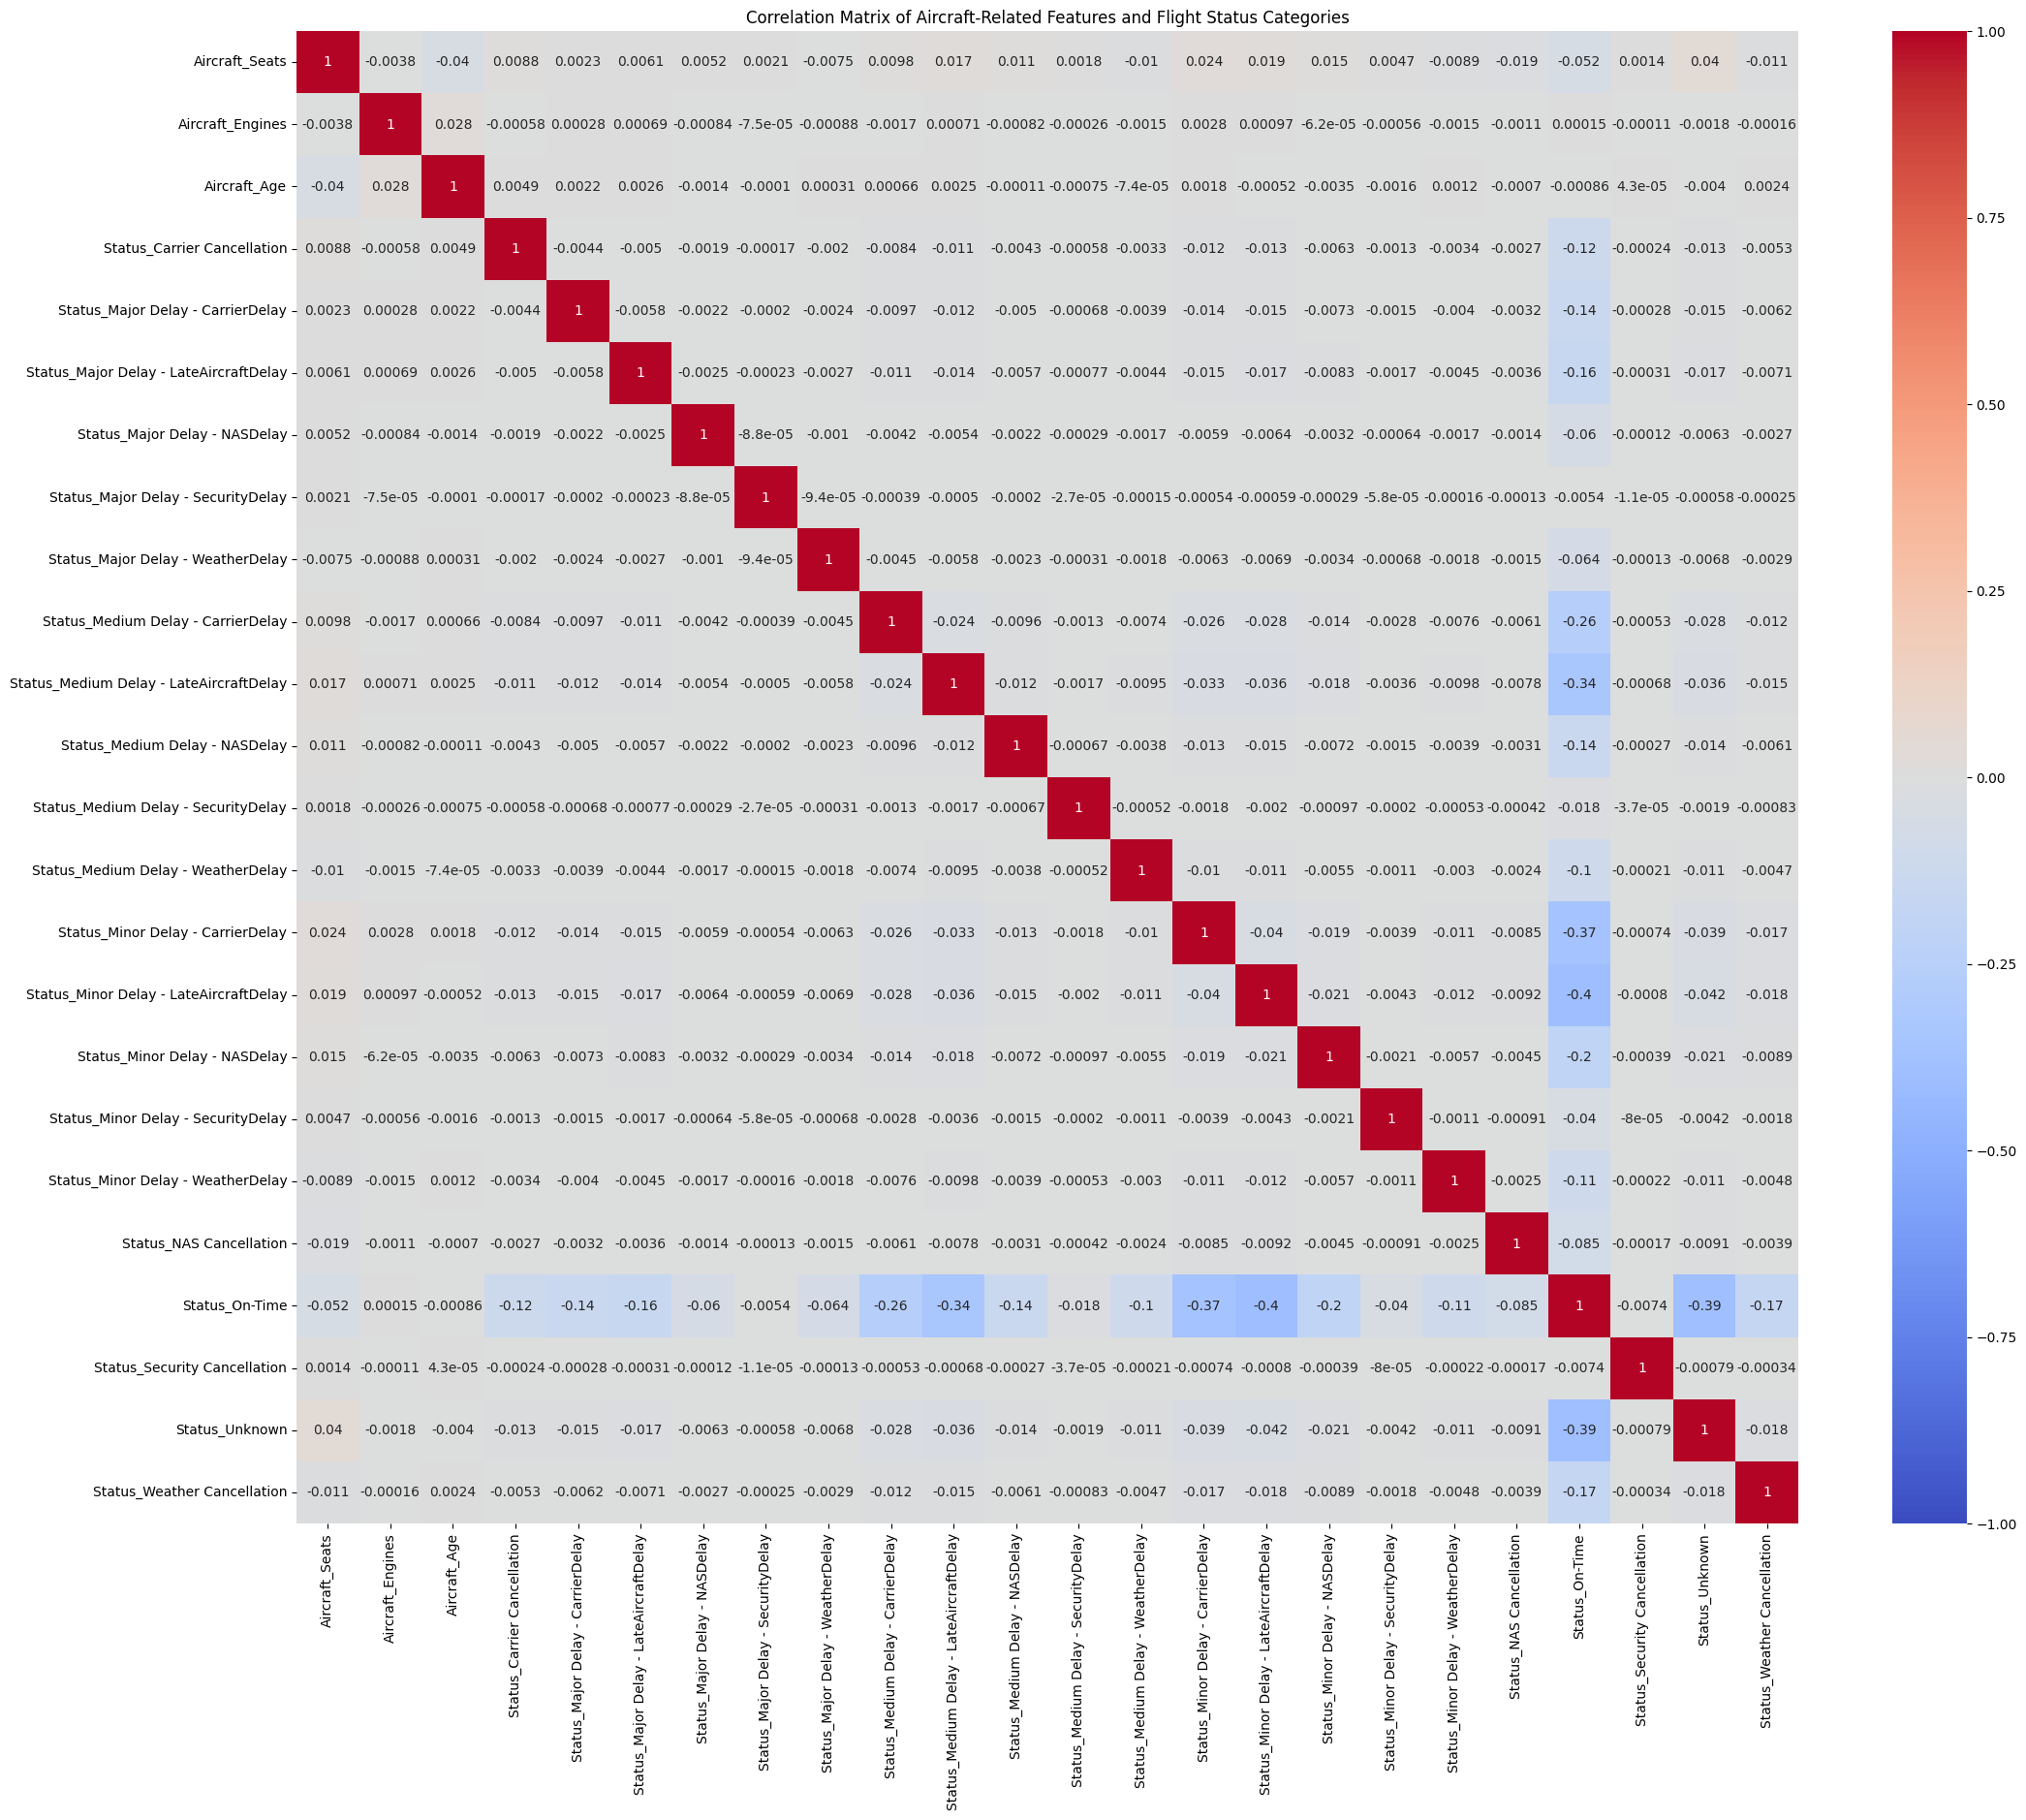

In [ ]:
# Select aircraft-related columns
aircraft_columns = [
    'Aircraft_Seats', 'Aircraft_Engines', 'Aircraft_Age'
]

# Create binary columns for each Flight_Status category
flight_status_dummies = pd.get_dummies(data['Flight_Status'], prefix='Status')

# Concatenate the binary columns with the aircraft-related columns
correlation_data = pd.concat([data[aircraft_columns], flight_status_dummies], axis=1)

# Compute the correlation matrix
aircraft_corr = correlation_data.corr()

# Plot the heatmap
plt.figure(figsize=(25, 20))
sns.heatmap(aircraft_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Aircraft-Related Features and Flight Status Categories')
plt.show()


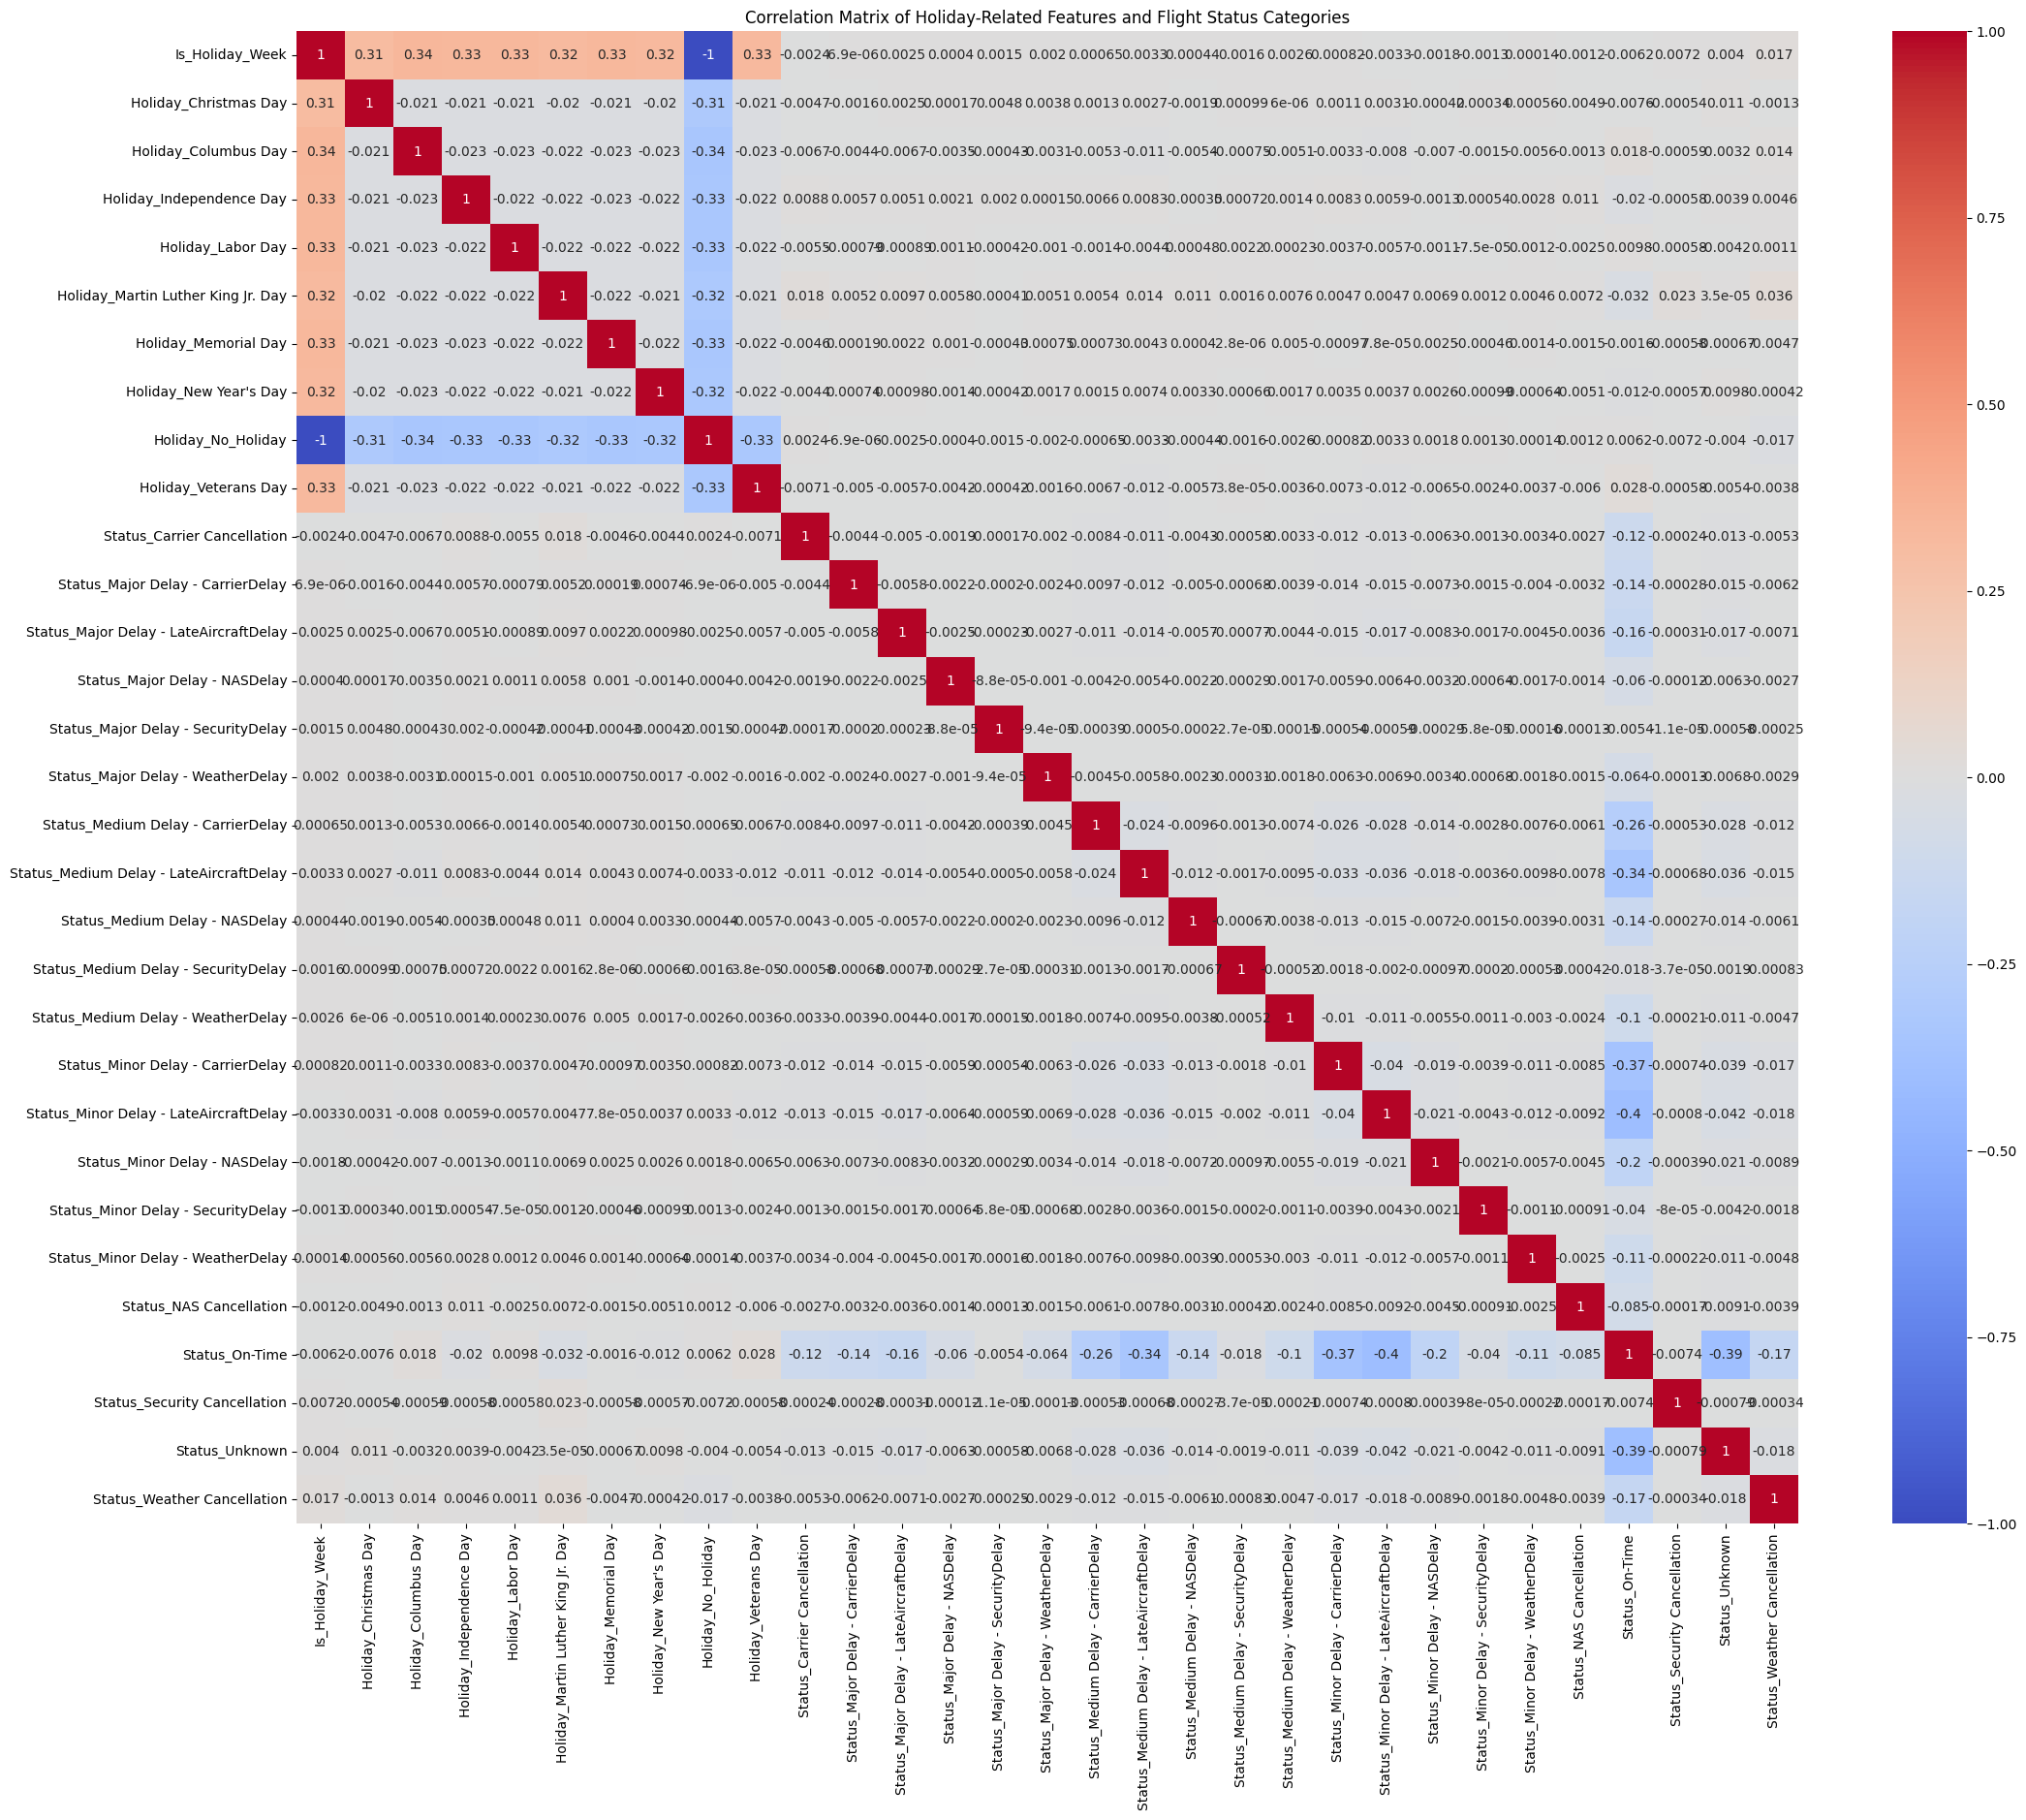

In [ ]:
# Select holiday-related columns
holiday_columns = [
    'Is_Holiday_Week'
]

# Create binary columns for each Holiday
holiday_dummies = pd.get_dummies(data['Holiday'].replace('None', 'No_Holiday'), prefix='Holiday')

# Create binary columns for each Flight_Status category
flight_status_dummies = pd.get_dummies(data['Flight_Status'], prefix='Status')

# Concatenate the binary columns with the holiday-related columns
correlation_data = pd.concat([data[holiday_columns], holiday_dummies, flight_status_dummies], axis=1)

# Compute the correlation matrix
holiday_corr = correlation_data.corr()

# Plot the heatmap
plt.figure(figsize=(25, 20))
sns.heatmap(holiday_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Holiday-Related Features and Flight Status Categories')
plt.show()

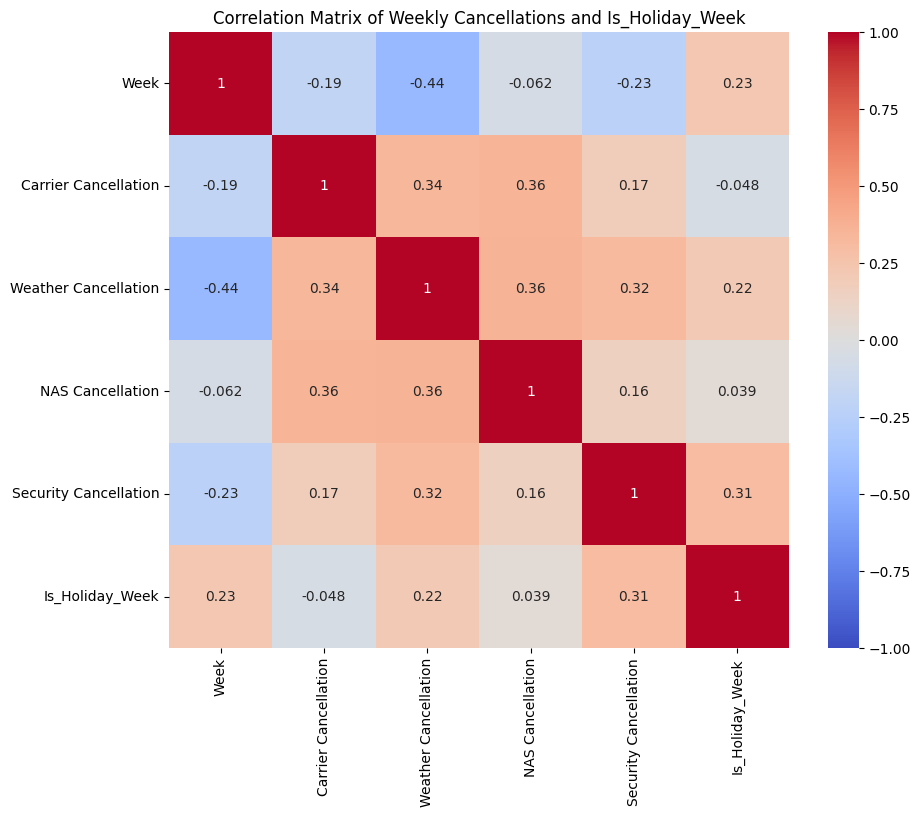

In [ ]:
# Extract cancellation categories from Flight_Status
cancellation_categories = ['Carrier Cancellation', 'Weather Cancellation', 'NAS Cancellation', 'Security Cancellation']

# Create binary columns for each cancellation category
for category in cancellation_categories:
    data[category] = data['Flight_Status'].apply(lambda x: 1 if category in x else 0)

# Convert FlightDate to datetime if not already
data['FlightDate'] = pd.to_datetime(data['FlightDate'])

# Create a 'Week' column
data['Week'] = data['FlightDate'].dt.isocalendar().week

# Group by week and calculate the sum of cancellations and Is_Holiday_Week
weekly_data = data.groupby('Week')[cancellation_categories + ['Is_Holiday_Week']].sum().reset_index()

# Compute the correlation matrix
weekly_corr = weekly_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(weekly_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Weekly Cancellations and Is_Holiday_Week')
plt.show()

### **Holiday Weeks & Cancellations – Target Label Analysis**
**NOTE:** This is based on the Full Train Data, not the down sampled data. 

This analysis focuses on how U.S. holiday weeks (represented by the `Is_Holiday_Week` feature) correlate with specific cancellation reasons in the `Flight_Status` target label. Understanding these relationships helps evaluate how holidays impact different classes in your multiclass classification task.

### Correlation Insights (with `Is_Holiday_Week`):

| Cancellation Type        | Correlation with `Is_Holiday_Week` |
|--------------------------|-------------------------------------|
| **Security Cancellation**| **+0.32**                           |
| **Weather Cancellation** | **+0.18**                           |
| **NAS Cancellation**     | **+0.027**                          |
| **Carrier Cancellation** | **-0.035**                          |

### Interpretation:

- **Security Cancellations (+0.32)**  
  Holiday weeks **strongly correlate** with security-related cancellations. This suggests more disruptions from longer security lines, heightened security protocols, or increased passenger volume.  
  - This class should remain **highly sensitive to `Is_Holiday_Week`** as a feature.

- **Weather Cancellations (+0.18)**  
  A **moderate positive correlation** suggests weather-related cancellations tend to occur during holiday seasons, likely winter (e.g., Christmas, Thanksgiving).  
  - Including holiday weeks can help **anticipate seasonal weather delays**.

- **NAS Cancellations (+0.027)**  
  Very **weak positive correlation**. National Airspace System delays (e.g., air traffic congestion) occur **independent of holidays**.  
  - `Is_Holiday_Week` is likely **not a strong predictor** for this class.

- **Carrier Cancellations (–0.035)**  
  Slight **negative correlation**, indicating these cancellations (like crew shortages or maintenance) may not be holiday-driven and possibly even **decrease** during holidays due to better planning.  
  - `Is_Holiday_Week` may be **irrelevant or slightly inverse** for this class.

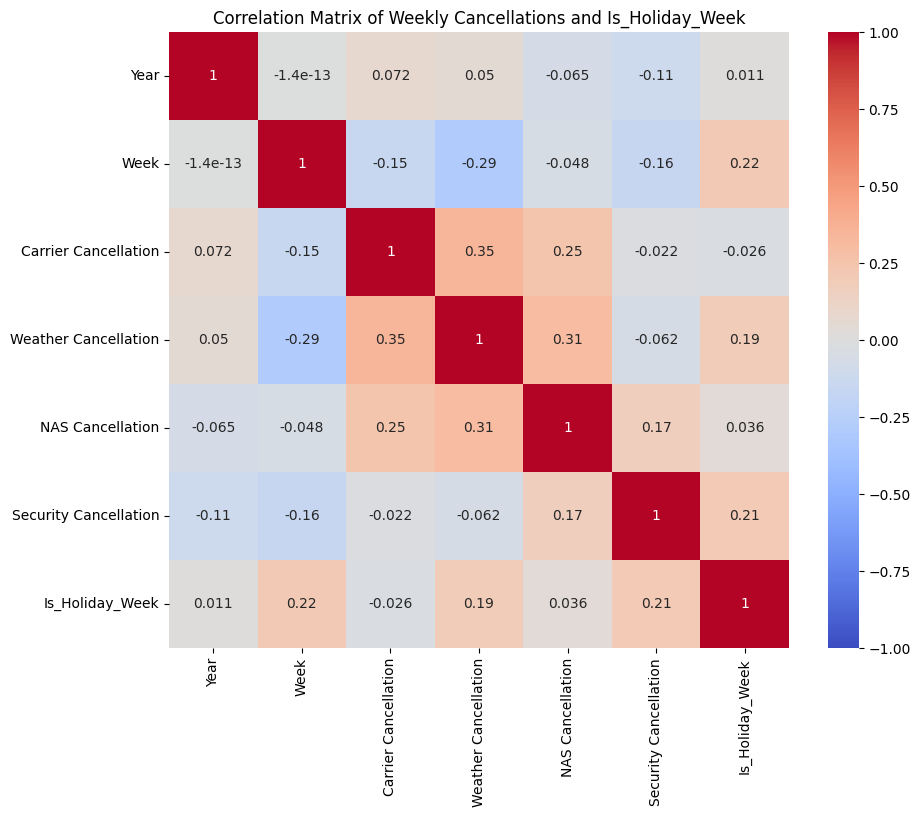

In [ ]:
# Extract cancellation categories from Flight_Status
cancellation_categories = ['Carrier Cancellation', 'Weather Cancellation', 'NAS Cancellation', 'Security Cancellation']

# Create binary columns for each cancellation category
for category in cancellation_categories:
    data[category] = data['Flight_Status'].apply(lambda x: 1 if category in x else 0)

# Convert FlightDate to datetime if not already
data['FlightDate'] = pd.to_datetime(data['FlightDate'])

# Create a 'Year' column
data['Year'] = data['FlightDate'].dt.year

# Create a 'Week' column
data['Week'] = data['FlightDate'].dt.isocalendar().week

# Group by week and calculate the sum of cancellations and Is_Holiday_Week
weekly_data = data.groupby(['Year', 'Week'])[cancellation_categories + ['Is_Holiday_Week']].sum().reset_index()

# Compute the correlation matrix
weekly_corr = weekly_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(weekly_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Weekly Cancellations and Is_Holiday_Week')
plt.show()


### **Analysis: Correlation of Cancellations and Holidays (Week vs. Year+Week)**

When examining the relationship between weekly flight cancellations and holidays, grouping data by just the `Week` number (1–52) **across all years** introduces temporal overlap. For example, **Week 1 of 2023** is treated the same as **Week 1 of 2024**, despite potential differences in weather, operational patterns, or holiday timing. This can **inflate or distort correlations**, as unrelated years are aggregated into the same weekly bins.

By contrast, grouping by both `Year` and `Week` provides a more **realistic and temporally accurate representation**. Each week is treated uniquely within its year, which helps preserve the true context of events (like holidays) and improves the quality of the correlation analysis.

Although the correlations between `Is_Holiday_Week` and cancellation types appear slightly **lower** when grouped by `Year + Week`, they are **more reliable** and free from cross-year noise. This approach is especially valuable for time-based modeling or trend detection, where the **seasonality and yearly patterns must remain intact**.

Thus, using `Year + Week` ensures **cleaner, more interpretable trends** in cancellation behavior during holiday periods and provides a stronger foundation for downstream modeling or forecasting tasks.

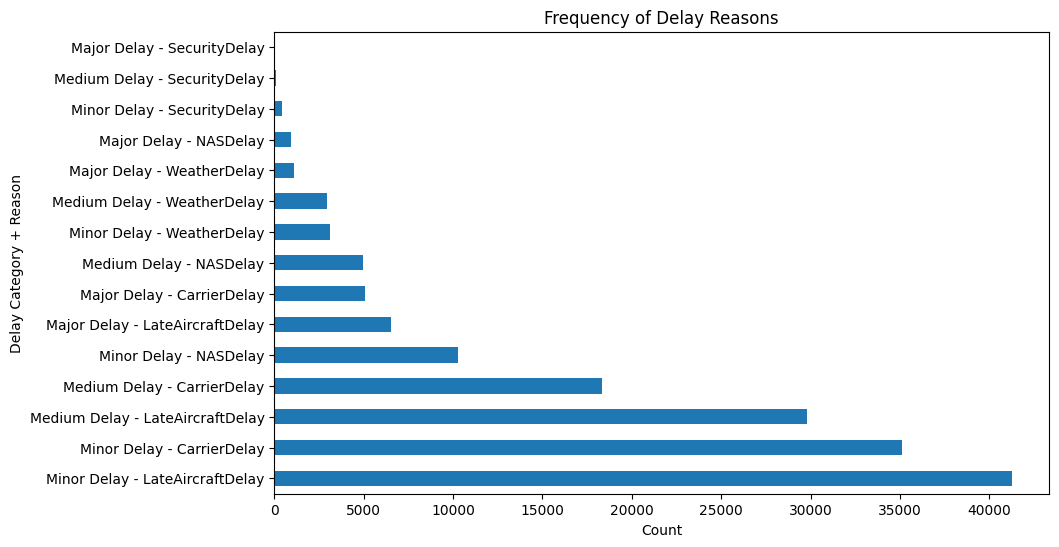

In [ ]:
# Extract delay reasons from Flight_Status
delay_reason_counts = data[data['Flight_Status'].str.contains('Delay')]['Flight_Status'].value_counts()

# Visualize
delay_reason_counts.plot(kind='barh', figsize=(10, 6), title="Frequency of Delay Reasons")
plt.xlabel("Count")
plt.ylabel("Delay Category + Reason")
plt.show()


### Frequency of Delay Reasons
1. Minor Delay – LateAircraftDelay is by far the most common delay type — over 500,000 samples.
2. Carrier-related delays (CarrierDelay) and NAS delays are also frequent across Minor and Medium categories.
3. Weather-related delays are less common but still present, especially in Minor and Medium delays.
4. SecurityDelay is extremely rare, even in Major delays.

As severity increases (from Minor --> Major), total occurrences drop significantly - which is expected.

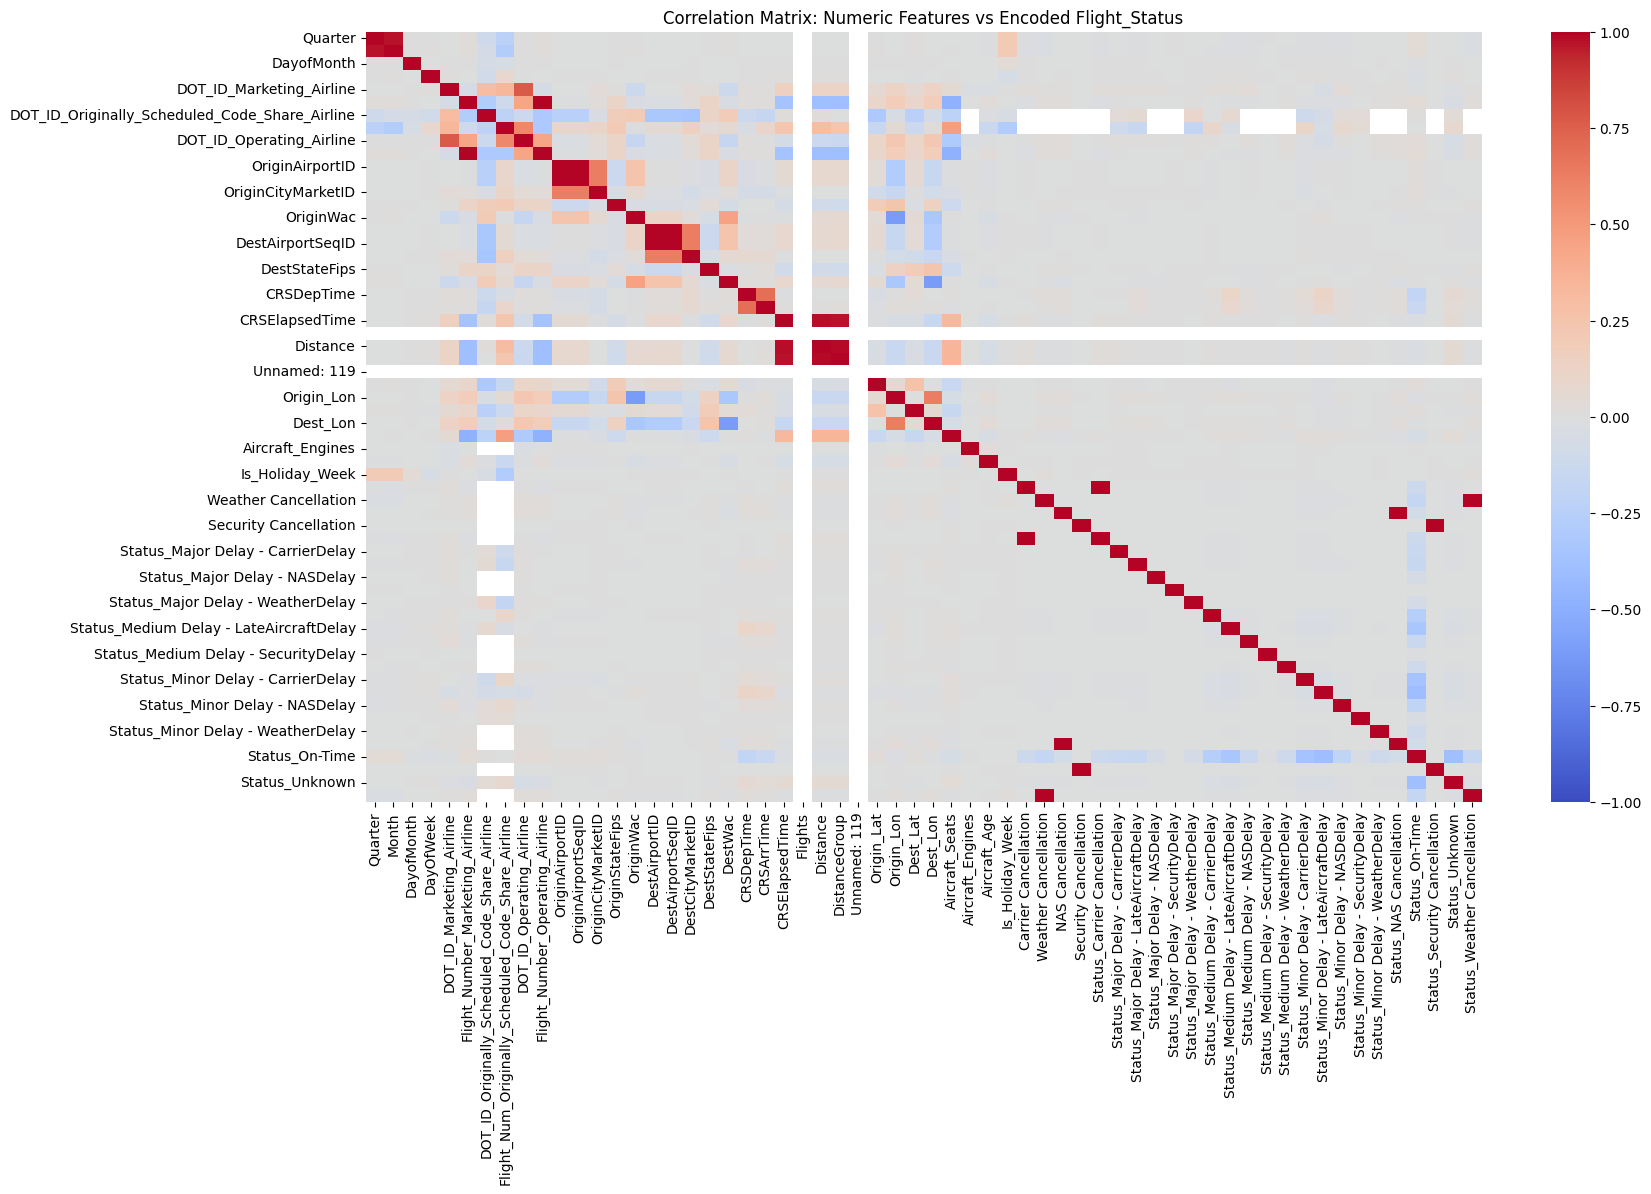

In [ ]:
encoded_target = pd.get_dummies(data["Flight_Status"], prefix="Status")

# Select numeric features (after dropping post-flight leakage columns)
numerics = data.select_dtypes(include=['int64', 'float64']).copy()

# Join encoded target
corr_df = numerics.join(encoded_target)

plt.figure(figsize=(18, 10))
sns.heatmap(corr_df.corr(), cmap="coolwarm", center=0, vmin=-1, vmax=1)
plt.title("Correlation Matrix: Numeric Features vs Encoded Flight_Status")
plt.show()

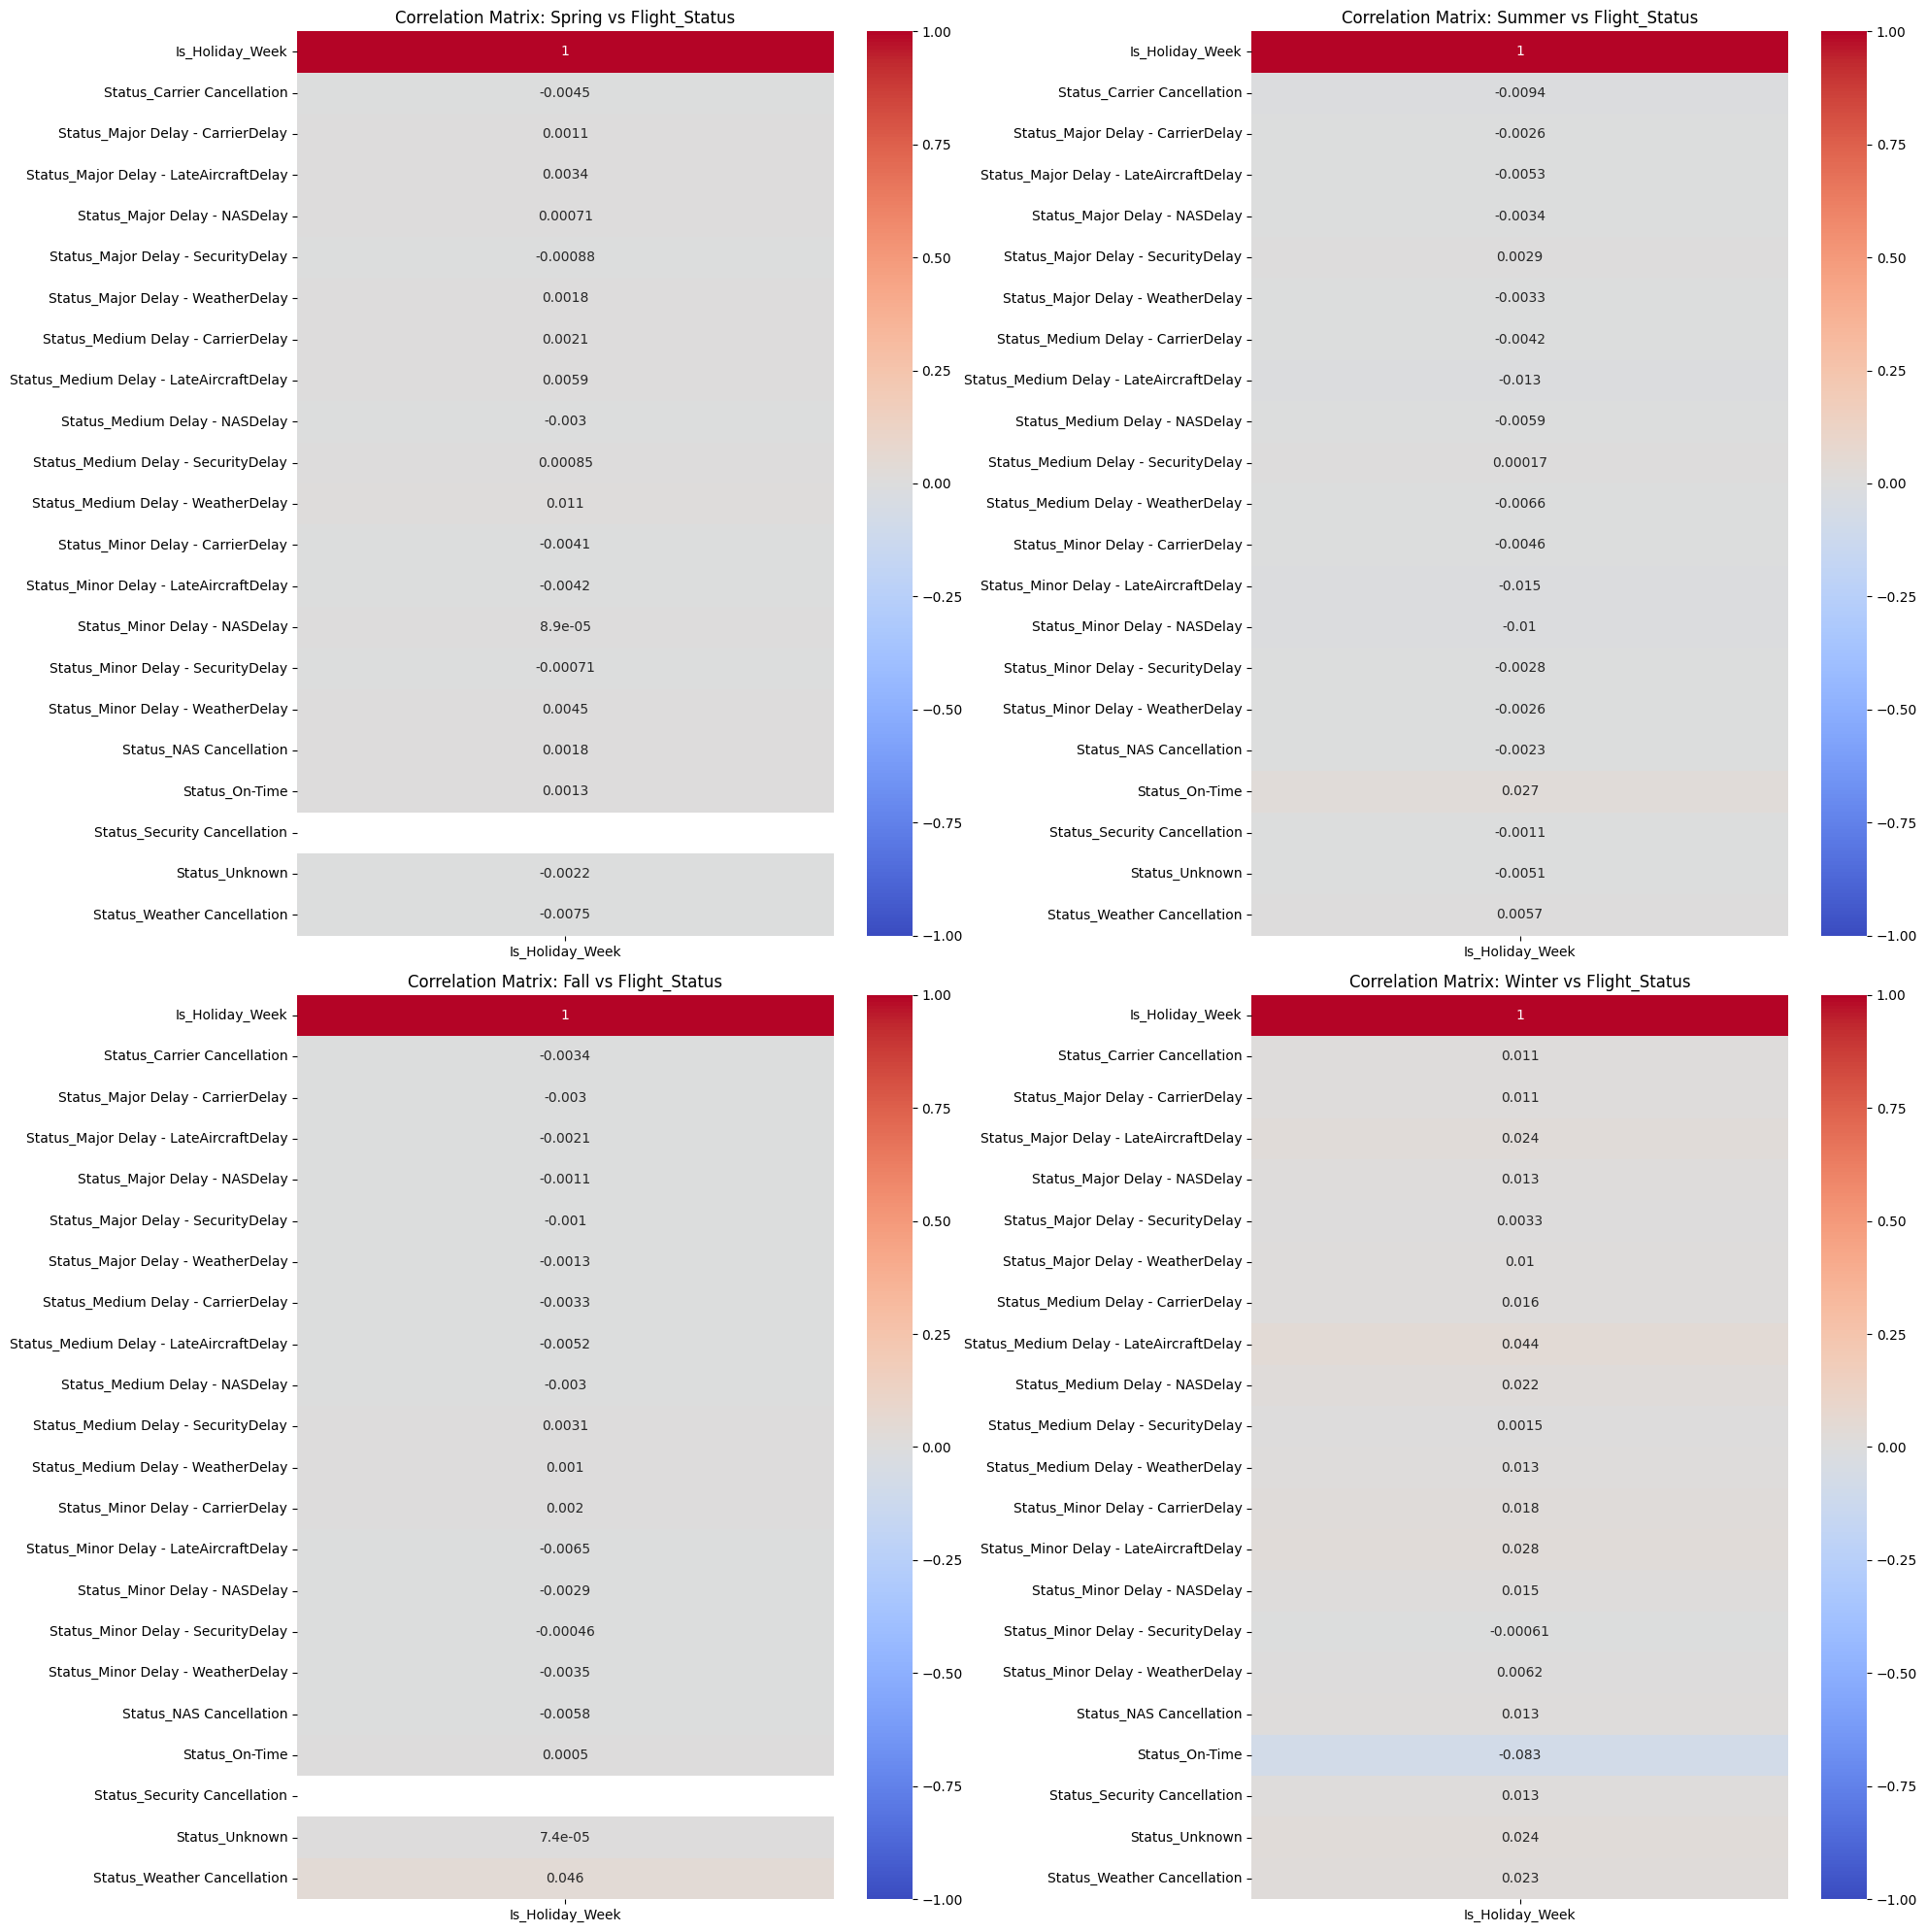

In [ ]:
# Define seasons
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'

# Add season column to the data
data['Season'] = data['Month'].apply(get_season)

# Create binary columns for each Flight_Status category
flight_status_dummies = pd.get_dummies(data['Flight_Status'], prefix='Status')

# Initialize a figure for subplots
plt.figure(figsize=(20, 20))

# Define seasons
seasons = ['Spring', 'Summer', 'Fall', 'Winter']

# Loop through each season and create a heatmap
for i, season in enumerate(seasons, 1):
    # Filter data for the current season
    season_data = data[data['Season'] == season]
    
    # Concatenate the binary columns with the season data
    correlation_data_season = pd.concat([season_data[['Is_Holiday_Week']], flight_status_dummies.loc[season_data.index]], axis=1)
    
    # Compute the correlation matrix
    season_corr = correlation_data_season.corr()
    
    # Plot the heatmap
    plt.subplot(2, 2, i)
    sns.heatmap(season_corr[['Is_Holiday_Week']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'Correlation Matrix: {season} vs Flight_Status')

plt.tight_layout()
plt.show()


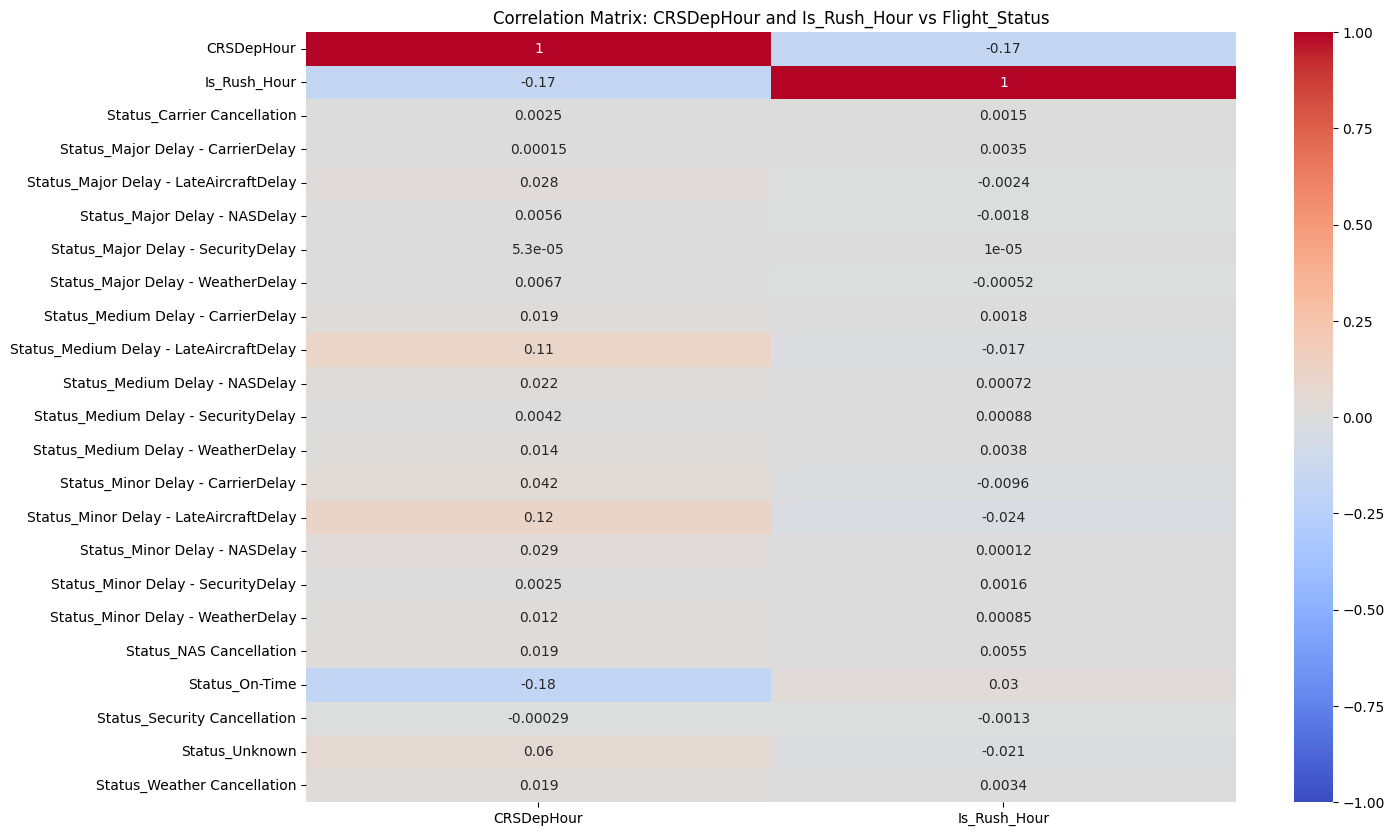

In [ ]:
# Create CRSDepHour from CRSDepTime
data['CRSDepTime'] = data['CRSDepTime'].astype(int)
data['CRSDepHour'] = data['CRSDepTime'] // 100

# Define rush hours (e.g., 6-9 AM and 4-7 PM)
rush_hours = list(range(6, 10)) + list(range(16, 20))

# Create Is_Rush_Hour column
data['Is_Rush_Hour'] = data['CRSDepHour'].apply(lambda x: 1 if x in rush_hours else 0)

# Create binary columns for each Flight_Status category
flight_status_dummies = pd.get_dummies(data['Flight_Status'], prefix='Status')

# Concatenate the binary columns with CRSDepHour and Is_Rush_Hour
correlation_data = pd.concat([data[['CRSDepHour', 'Is_Rush_Hour']], flight_status_dummies], axis=1)

# Compute the correlation matrix
corr_matrix = correlation_data.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix[['CRSDepHour', 'Is_Rush_Hour']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix: CRSDepHour and Is_Rush_Hour vs Flight_Status')
plt.show()


### **Correlation Between Scheduled Departure Features and Flight Status**

This correlation heatmap evaluates how scheduled departure time (`CRSDepHour`) and a derived binary feature (`Is_Rush_Hour`) relate to different categories within the `Flight_Status` target variable. The analysis is based on a downsampled dataset of 1 million rows, offering an efficient yet representative view of the overall trends.

#### **1. On-Time Flights**
- The correlation between `CRSDepHour` and `Status_On-Time` is **-0.18**, and for `Is_Rush_Hour`, it is **-0.17**.
- These negative correlations indicate that flights departing later in the day or during designated rush hours (6–9 AM and 4–7 PM) are **less likely to be on-time**.
- This finding is consistent with operational patterns observed in air travel, where congestion typically accumulates as the day progresses, leading to increased delays later in the schedule.

#### **2. Flight Delays by Category**
- Among delayed flights, the **"Late Aircraft Delay"** reason stands out with the highest positive correlation:
  - `Minor Delay - LateAircraftDelay`: **0.12** (CRSDepHour), **0.12** (Is_Rush_Hour)
  - `Medium Delay - LateAircraftDelay`: Also shows a moderate positive correlation.
- These results suggest that delays due to late-arriving aircraft are **more prevalent during rush hour and later hours**, likely due to compounded delays from earlier flights.
- Other delay types (e.g., Carrier, NAS, Weather, Security) show weaker but still positive correlations, implying they are somewhat sensitive to time-of-day factors but to a lesser extent.

#### **3. Cancellations**
- Most cancellation-related statuses (Carrier, NAS, Weather, Security) show **minimal correlation** with either `CRSDepHour` or `Is_Rush_Hour`.
- For instance, `Status_Weather Cancellation` shows only a **0.019** correlation with `CRSDepHour`, and `Status_Carrier Cancellation` is virtually uncorrelated.
- This supports the idea that cancellations are generally influenced by **external factors** (e.g., pre-emptive operational decisions, weather systems) and are **less dependent on departure time**.

#### **4. Unknown Status**
- `Status_Unknown` exhibits a modest positive correlation with `CRSDepHour` (**0.06**), which may reflect a **higher likelihood of incomplete or delayed reporting** in later flights or during more congested time windows.



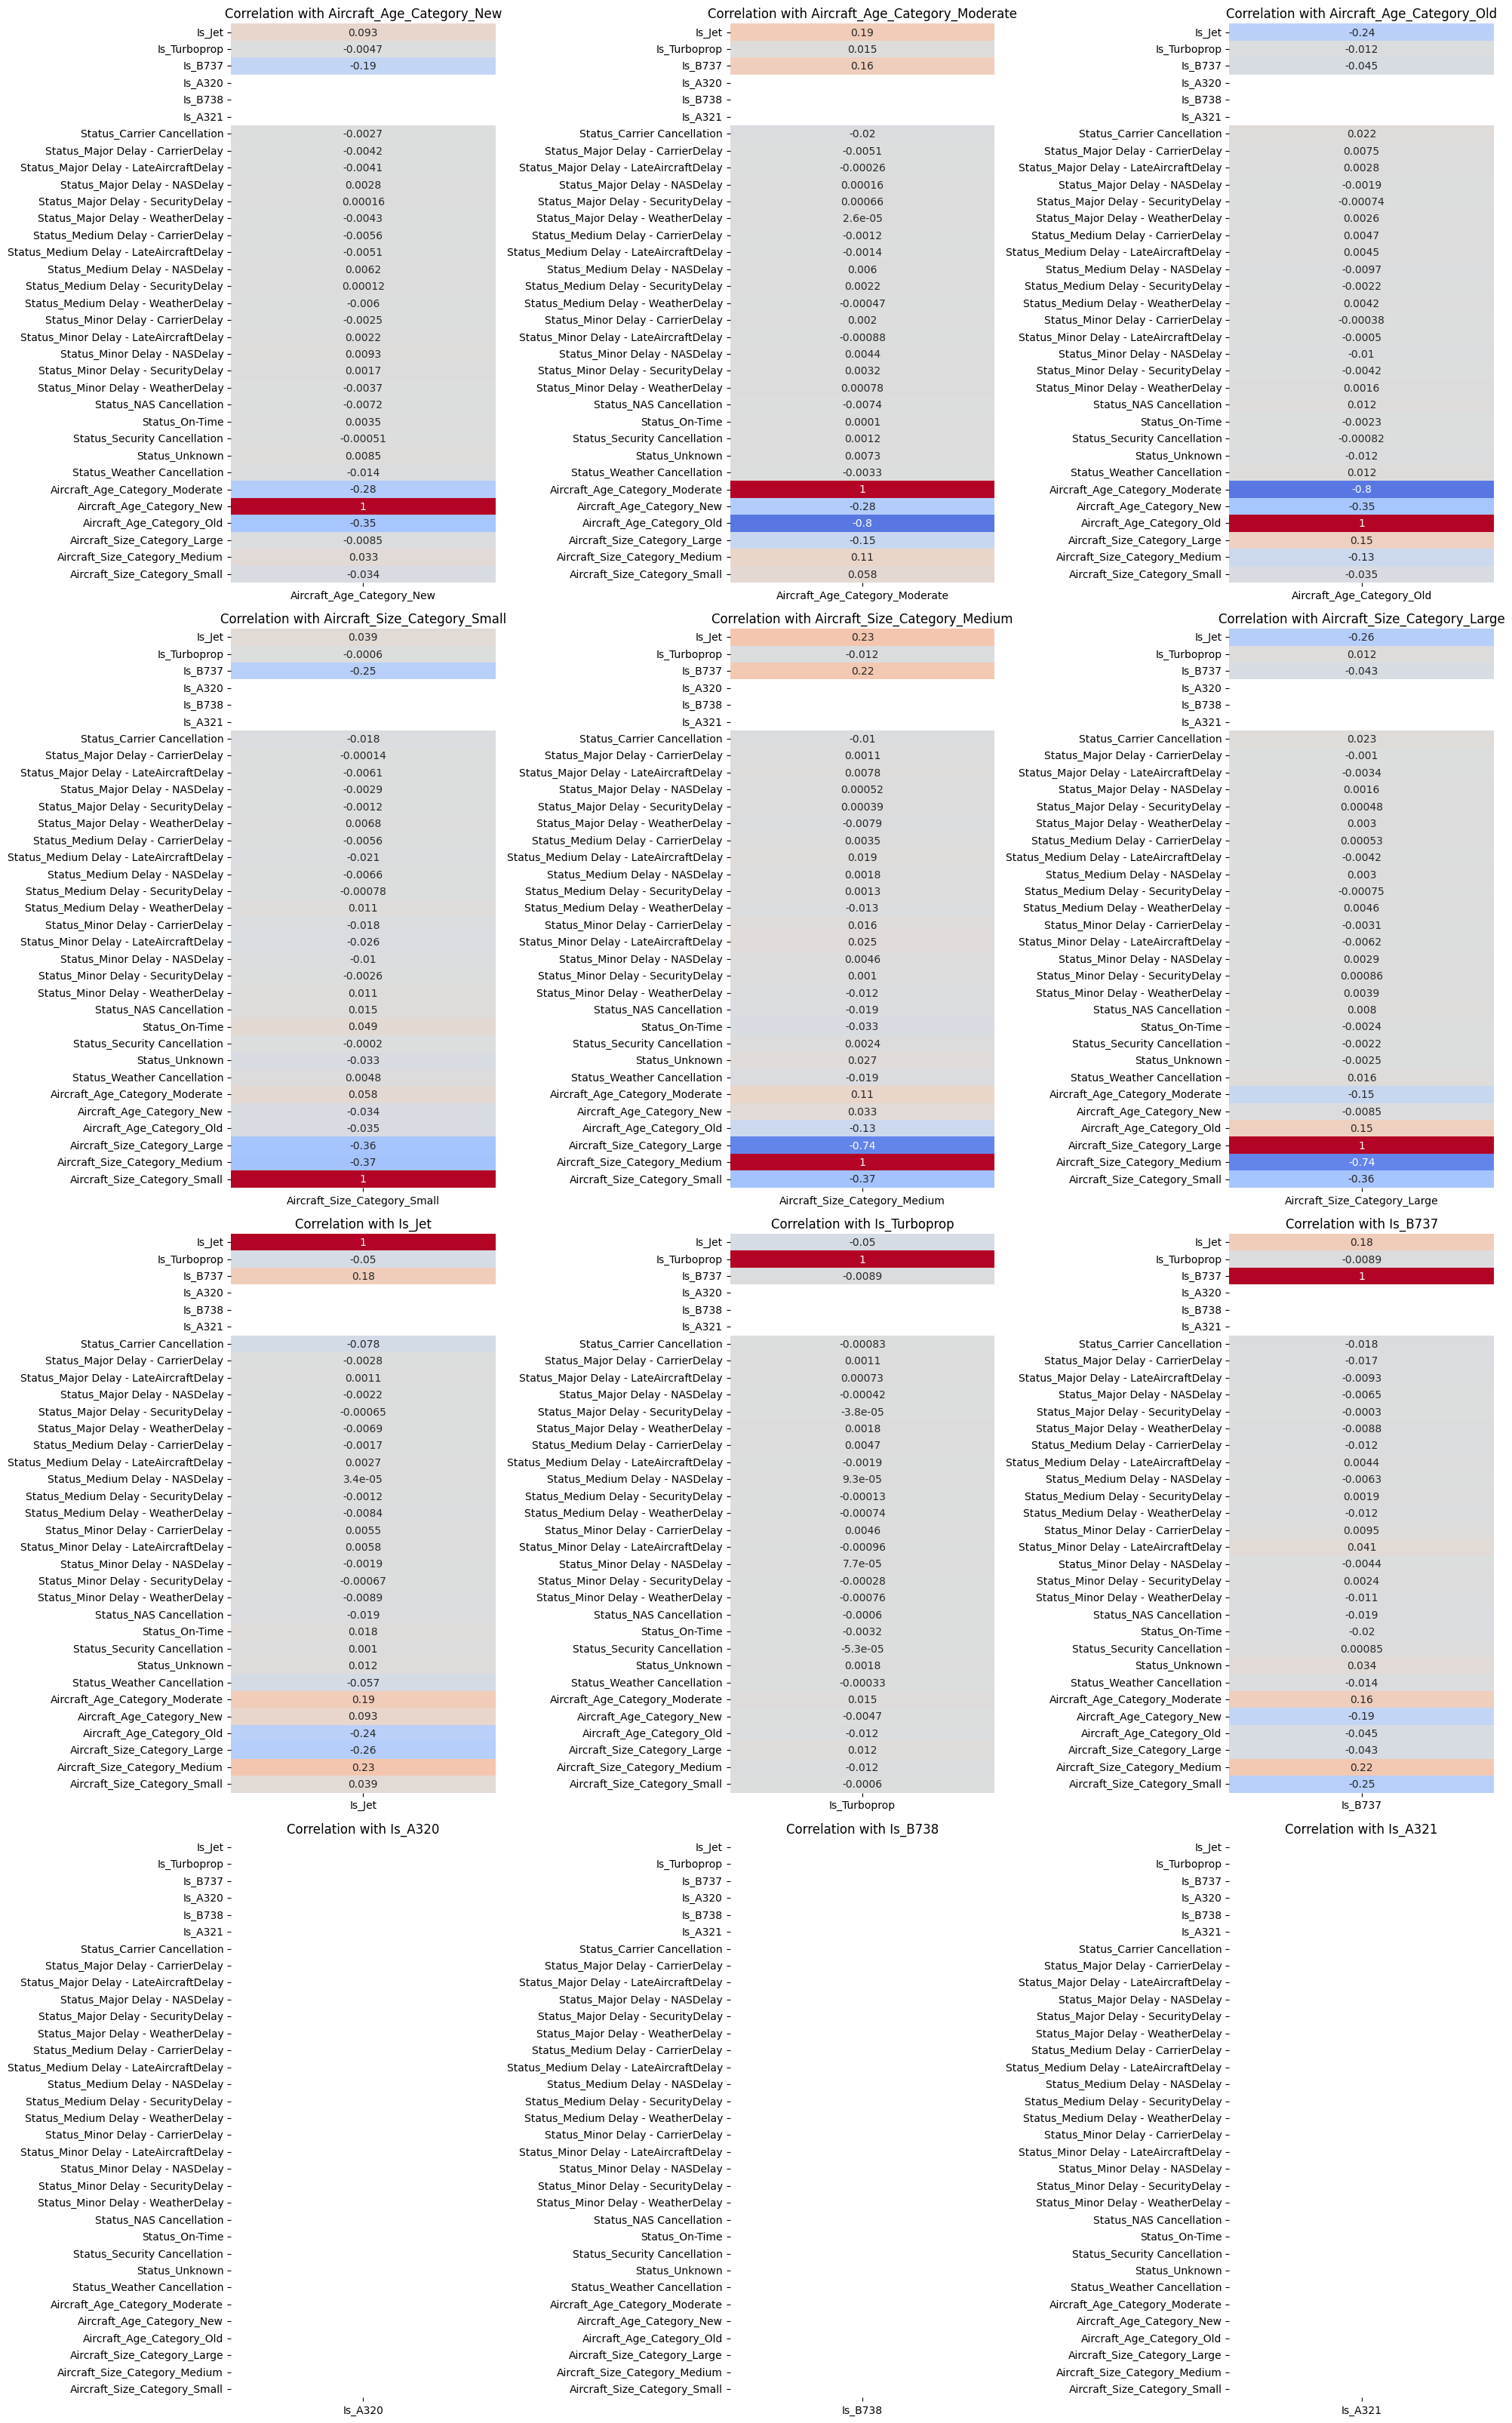

In [ ]:
# Categorize Aircraft Age
def categorize_age(age):
    if age <= 5:
        return 'New'
    elif age <= 15:
        return 'Moderate'
    else:
        return 'Old'

data['Aircraft_Age_Category'] = data['Aircraft_Age'].apply(categorize_age)

# Categorize Aircraft Size
def categorize_size(seats):
    if seats < 100:
        return 'Small'
    elif seats <= 200:
        return 'Medium'
    else:
        return 'Large'

data['Aircraft_Size_Category'] = data['Aircraft_Seats'].apply(categorize_size)

# Create binary flags for engine types
data['Is_Jet'] = data['Aircraft_EngineType'].apply(lambda x: 1 if x == 'Jet' else 0)
data['Is_Turboprop'] = data['Aircraft_EngineType'].apply(lambda x: 1 if x == 'Turboprop' else 0)

# Create binary flags for popular aircraft models
popular_models = ['B737', 'A320', 'B738', 'A321']
for model in popular_models:
    data[f'Is_{model}'] = data['Aircraft_ModelCode'].apply(lambda x: 1 if model in str(x) else 0)

# Create binary columns for each Flight_Status category
flight_status_dummies = pd.get_dummies(data['Flight_Status'], prefix='Status')

# Concatenate the binary columns with the new aircraft-related features
correlation_data = pd.concat([
    data[['Aircraft_Age_Category', 'Aircraft_Size_Category', 'Is_Jet', 'Is_Turboprop'] + [f'Is_{model}' for model in popular_models]], 
    flight_status_dummies
], axis=1)

# Convert categorical features to numeric for correlation
correlation_data = pd.get_dummies(correlation_data, columns=['Aircraft_Age_Category', 'Aircraft_Size_Category'])

# Compute the correlation matrix
aircraft_features_corr = correlation_data.corr()

# Plot the heatmaps
features = ['Aircraft_Age_Category_New', 'Aircraft_Age_Category_Moderate', 'Aircraft_Age_Category_Old',
            'Aircraft_Size_Category_Small', 'Aircraft_Size_Category_Medium', 'Aircraft_Size_Category_Large',
            'Is_Jet', 'Is_Turboprop'] + [f'Is_{model}' for model in popular_models]

plt.figure(figsize=(20, 40))
for i, feature in enumerate(features, 1):
    plt.subplot(len(features) // 3 + 1, 3, i)
    sns.heatmap(aircraft_features_corr[[feature]], annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=False)
    plt.title(f'Correlation with {feature}')
plt.tight_layout()
plt.show()

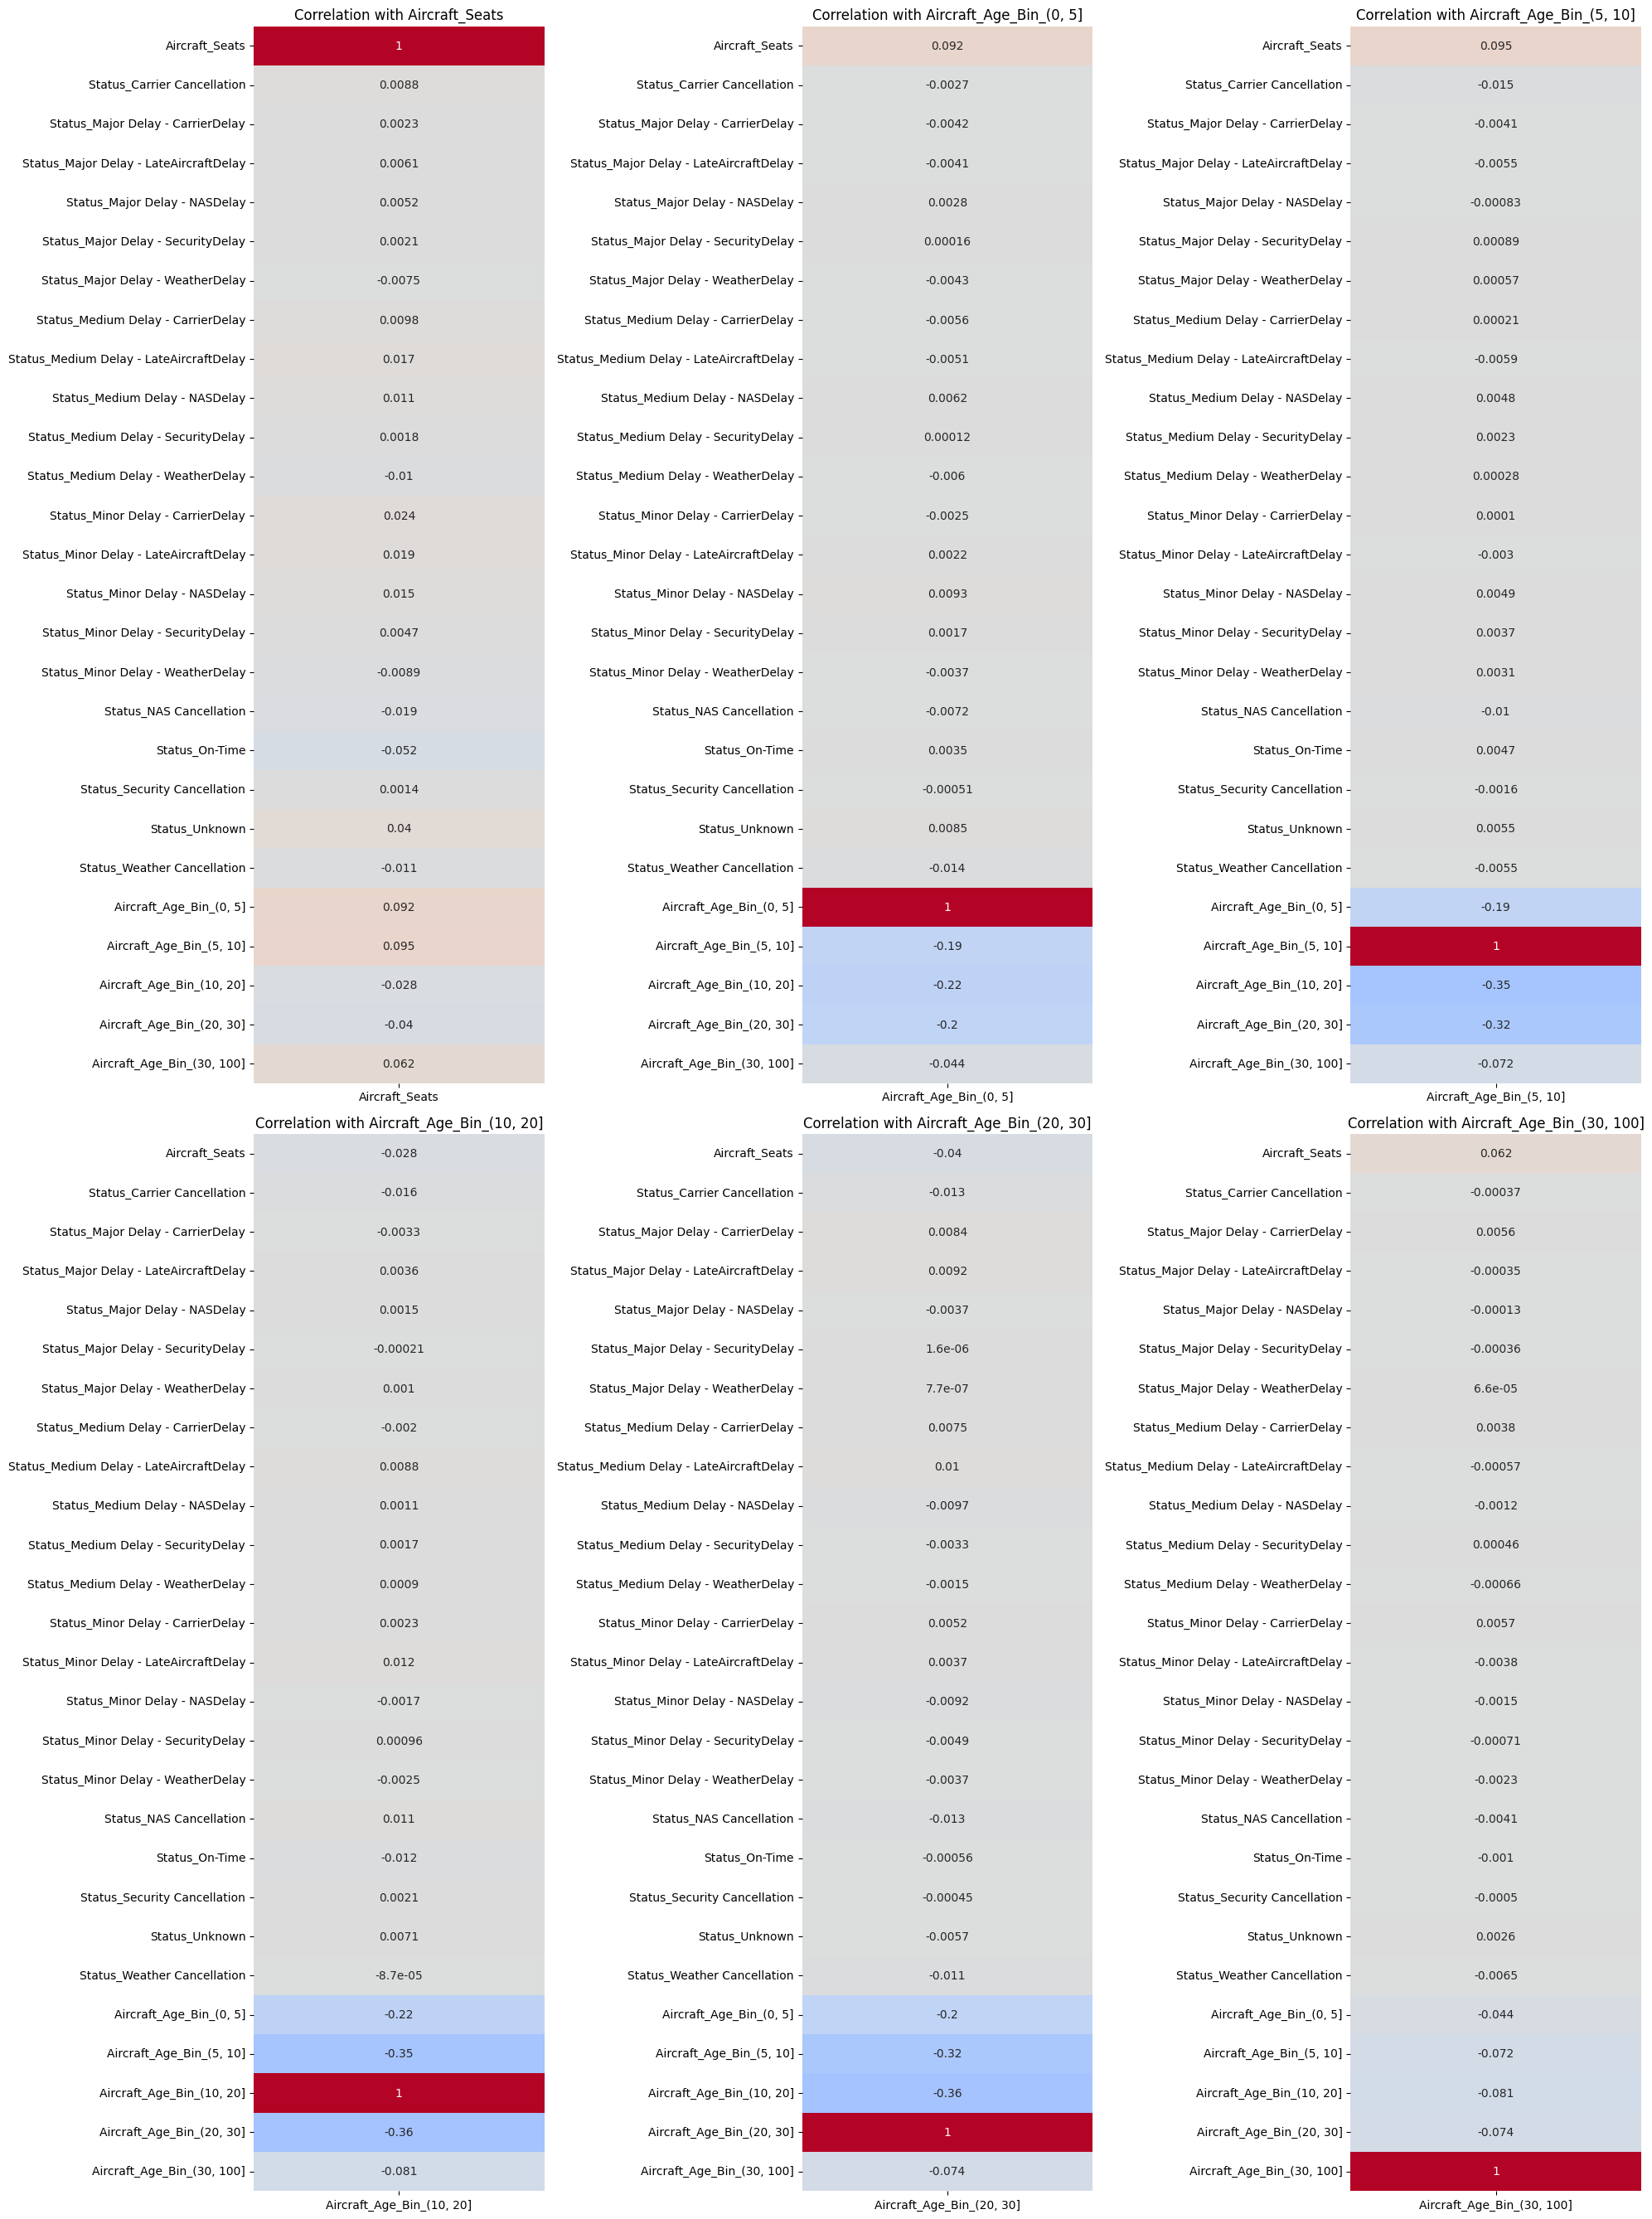

In [ ]:
# Bin Aircraft_Age into groups
data["Aircraft_Age_Bin"] = pd.cut(data["Aircraft_Age"], bins=[0, 5, 10, 20, 30, 100])

# Create binary columns for each Flight_Status category
flight_status_dummies = pd.get_dummies(data['Flight_Status'], prefix='Status')

# Concatenate the binary columns with Aircraft_Age_Bin and Aircraft_Seats
correlation_data = pd.concat([data[['Aircraft_Age_Bin', 'Aircraft_Seats']], flight_status_dummies], axis=1)

# Convert Aircraft_Age_Bin to numeric for correlation
correlation_data = pd.get_dummies(correlation_data, columns=['Aircraft_Age_Bin'])

# Compute the correlation matrix
aircraft_features_corr = correlation_data.corr()

# Plot the heatmaps
features = ['Aircraft_Seats'] + [col for col in correlation_data.columns if 'Aircraft_Age_Bin' in col]

plt.figure(figsize=(20, 40))
for i, feature in enumerate(features, 1):
    plt.subplot(len(features) // 3 + 1, 3, i)
    sns.heatmap(aircraft_features_corr[[feature]], annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=False)
    plt.title(f'Correlation with {feature}')
plt.tight_layout()
plt.show()

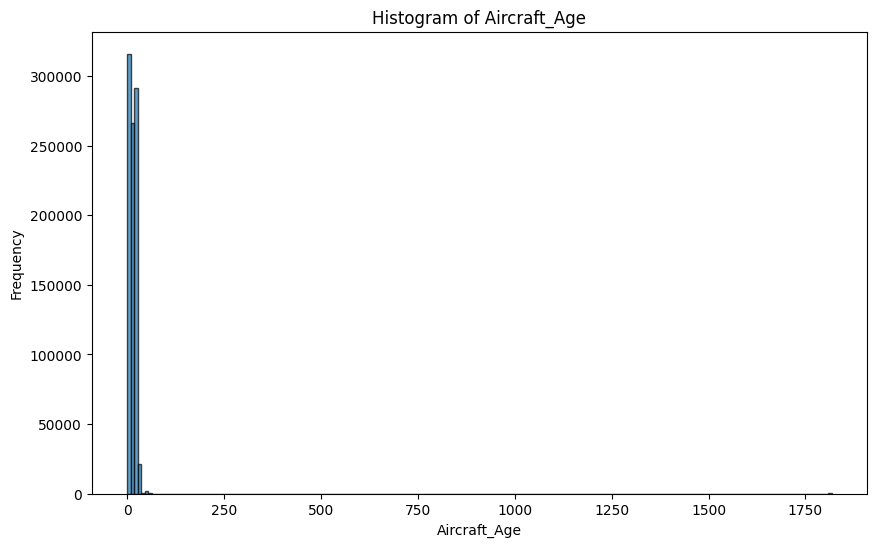

In [ ]:
# create histogram for aircraft age
plt.figure(figsize=(10, 6))
plt.hist(data['Aircraft_Age'], bins=200, edgecolor='k', alpha=0.7)
plt.title('Histogram of Aircraft_Age')
plt.xlabel('Aircraft_Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Show value counts for Aircraft_Age
aircraft_age_counts = data['Aircraft_Age'].value_counts()
print(aircraft_age_counts)
print(f"Highest Aircraft Age: {aircraft_age_counts.index.max()}")

Aircraft_Age
10.1    93362
10.3    92021
8.3     91657
5.8     89802
10.5    89382
        ...  
31.8      831
34.6      785
31.5      636
31.6       37
31.7        5
Name: count, Length: 355, dtype: int64
Highest Aircraft Age: 1817.6


## Aircraft Age outlier 
- Based on the histogram there seems to be an aircraft that has an age of 1817.6 years. 

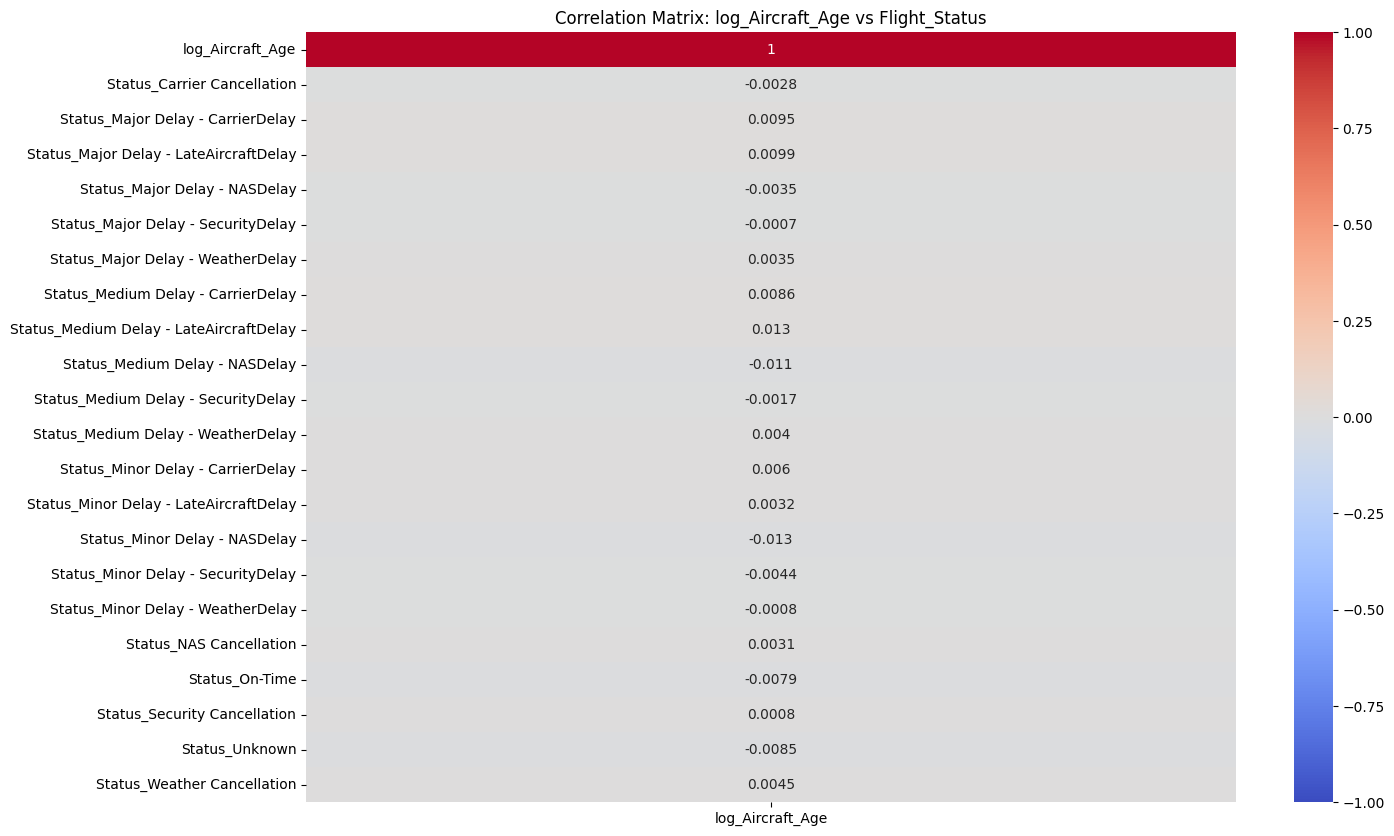

In [ ]:
# Log-transform the Aircraft_Age
data["log_Aircraft_Age"] = np.log1p(data["Aircraft_Age"])

# Create binary columns for each Flight_Status category
flight_status_dummies = pd.get_dummies(data['Flight_Status'], prefix='Status')

# Concatenate the binary columns with the log_Aircraft_Age
correlation_data = pd.concat([data[['log_Aircraft_Age']], flight_status_dummies], axis=1)

# Compute the correlation matrix
aircraft_age_corr = correlation_data.corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(aircraft_age_corr[['log_Aircraft_Age']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix: log_Aircraft_Age vs Flight_Status')
plt.show()

## Distance

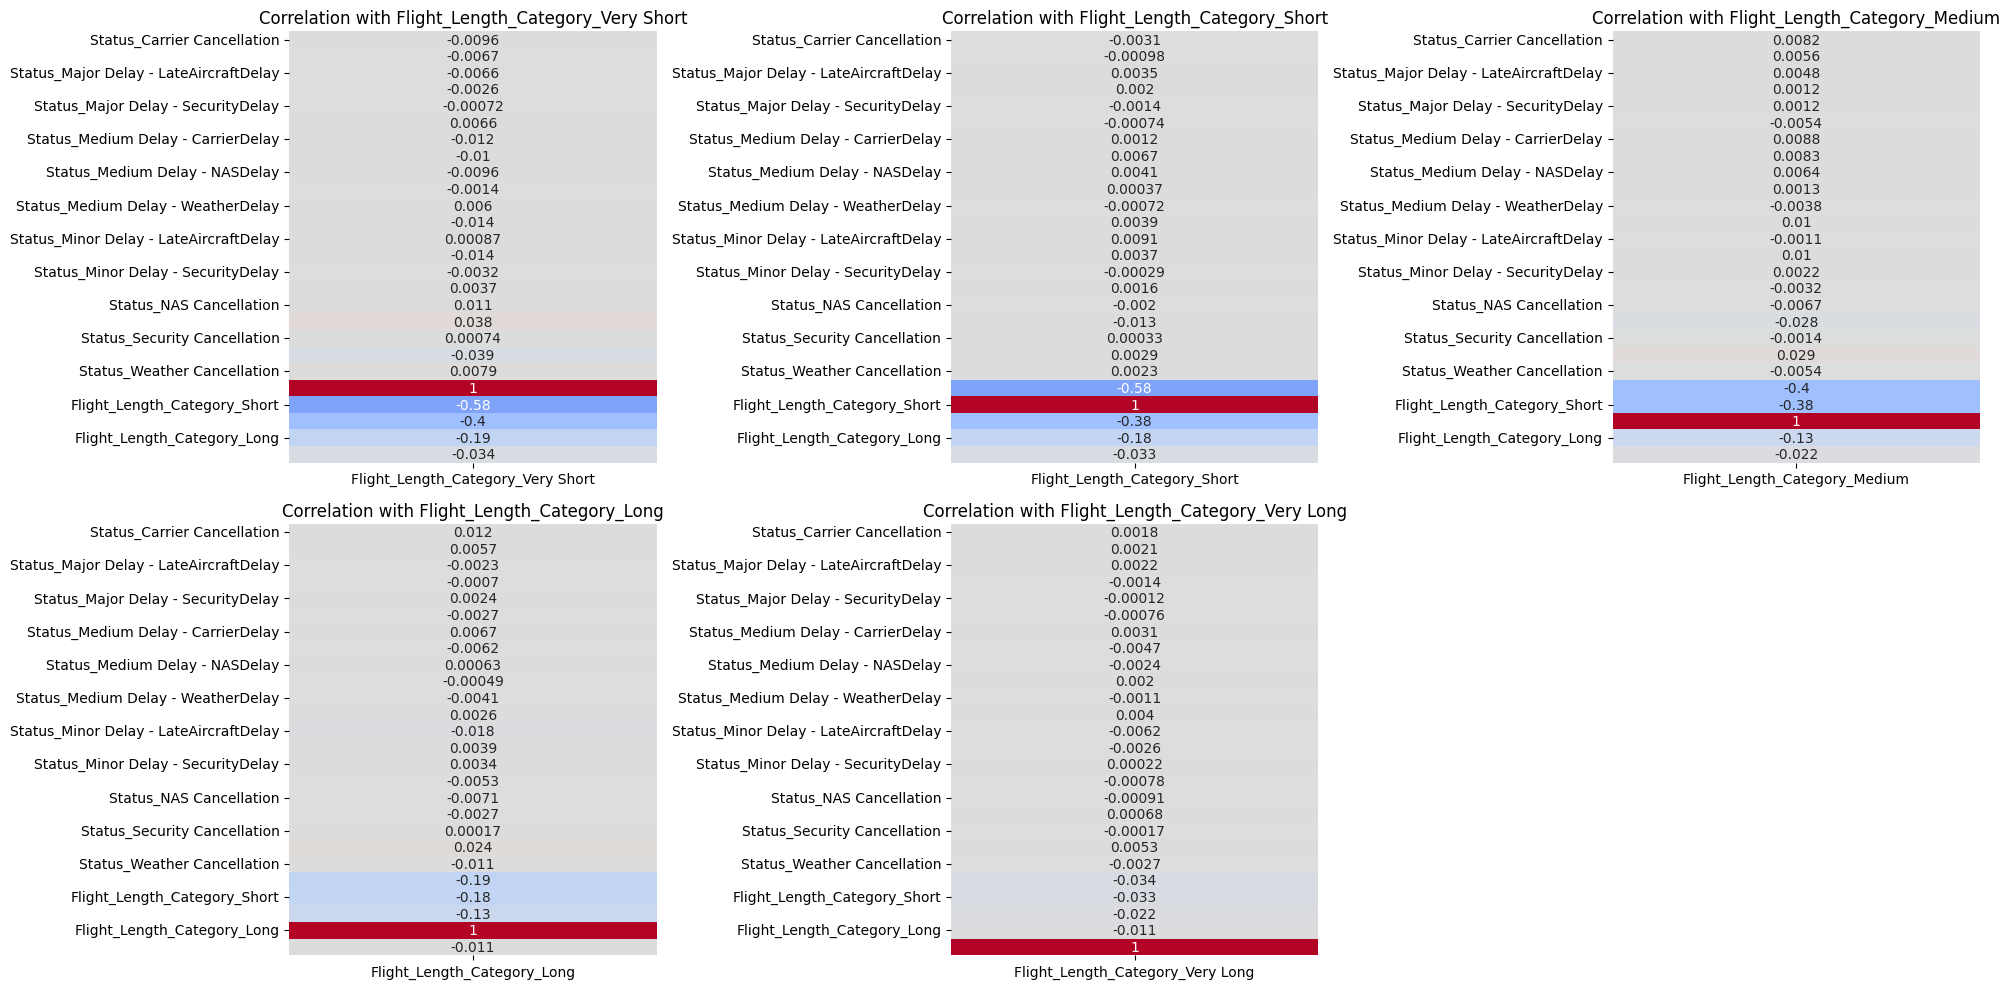

In [ ]:
# Define bins and labels for flight length categories
bins = [0, 500, 1000, 2000, 3000, data["Distance"].max()]
labels = ["Very Short", "Short", "Medium", "Long", "Very Long"]

# Create Flight_Length_Category column
data["Flight_Length_Category"] = pd.cut(data["Distance"], bins=bins, labels=labels)

# Create binary columns for each Flight_Status category
flight_status_dummies = pd.get_dummies(data['Flight_Status'], prefix='Status')

# Concatenate the binary columns with the Flight_Length_Category
correlation_data = pd.concat([data[['Flight_Length_Category']], flight_status_dummies], axis=1)

# Convert Flight_Length_Category to numeric for correlation
correlation_data = pd.get_dummies(correlation_data, columns=['Flight_Length_Category'])

# Compute the correlation matrix
flight_length_corr = correlation_data.corr()

# Plot the heatmaps
features = [col for col in correlation_data.columns if 'Flight_Length_Category' in col]

plt.figure(figsize=(20, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.heatmap(flight_length_corr[[feature]], annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=False)
    plt.title(f'Correlation with {feature}')
plt.tight_layout()
plt.show()

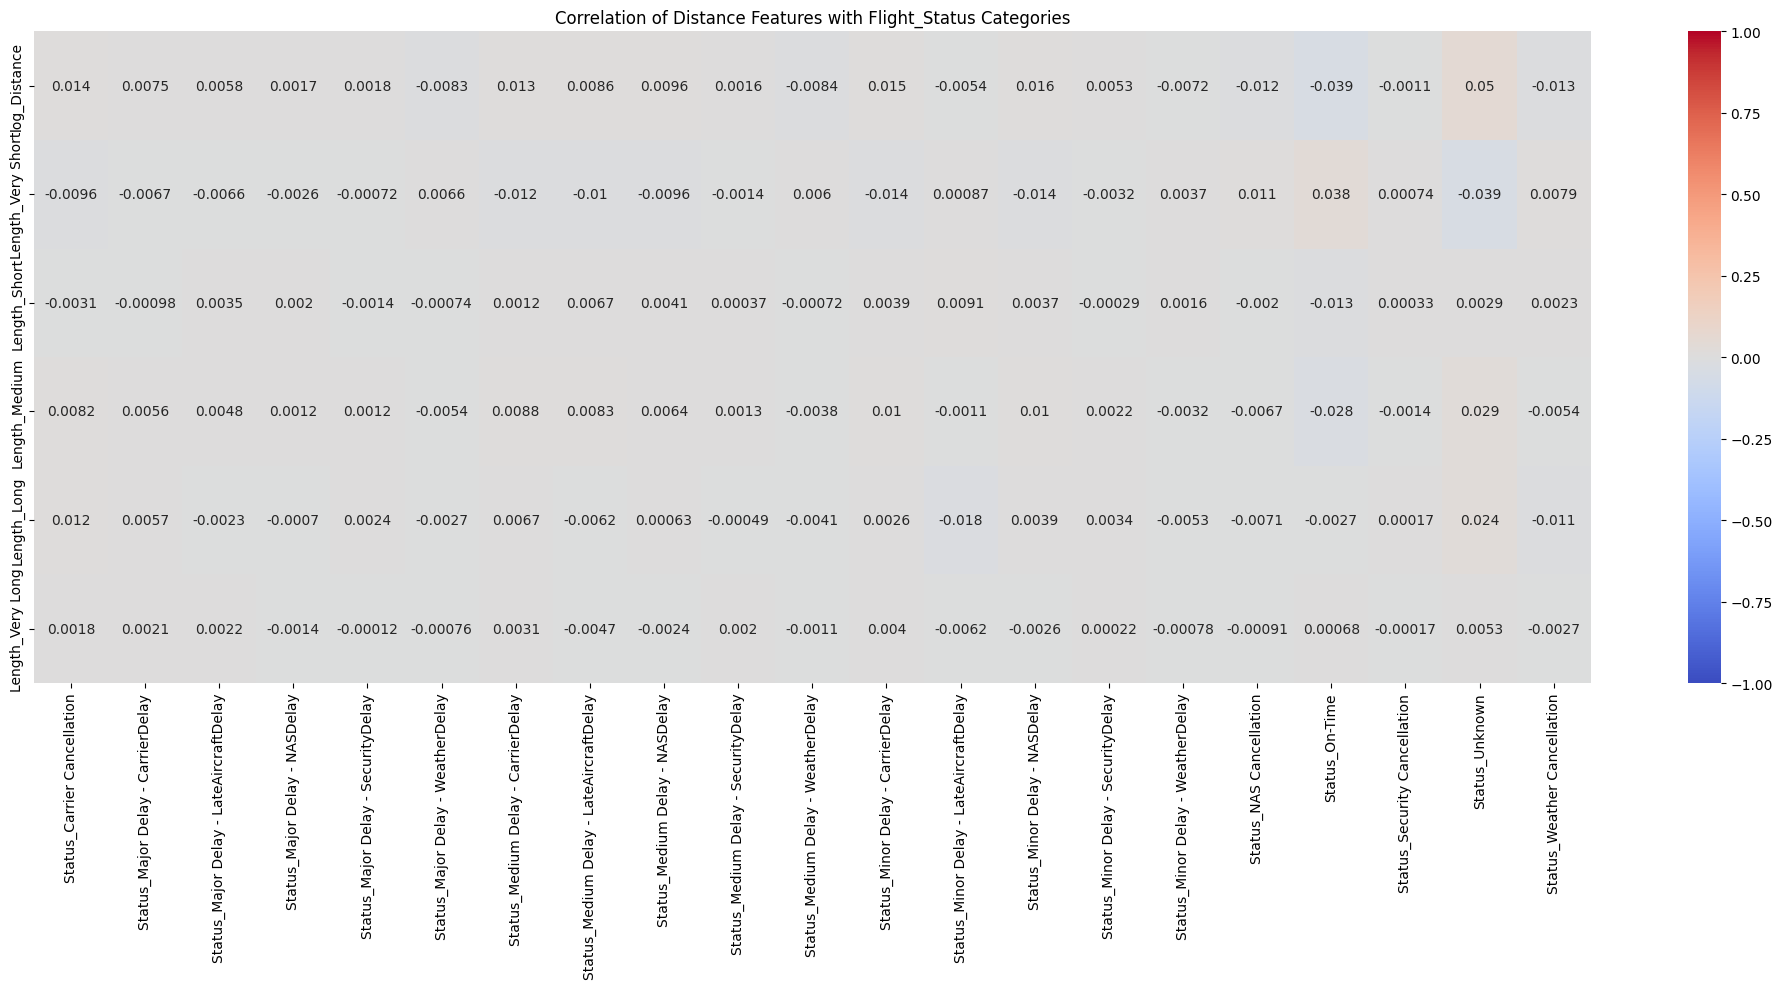

In [ ]:
# Log-transform the Distance
data["log_Distance"] = np.log1p(data["Distance"])

# Define log-based bins for log_Distance
log_bins = [0, np.log1p(500), np.log1p(1000), np.log1p(2000), np.log1p(3000), np.inf]
labels = ["Very Short", "Short", "Medium", "Long", "Very Long"]

# Create Flight_Length_Category column based on log_Distance
data["Flight_Length_Category"] = pd.cut(data["log_Distance"], bins=log_bins, labels=labels)

# One-hot encode Flight_Status and Flight_Length_Category
flight_status_dummies = pd.get_dummies(data['Flight_Status'], prefix='Status')
flight_length_dummies = pd.get_dummies(data['Flight_Length_Category'], prefix='Length')

# Combine for correlation analysis
correlation_data = pd.concat([data[["log_Distance"]], flight_length_dummies, flight_status_dummies], axis=1)

# Compute correlation matrix
flight_length_corr = correlation_data.corr()

# Extract only correlation of Distance-related features with Status features
features = ["log_Distance"] + list(flight_length_dummies.columns)
status_features = [col for col in flight_length_corr.columns if col.startswith("Status_")]

corr_subset = flight_length_corr.loc[features, status_features]

# Plot heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(corr_subset, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation of Distance Features with Flight_Status Categories')
plt.tight_layout()
plt.show()

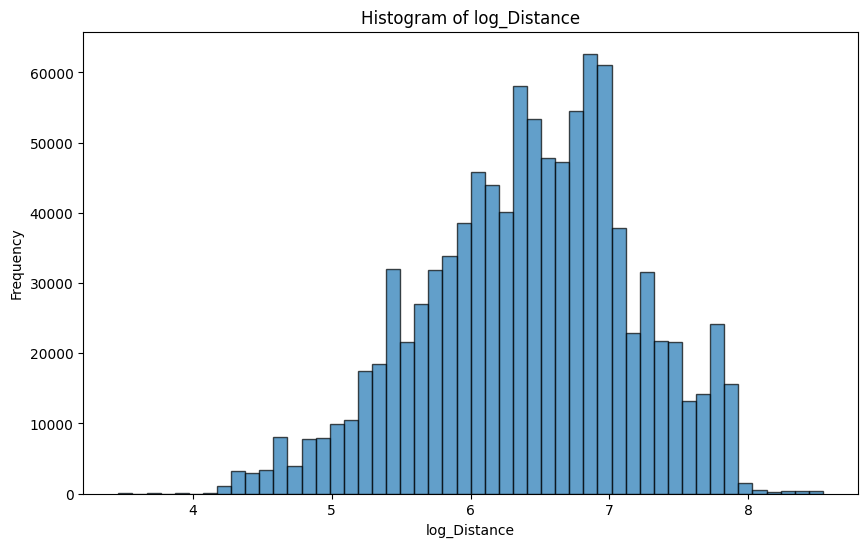

In [ ]:
# Plot histogram of log_Distance
plt.figure(figsize=(10, 6))
plt.hist(data['log_Distance'], bins=50, edgecolor='k', alpha=0.7)
plt.title('Histogram of log_Distance')
plt.xlabel('log_Distance')
plt.ylabel('Frequency')
plt.show()

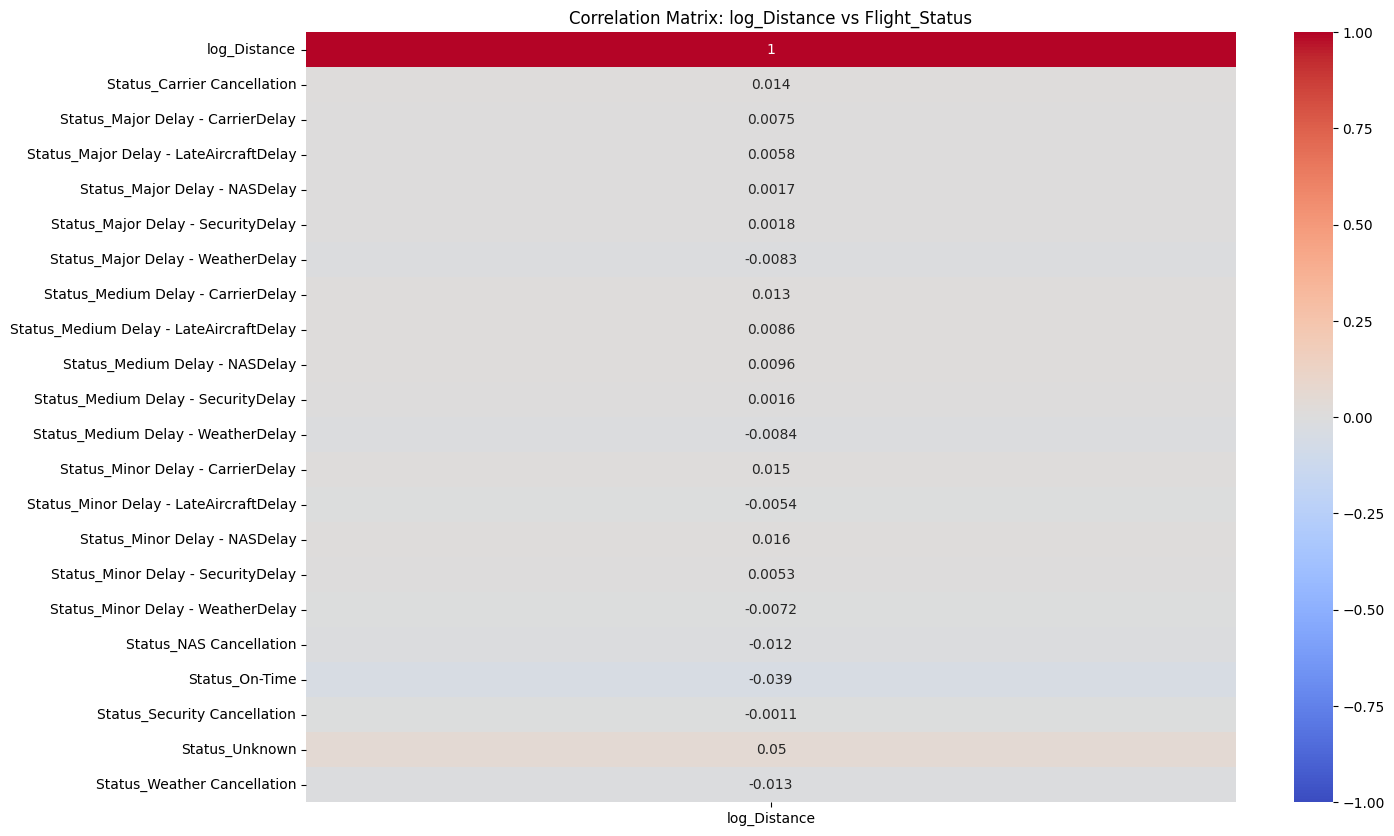

In [ ]:
# Ensure log_Distance feature is created
data["log_Distance"] = np.log1p(data["Distance"])

# Create binary columns for each Flight_Status category
flight_status_dummies = pd.get_dummies(data['Flight_Status'], prefix='Status')

# Concatenate the binary columns with the log_Distance
correlation_data = pd.concat([data[['log_Distance']], flight_status_dummies], axis=1)

# Compute the correlation matrix
log_distance_corr = correlation_data.corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(log_distance_corr[['log_Distance']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix: log_Distance vs Flight_Status')
plt.show()

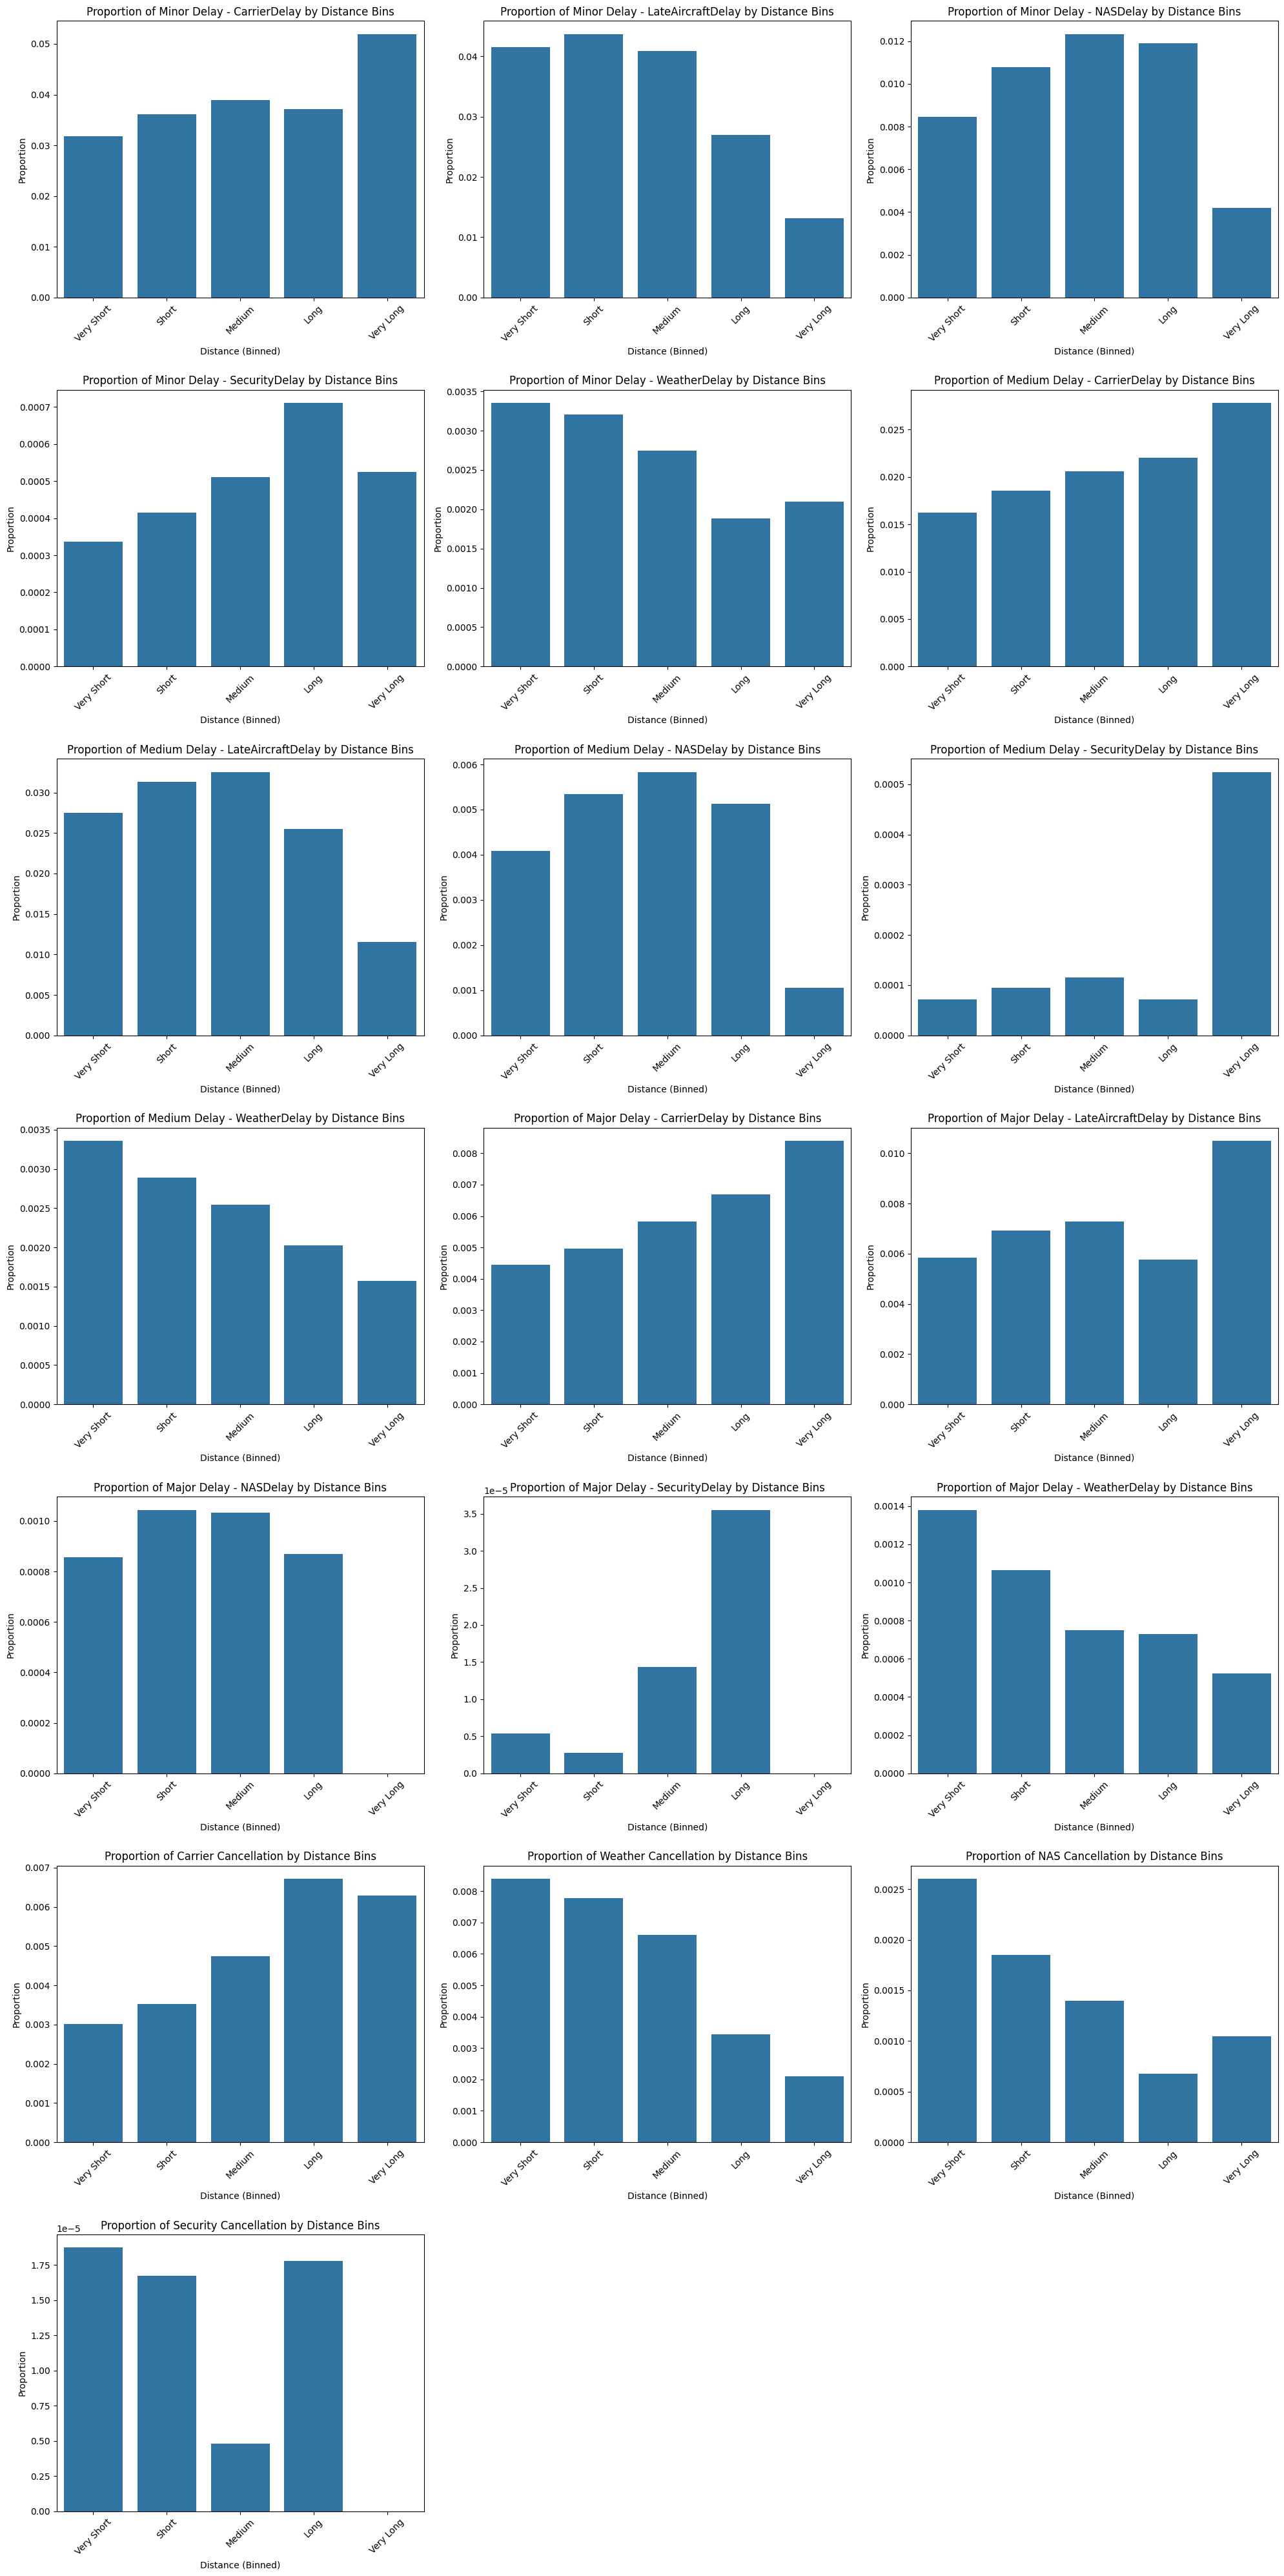

In [ ]:
# Define delay and cancellation categories
delay_categories = [
    'Minor Delay - CarrierDelay', 'Minor Delay - LateAircraftDelay', 'Minor Delay - NASDelay', 
    'Minor Delay - SecurityDelay', 'Minor Delay - WeatherDelay', 'Medium Delay - CarrierDelay', 
    'Medium Delay - LateAircraftDelay', 'Medium Delay - NASDelay', 'Medium Delay - SecurityDelay', 
    'Medium Delay - WeatherDelay', 'Major Delay - CarrierDelay', 'Major Delay - LateAircraftDelay', 
    'Major Delay - NASDelay', 'Major Delay - SecurityDelay', 'Major Delay - WeatherDelay'
]
cancellation_categories = [
    'Carrier Cancellation', 'Weather Cancellation', 'NAS Cancellation', 'Security Cancellation'
]

# Combine delay and cancellation categories
all_categories = delay_categories + cancellation_categories

# Create binary columns for each category
for category in all_categories:
    data[category] = data['Flight_Status'].apply(lambda x: 1 if category in x else 0)

# Define log-based bins for log_Distance
log_bins = [0, np.log1p(500), np.log1p(1000), np.log1p(2000), np.log1p(3000), np.inf]
labels = ["Very Short", "Short", "Medium", "Long", "Very Long"]

# Create Flight_Length_Category column based on log_Distance
data["Flight_Length_Category"] = pd.cut(data["log_Distance"], bins=log_bins, labels=labels, ordered=False)

# Plot individual delay types and cancellations
plt.figure(figsize=(20, 40))
for i, category in enumerate(all_categories, 1):
    # Calculate proportions of each category in each distance bin
    plot_df = data.groupby(['Flight_Length_Category'], observed=False)[category].mean().reset_index()
    
    # Plot
    plt.subplot(len(all_categories) // 3 + 1, 3, i)
    sns.barplot(data=plot_df, x='Flight_Length_Category', y=category)
    plt.title(f"Proportion of {category} by Distance Bins")
    plt.ylabel("Proportion")
    plt.xlabel("Distance (Binned)")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### **Non-Linear Relationship Between Flight Distance and Delay/Cancellation Types**

To better understand how flight distance influences delay and cancellation behavior, we analyzed the **proportional distribution of different delay and cancellation reasons** across binned categories of log-transformed flight distances (Very Short to Very Long). This approach enables us to detect **non-linear relationships** that may not be captured through standard correlation metrics.

#### **1. Carrier-Related Delays**
- **Minor and Medium Carrier Delays** show a **gradual increase** as flight distance increases, peaking in the **Very Long** category.
- **Major Carrier Delays** follow a similar upward trend.
- **Interpretation**: These delays may stem from greater logistical and operational complexity in managing long-haul flights, where tight turnaround times and increased resource demands raise the likelihood of disruption.

#### **2. Late Aircraft Delays**
- **Minor and Medium Late Aircraft Delays** tend to be **more common on shorter routes**, decreasing notably in Very Long flights.
- **Major Late Aircraft Delays**, however, show a **reversal**, increasing again in Very Long flights.
- **Interpretation**: This suggests a bifurcation in behavior — short-haul flights are more vulnerable to cascading delays from earlier flights, while long-haul operations may be disrupted due to aircraft availability or rotation delays.

#### **3. NAS (National Airspace System) Delays**
- Minor and Medium NAS delays **peak at Medium-distance bins** and decline for Very Long flights.
- **Interpretation**: Medium-haul flights likely intersect with busier, more congested domestic air corridors, where ATC (Air Traffic Control) delays are more frequent.

#### **4. Security Delays**
- These delays are relatively **rare**, but a small uptick is observed for Very Long flights in the Medium and Major delay categories.
- **Interpretation**: Although infrequent, security checks may be more stringent for longer or international flights, leading to occasional disruptions.

#### **5. Weather Delays**
- Across Minor, Medium, and Major categories, **weather-related delays decrease** with increasing flight distance.
- **Interpretation**: Short-haul flights are more susceptible to localized weather events, whereas long-haul flights have more flexibility to reroute or delay departures without cancellation.

### **Cancellations**

#### **Carrier Cancellations**
- Increase with distance, peaking in **Long and Very Long** flights.
- **Interpretation**: Operational costs and complexities of long-haul flights may make cancellations a more viable option when delays exceed thresholds.

#### **Weather Cancellations**
- Exhibit a **clear decline** with distance.
- **Interpretation**: Consistent with the delay trend, short-haul flights are more likely to be canceled due to localized weather disruptions.

#### **NAS and Security Cancellations**
- These remain low-frequency events across all distance bins, though NAS cancellations show a modest decline as distance increases.

### **Summary**

These plots reveal meaningful **non-linear relationships** between distance and specific types of flight disruptions. In particular:
- **Carrier and Late Aircraft delays** show opposing trends depending on distance and delay severity.
- **Weather-related disruptions** are disproportionately high for **shorter flights**.
- **NAS-related issues** concentrate in **medium-range flights**, highlighting a possible airspace congestion issue.

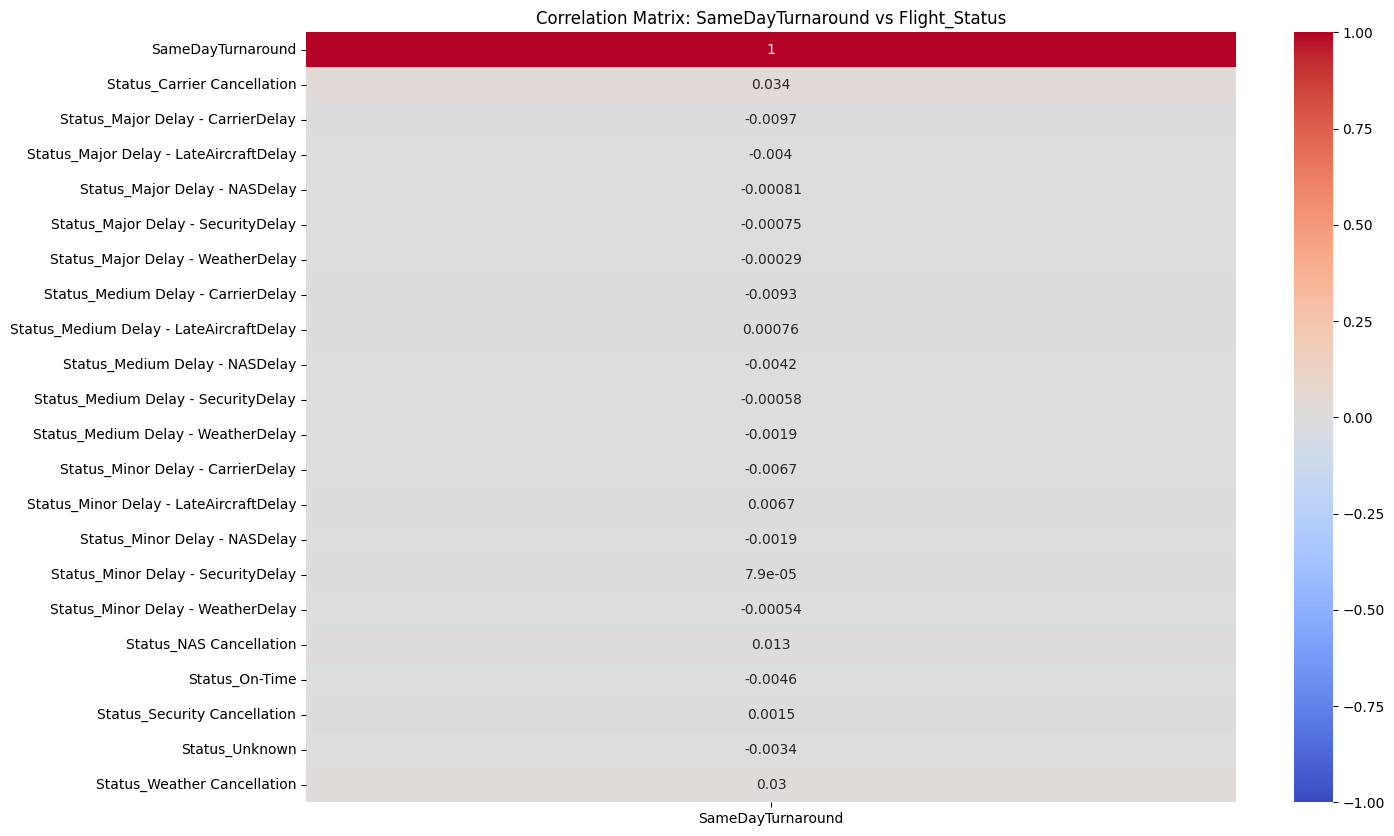

In [ ]:
# Create SameDayTurnaround feature
data['SameDayTurnaround'] = data.duplicated(subset=['Tail_Number', 'FlightDate'], keep=False).astype(int)

# Create binary columns for each Flight_Status category
flight_status_dummies = pd.get_dummies(data['Flight_Status'], prefix='Status')

# Concatenate the binary columns with the SameDayTurnaround feature
correlation_data = pd.concat([data[['SameDayTurnaround']], flight_status_dummies], axis=1)

# Compute the correlation matrix
same_day_turnaround_corr = correlation_data.corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(same_day_turnaround_corr[['SameDayTurnaround']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix: SameDayTurnaround vs Flight_Status')
plt.show()

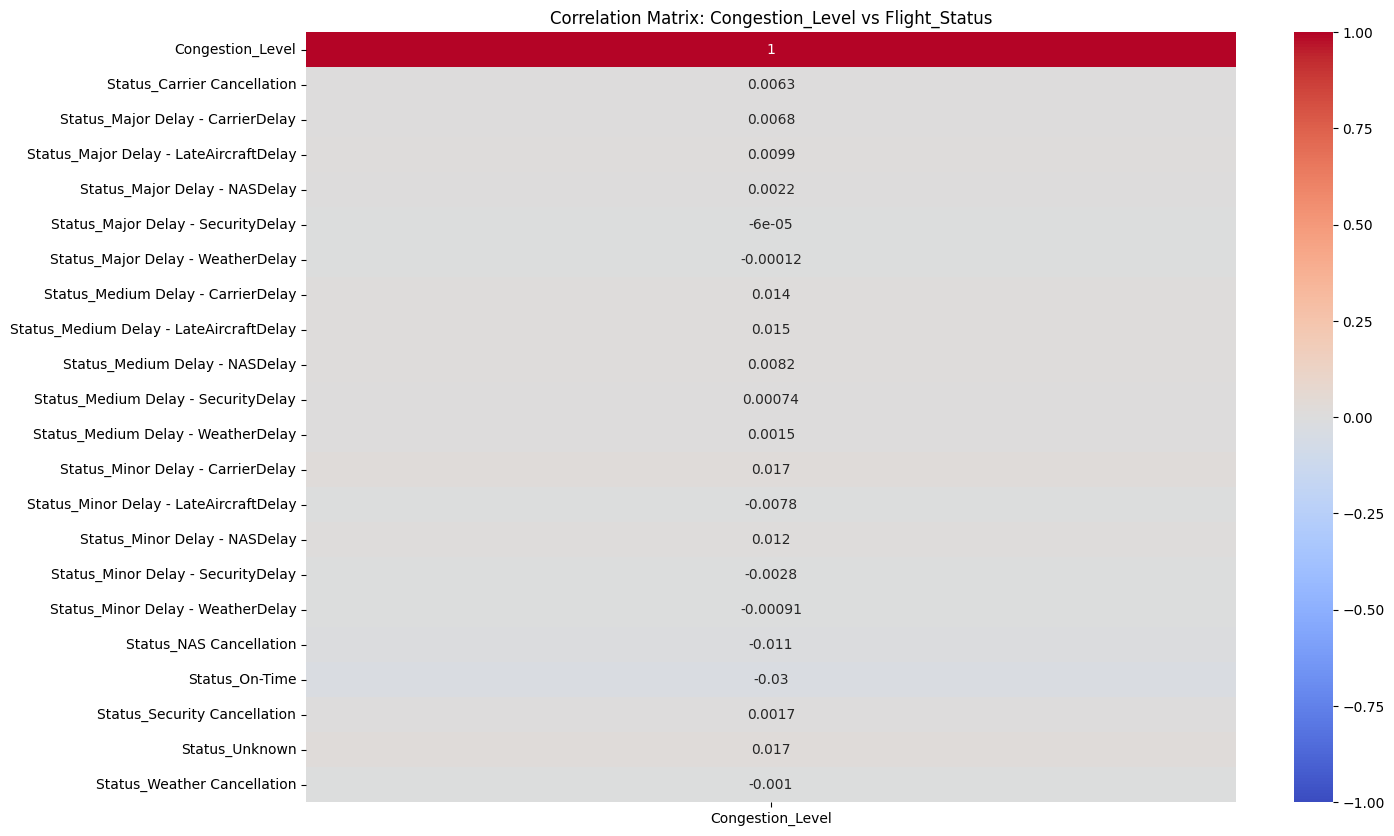

In [ ]:
# Calculate the frequency of flights for each airport
origin_freq = data['Origin'].value_counts().to_dict()
dest_freq = data['Dest'].value_counts().to_dict()

# Map these frequencies to the flight data to create the Congestion_Level feature
data['Origin_Congestion_Level'] = data['Origin'].map(origin_freq)
data['Dest_Congestion_Level'] = data['Dest'].map(dest_freq)

# Combine Origin and Destination congestion levels to get an overall congestion level
data['Congestion_Level'] = data['Origin_Congestion_Level'] + data['Dest_Congestion_Level']

# Create binary columns for each Flight_Status category
flight_status_dummies = pd.get_dummies(data['Flight_Status'], prefix='Status')

# Concatenate the binary columns with the Congestion_Level feature
correlation_data = pd.concat([data[['Congestion_Level']], flight_status_dummies], axis=1)

# Compute the correlation matrix
congestion_corr = correlation_data.corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(congestion_corr[['Congestion_Level']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix: Congestion_Level vs Flight_Status')
plt.show()

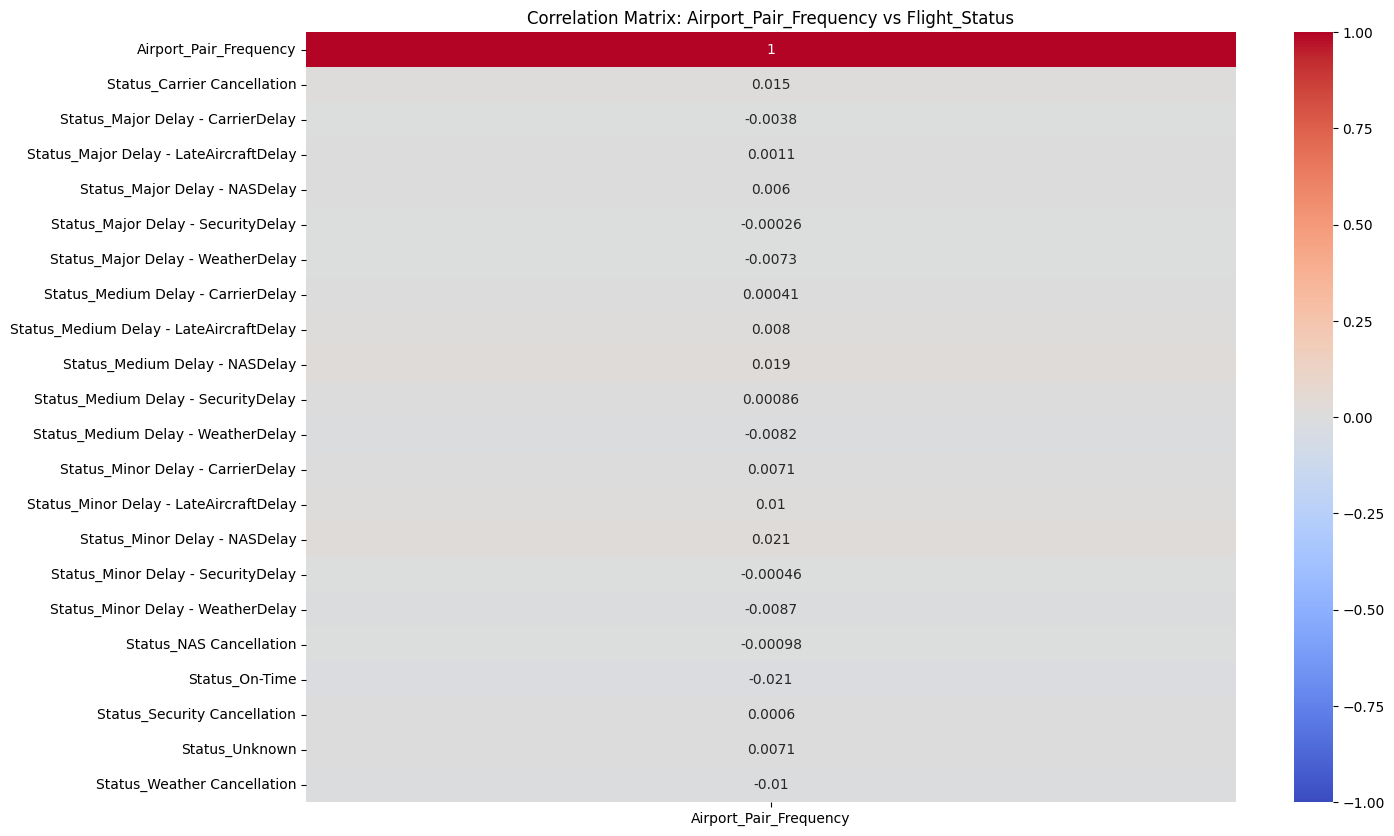

In [ ]:
# Create Airport_Pair feature by concatenating Origin and Dest
data['Airport_Pair'] = data['Origin'] + '_' + data['Dest']

# Frequency encode the Airport_Pair feature
airport_pair_counts = data['Airport_Pair'].value_counts().to_dict()
data['Airport_Pair_Frequency'] = data['Airport_Pair'].map(airport_pair_counts)

# Create binary columns for each Flight_Status category
flight_status_dummies = pd.get_dummies(data['Flight_Status'], prefix='Status')

# Concatenate the binary columns with the Airport_Pair_Frequency feature
correlation_data = pd.concat([data[['Airport_Pair_Frequency']], flight_status_dummies], axis=1)

# Compute the correlation matrix
airport_pair_corr = correlation_data.corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(airport_pair_corr[['Airport_Pair_Frequency']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix: Airport_Pair_Frequency vs Flight_Status')
plt.show()

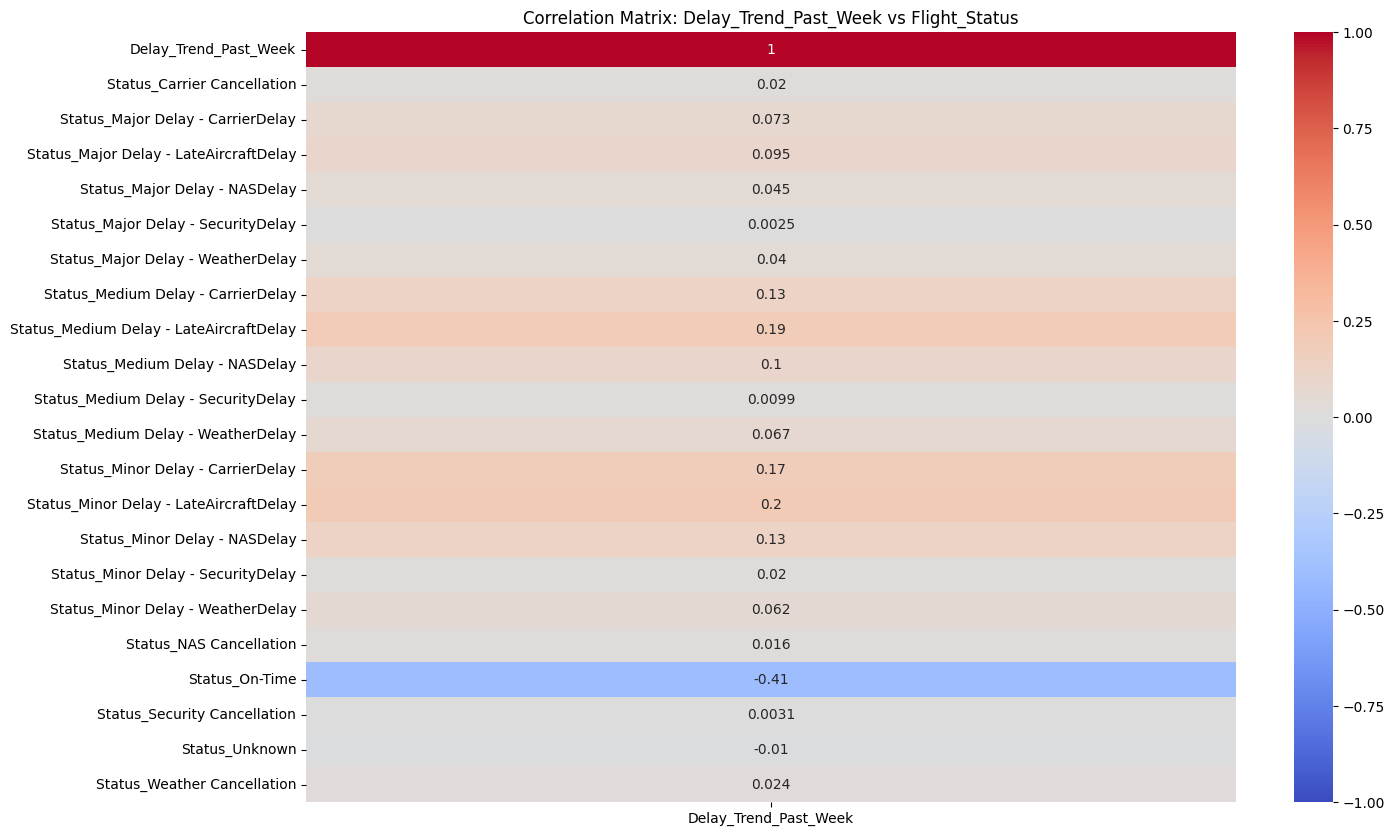

In [ ]:
# Calculate rolling window average of delays for the same route over the past week
data['FlightDate'] = pd.to_datetime(data['FlightDate'])
data = data.sort_values(by=['FlightDate'])

# Create a new column for delay in minutes
# Extract delay reasons from Flight_Status and calculate total delay minutes
delay_reasons = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
for reason in delay_reasons:
    data[reason] = data['Flight_Status'].apply(lambda x: int(reason in x.split(' - ')[-1]) if 'Delay' in x else 0)
data['TotalDelayMinutes'] = data[delay_reasons].sum(axis=1)

# Group by route and calculate rolling average delay
data['Delay_Trend_Past_Week'] = data.groupby('Airport_Pair')['TotalDelayMinutes'].transform(lambda x: x.rolling(window=7, min_periods=1).mean())

# Fill NaN values with 0 (for the first few days where rolling window is not complete)
data['Delay_Trend_Past_Week'] = data['Delay_Trend_Past_Week'].fillna(0)

# Create binary columns for each Flight_Status category
flight_status_dummies = pd.get_dummies(data['Flight_Status'], prefix='Status')

# Concatenate the binary columns with the Delay_Trend_Past_Week feature
correlation_data = pd.concat([data[['Delay_Trend_Past_Week']], flight_status_dummies], axis=1)

# Compute the correlation matrix
delay_trend_corr = correlation_data.corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(delay_trend_corr[['Delay_Trend_Past_Week']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix: Delay_Trend_Past_Week vs Flight_Status')
plt.show()

## Delay Trends:

#### 1. **Strongest Correlation (Negative):**
- **`Status_On-Time`:**  
  - Correlation: **-0.41**
  - This is by far the strongest signal in the chart.
  - **Interpretation:** As the average delay for a route over the past week increases, the probability of the flight being on-time significantly decreases.
  - Suggests `Delay_Trend_Past_Week` is a **highly informative feature** for detecting flight disruptions.

#### 2. **Positive Correlations with Minor & Medium Delays:**
- **Minor Delay - LateAircraftDelay:** **0.20**
- **Medium Delay - LateAircraftDelay:** **0.19**
- **Minor Delay - CarrierDelay / NASDelay:** ~**0.13–0.17**
- **Medium Delay - CarrierDelay:** **0.13**

These all show **modest positive correlations**.  
This implies that a rise in historical delays on a route increases the likelihood of small-to-moderate delays (especially due to **LateAircraft** and **Carrier-related** causes). These are often the result of **cascading delays** from prior legs or operational inefficiencies.

#### 3. **Very Weak or No Correlation for Cancellations:**
- Cancellation types like `Status_Carrier Cancellation`, `Status_Weather Cancellation`, `Status_Security Cancellation`, and `Status_NAS Cancellation` have **very low correlation values** (mostly < 0.03).
- This suggests **cancellations are likely driven by sudden or external events** (e.g., weather systems, security alerts) rather than historical delay patterns.

#### 4. **‘Unknown’ and ‘Security Delay’** correlations are negligible:
- These categories show near-zero correlation, which is expected as they are either **rare events** or too vague to pattern-match consistently.


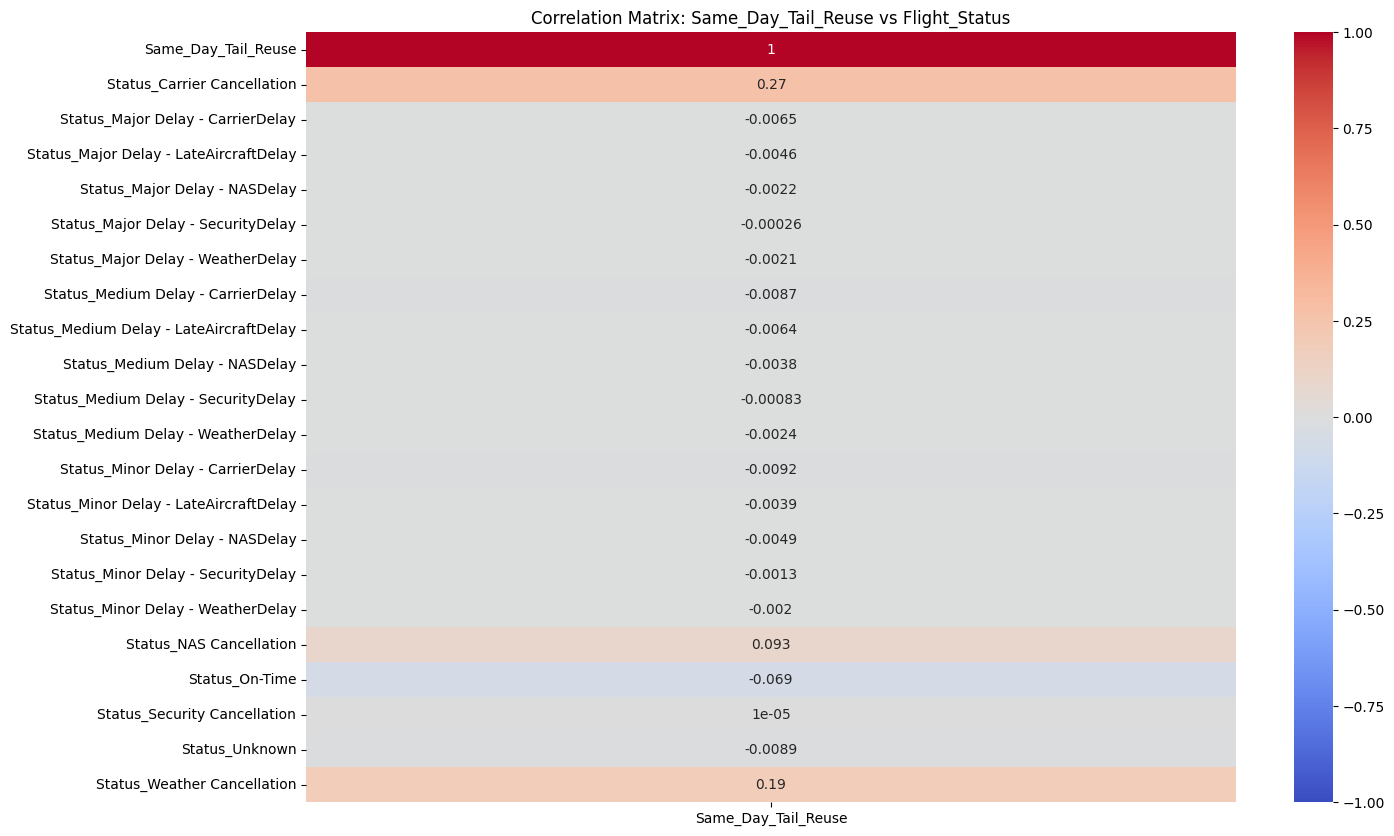

In [ ]:
# Count how many flights the same tail number flies per day
data['Same_Day_Tail_Reuse'] = data.groupby(['Tail_Number', 'FlightDate'])['Tail_Number'].transform('count')

# Create binary columns for each Flight_Status category
flight_status_dummies = pd.get_dummies(data['Flight_Status'], prefix='Status')

# Concatenate the binary columns with the Same_Day_Tail_Reuse feature
correlation_data = pd.concat([data[['Same_Day_Tail_Reuse']], flight_status_dummies], axis=1)

# Compute the correlation matrix
same_day_tail_reuse_corr = correlation_data.corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(same_day_tail_reuse_corr[['Same_Day_Tail_Reuse']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix: Same_Day_Tail_Reuse vs Flight_Status')
plt.show()

### **Feature Overview: `Same_Day_Tail_Reuse`**

The `Same_Day_Tail_Reuse` feature measures how many times a specific aircraft (identified by its tail number) is scheduled to operate flights on the same day. It is derived by grouping the dataset by both `Tail_Number` and `FlightDate`, then counting the number of flight assignments per aircraft per day.

### **Correlation**

#### **1. Positive Association with Cancellations**
- **Carrier Cancellation** exhibits a **moderate positive correlation (0.27)** with `Same_Day_Tail_Reuse`.
- **Weather Cancellation** and **NAS Cancellation** also show **notable positive correlations**, approximately **0.19** and **0.093**, respectively.

These findings indicate that aircraft utilized more frequently in a single day tend to have a higher probability of being canceled, potentially due to tighter schedules, reduced turnaround time, and limited flexibility in responding to operational disruptions.

#### **2. Negative Association with On-Time Performance**
- The `On-Time` category shows a **negative correlation (-0.069)** with `Same_Day_Tail_Reuse`.

While not highly pronounced, this suggests that flights operated by aircraft reused multiple times in a day are less likely to be on time. This could be attributed to the cumulative effects of minor delays throughout the day or logistical constraints affecting departure punctuality.

#### **3. Minimal Correlation with Delay Severity**
- Most delay categories, whether minor, medium, or major across various reasons (e.g., weather, NAS, carrier), show **very weak or near-zero correlations** with this feature.

This suggests that while frequent tail number reuse may affect flight completion (cancellations) and slightly reduce on-time performance, it does not have a clear linear relationship with the **severity** or **type** of delay experienced.

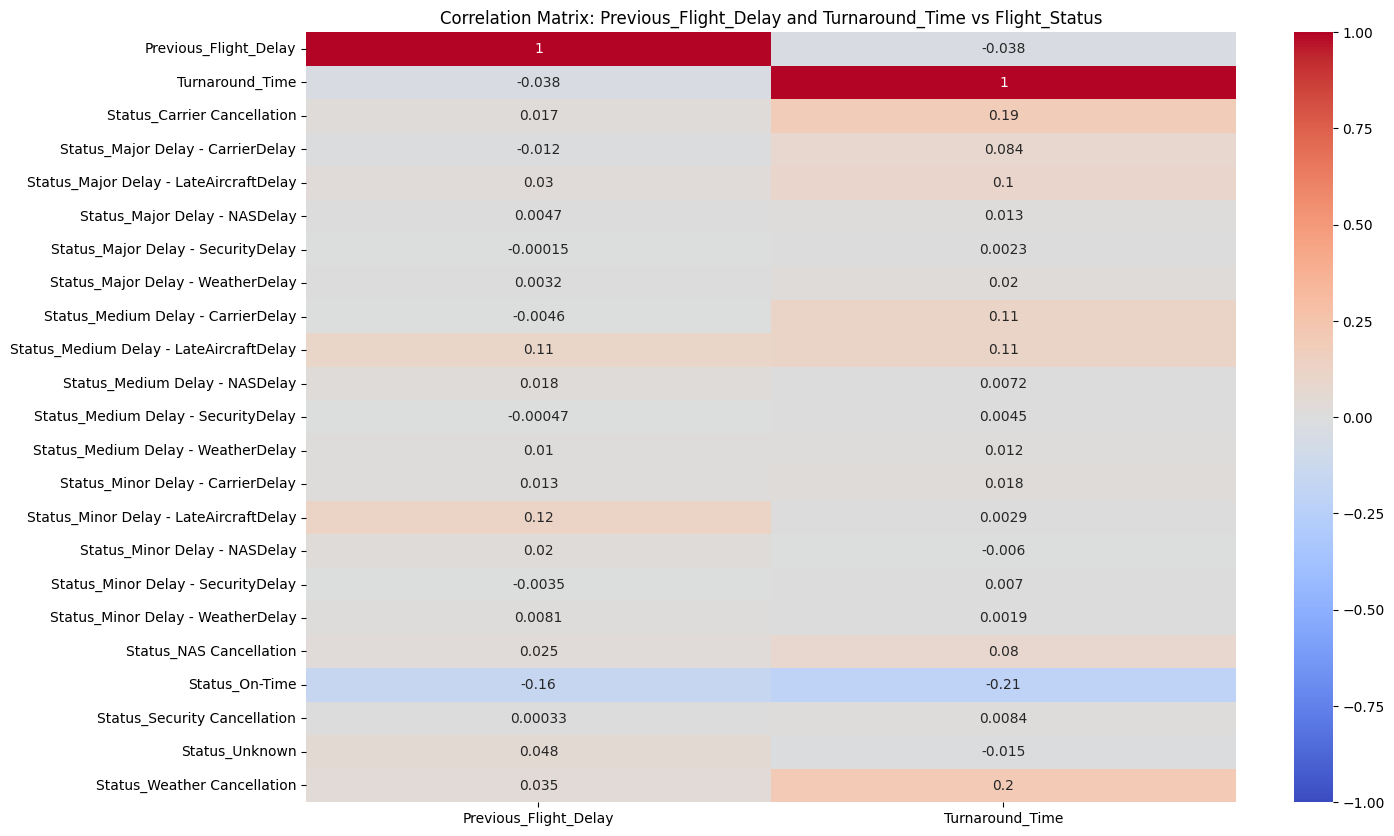

In [ ]:
# Sort data by Tail_Number, FlightDate, and CRSDepTime
data = data.sort_values(by=['Tail_Number', 'FlightDate', 'CRSDepTime'])

# Create Previous_Flight_Delay feature
data['Previous_Flight_Delay'] = data.groupby(['Tail_Number', 'FlightDate'])['CRSDepTime'].shift(1).fillna(0)

# Create Turnaround_Time feature
data['Previous_Arrival_Time'] = data.groupby(['Tail_Number', 'FlightDate'])['CRSArrTime'].shift(1)
data['Turnaround_Time'] = data['CRSDepTime'] - data['Previous_Arrival_Time']
data['Turnaround_Time'] = data['Turnaround_Time'].apply(lambda x: x if x >= 0 else x + 2400)

# Create binary columns for each Flight_Status category
flight_status_dummies = pd.get_dummies(data['Flight_Status'], prefix='Status')

# Concatenate the binary columns with the new features
correlation_data = pd.concat([data[['Previous_Flight_Delay', 'Turnaround_Time']], flight_status_dummies], axis=1)

# Compute the correlation matrix
propagation_corr = correlation_data.corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(propagation_corr[['Previous_Flight_Delay', 'Turnaround_Time']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix: Previous_Flight_Delay and Turnaround_Time vs Flight_Status')
plt.show()

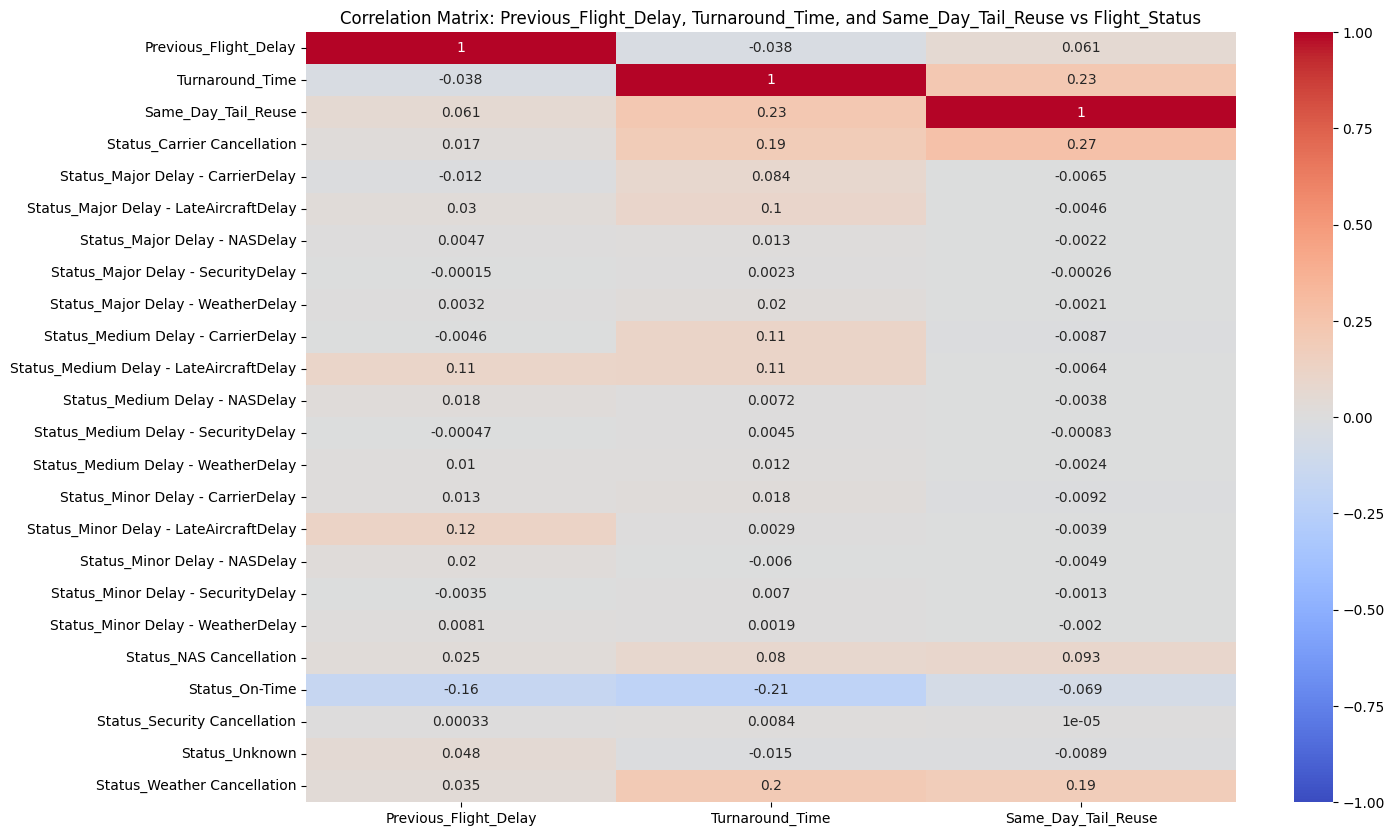

In [ ]:
# Select the relevant columns for correlation
correlation_columns = ['Previous_Flight_Delay', 'Turnaround_Time', 'Same_Day_Tail_Reuse']

# Create binary columns for each Flight_Status category
flight_status_dummies = pd.get_dummies(data['Flight_Status'], prefix='Status')

# Concatenate the binary columns with the selected features
correlation_data = pd.concat([data[correlation_columns], flight_status_dummies], axis=1)

# Compute the correlation matrix
correlation_matrix = correlation_data.corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix[correlation_columns], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix: Previous_Flight_Delay, Turnaround_Time, and Same_Day_Tail_Reuse vs Flight_Status')
plt.show()

### **Propagation Delay Features vs Flight Status**

This analysis investigates three engineered features that reflect how operational decisions and aircraft reuse impact flight delays and cancellations. These features are evaluated for their correlation with specific flight delay categories and cancellation statuses.

#### **1. `Previous_Flight_Delay`**

This feature captures whether the current flight had a prior scheduled flight (on the same day and aircraft).

- **Negative correlation with `On-Time` status (-0.16)**:  
  Aircraft that have operated earlier flights on the same day are less likely to be on time. This suggests that flights later in a daily sequence are more vulnerable to disruptions, likely due to compounding operational delays.

- **Positive correlation with `Minor Delay - LateAircraftDelay` (0.12) and `Medium Delay - LateAircraftDelay` (0.11)**:  
  These categories, tied to aircraft arriving late from a prior leg, show a clear link with this feature. The finding confirms that delay propagation through tail reuse is a tangible risk in airline operations.

#### **2. `Turnaround_Time`**

This feature represents the time buffer between a previous flight’s scheduled arrival and the next flight’s departure on the same aircraft.

- **Negative correlation with `On-Time` status (-0.21)**:  
  Shorter turnaround intervals are significantly associated with lower punctuality. This emphasizes the importance of adequate buffer time for turnaround activities like cleaning, refueling, and boarding.

- **Positive correlation with `Carrier Cancellation` (0.19) and `Weather Cancellation` (0.20)**:  
  Interestingly, longer scheduled turnarounds are weakly associated with cancellation events. This could reflect operational padding or a tendency to cancel less time-sensitive flights during weather disruptions or resource constraints.

#### **3. `Same_Day_Tail_Reuse`**

This feature counts how many times the same aircraft tail number is scheduled to fly on the same calendar day.

- **Positive correlation with `Carrier Cancellation` (0.27)** and **`Weather Cancellation` (0.19)**:  
  Aircraft reused across many flights in a single day are more likely to be involved in cancellations. This may point to over-scheduling, tight operational windows, or vulnerability to ripple effects from one leg to the next.

- **Negative correlation with `On-Time` status (-0.069)**:  
  A moderate inverse relationship shows that heavy reuse of the same aircraft on the same day increases the risk of delays or schedule deviations.

### **Implications**

Across all three features, there is a consistent narrative:

- **Aircraft reuse and tightly packed schedules introduce fragility.**  
  Flights that are part of a chain of operations on the same aircraft are more susceptible to delays and cancellations, particularly when there is insufficient buffer time between legs.

- **Propagation delays are real and quantifiable.**  
  The correlations observed with both minor and medium late aircraft delays confirm that prior performance is a strong predictor of downstream disruption.

- **These features are actionable.**  
  Not only are they predictive, but they also reflect operational levers (e.g., scheduling, buffer planning) that airlines can adjust to improve punctuality.


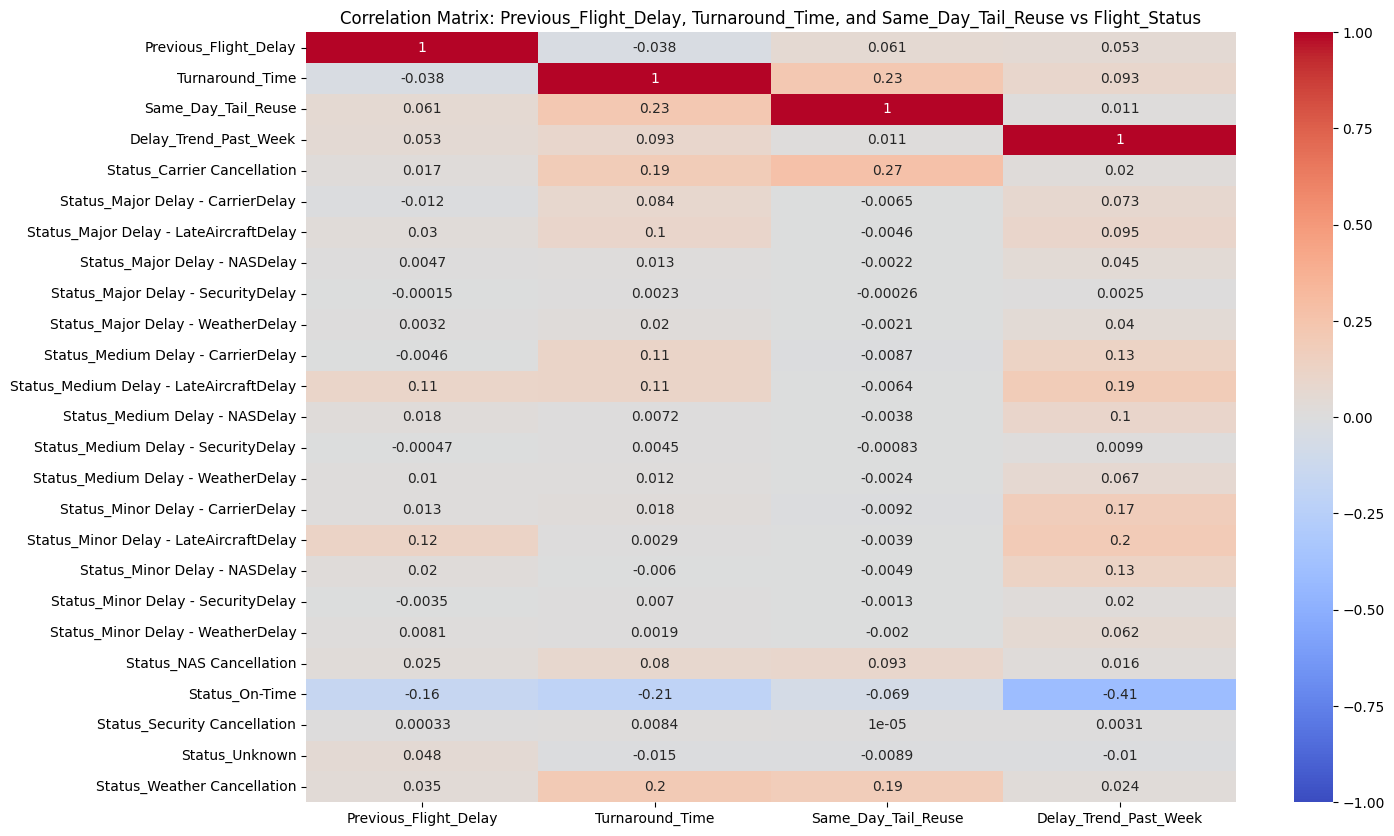

In [ ]:
# Select the relevant columns for correlation
correlation_columns = ['Previous_Flight_Delay', 'Turnaround_Time', 'Same_Day_Tail_Reuse', 'Delay_Trend_Past_Week']

# Create binary columns for each Flight_Status category
flight_status_dummies = pd.get_dummies(data['Flight_Status'], prefix='Status')

# Concatenate the binary columns with the selected features
correlation_data = pd.concat([data[correlation_columns], flight_status_dummies], axis=1)

# Compute the correlation matrix
correlation_matrix = correlation_data.corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix[correlation_columns], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix: Previous_Flight_Delay, Turnaround_Time, and Same_Day_Tail_Reuse vs Flight_Status')
plt.show()

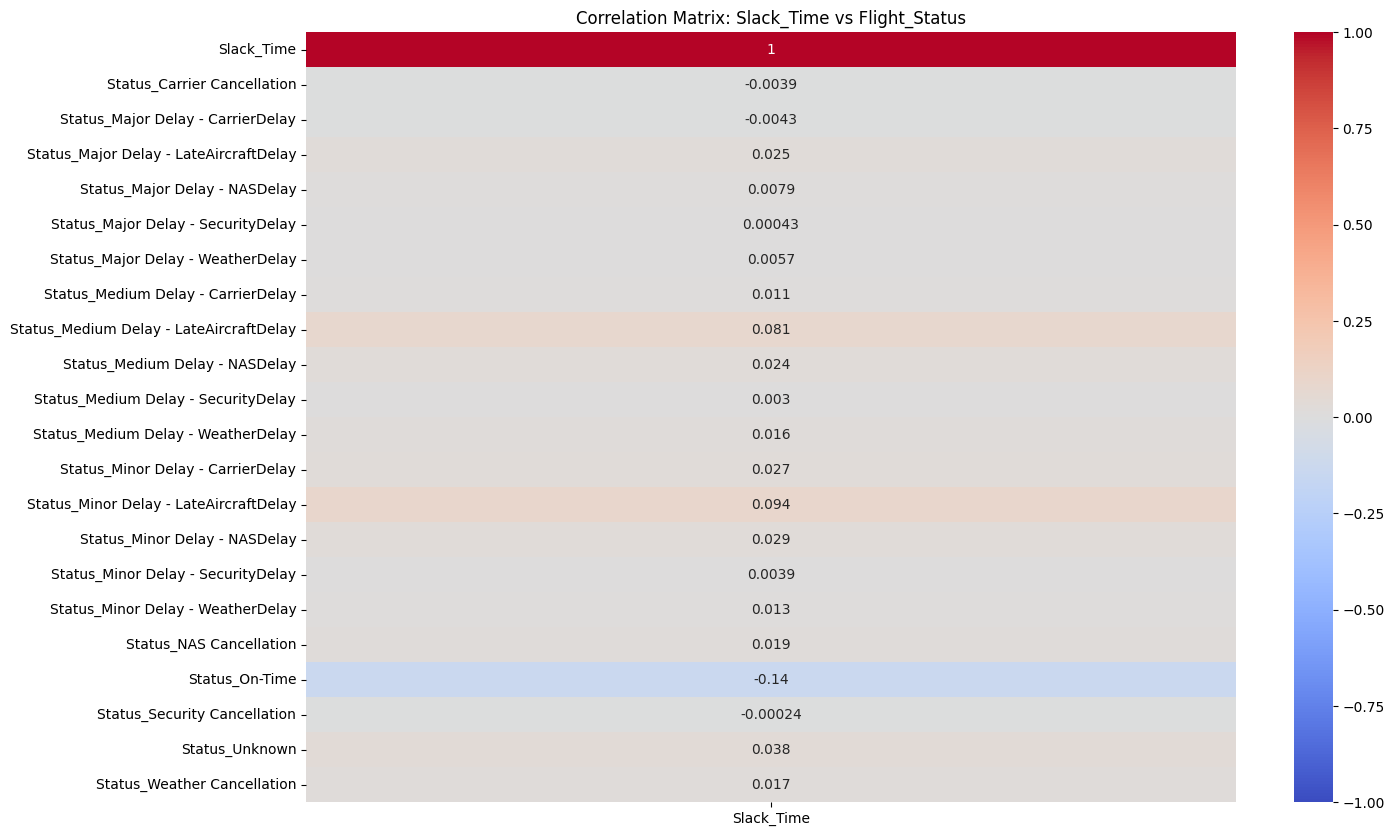

In [ ]:
# Create Slack_Time feature
data['Slack_Time'] = data['CRSArrTime'] - data['CRSElapsedTime']

# Create binary columns for each Flight_Status category
flight_status_dummies = pd.get_dummies(data['Flight_Status'], prefix='Status')

# Concatenate the binary columns with the Slack_Time feature
correlation_data = pd.concat([data[['Slack_Time']], flight_status_dummies], axis=1)

# Compute the correlation matrix
slack_time_corr = correlation_data.corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(slack_time_corr[['Slack_Time']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix: Slack_Time vs Flight_Status')
plt.show()

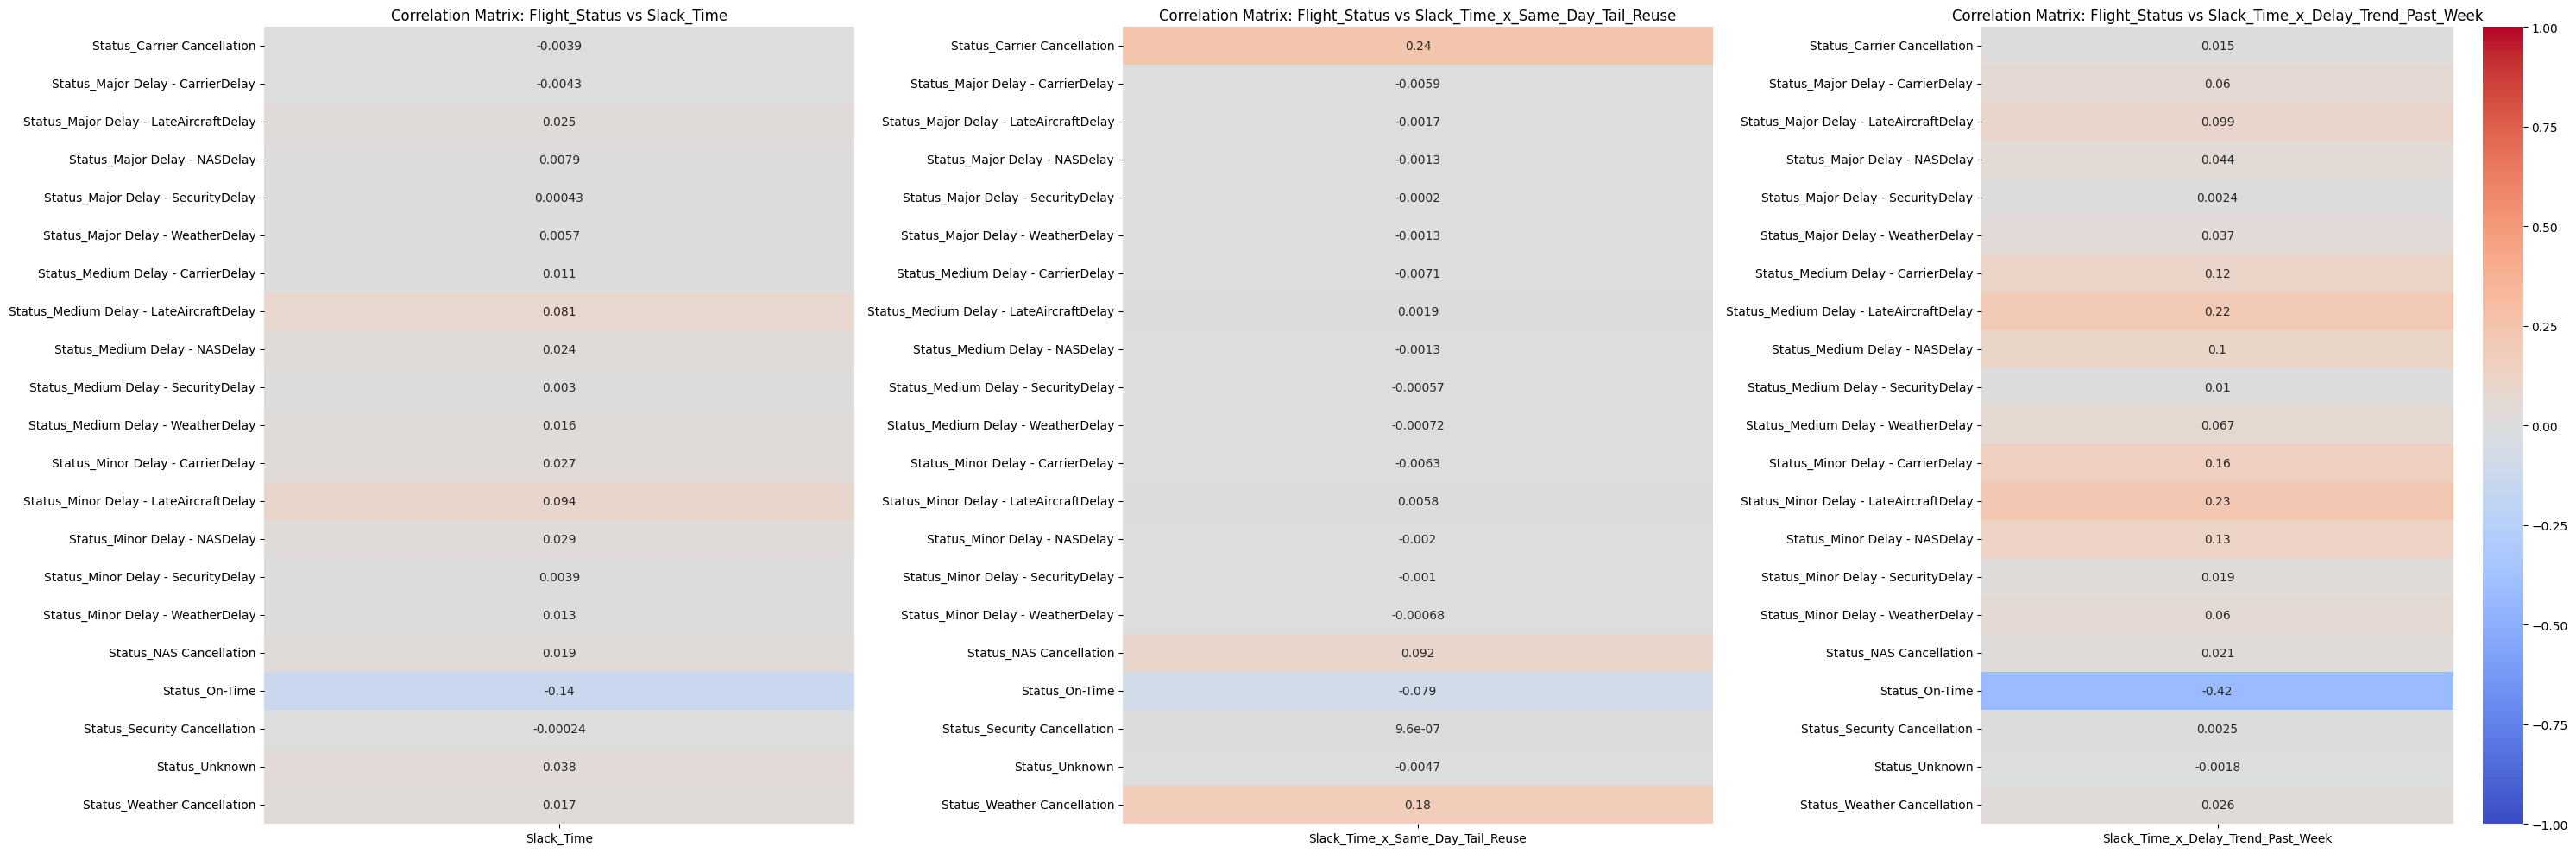

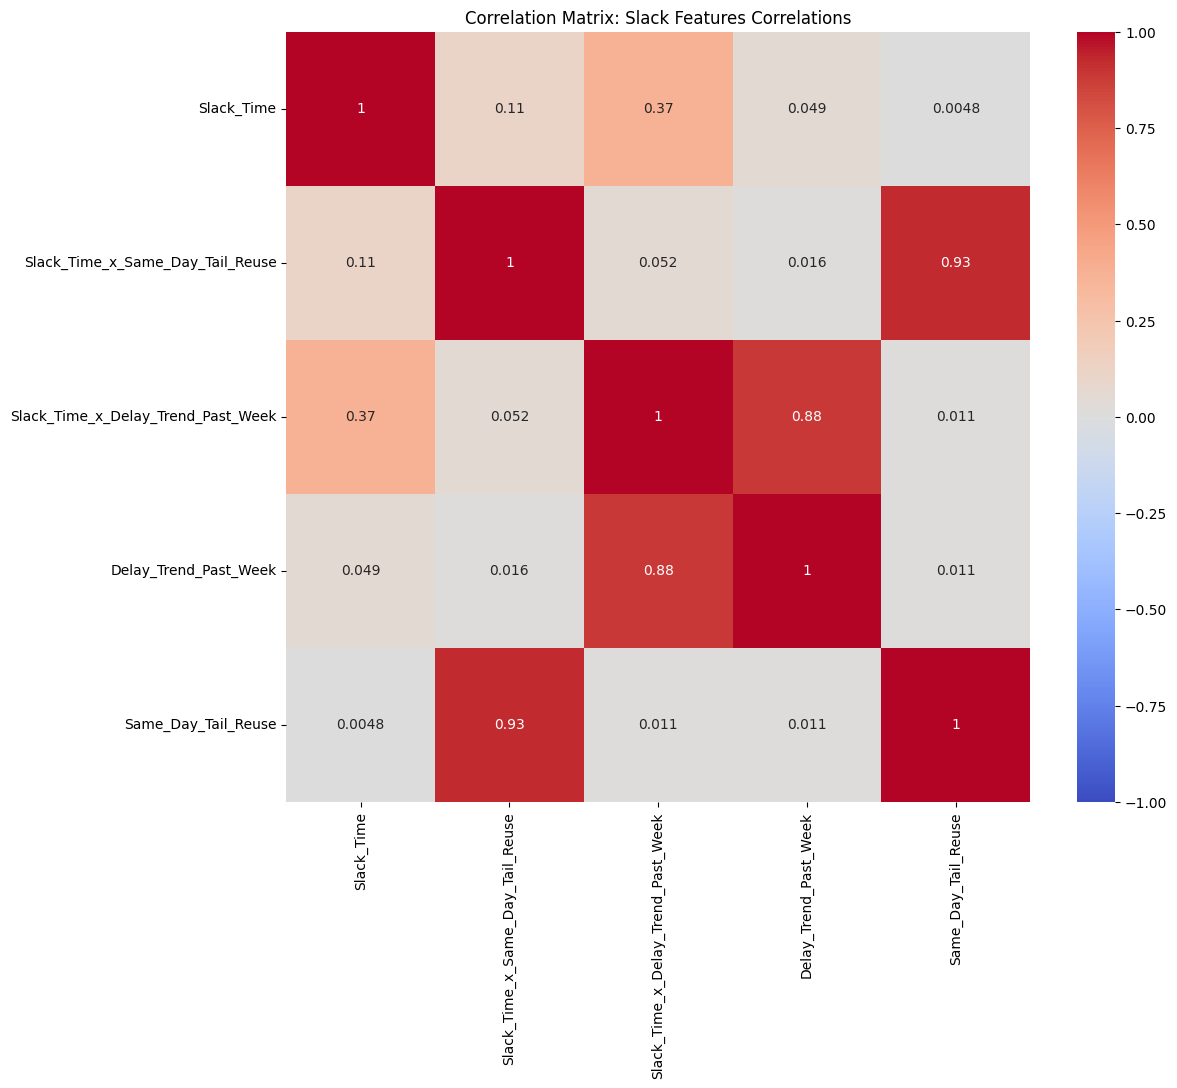

In [ ]:
# Create interaction terms
data['Slack_Time_x_Same_Day_Tail_Reuse'] = data['Slack_Time'] * data['Same_Day_Tail_Reuse']
data['Slack_Time_x_Delay_Trend_Past_Week'] = data['Slack_Time'] * data['Delay_Trend_Past_Week']

# Prepare data for correlation analysis
interaction_terms = data[['Slack_Time', 'Slack_Time_x_Same_Day_Tail_Reuse', 'Slack_Time_x_Delay_Trend_Past_Week', 'Delay_Trend_Past_Week', 'Same_Day_Tail_Reuse']]
# Create binary columns for each Flight_Status category
flight_status_dummies = pd.get_dummies(data['Flight_Status'], prefix='Status')

# Concatenate the binary columns with the interaction terms
correlation_data = pd.concat([interaction_terms, flight_status_dummies], axis=1)

# Compute the correlation matrix
correlation_matrix = correlation_data.corr()

# Plot the heatmap for interaction terms vs status features
plt.figure(figsize=(30, 10))

# Plot heatmap for Slack_Time
plt.subplot(1, 3, 1)
sns.heatmap(correlation_matrix.loc[status_features, ['Slack_Time']], annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=False)
plt.title('Correlation Matrix: Flight_Status vs Slack_Time')

# Plot heatmap for Slack_Time_x_Same_Day_Tail_Reuse
plt.subplot(1, 3, 2)
sns.heatmap(correlation_matrix.loc[status_features, ['Slack_Time_x_Same_Day_Tail_Reuse']], annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=False)
plt.title('Correlation Matrix: Flight_Status vs Slack_Time_x_Same_Day_Tail_Reuse')

# Plot heatmap for Slack_Time_x_Delay_Trend_Past_Week
plt.subplot(1, 3, 3)
sns.heatmap(correlation_matrix.loc[status_features, ['Slack_Time_x_Delay_Trend_Past_Week']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix: Flight_Status vs Slack_Time_x_Delay_Trend_Past_Week')

plt.tight_layout()
plt.show()

# Plot the heatmap for slack features correlations within each other
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix.loc[['Slack_Time', 'Slack_Time_x_Same_Day_Tail_Reuse', 'Slack_Time_x_Delay_Trend_Past_Week', 'Delay_Trend_Past_Week', 'Same_Day_Tail_Reuse'], 
                                   ['Slack_Time', 'Slack_Time_x_Same_Day_Tail_Reuse', 'Slack_Time_x_Delay_Trend_Past_Week', 'Delay_Trend_Past_Week', 'Same_Day_Tail_Reuse']], 
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix: Slack Features Correlations')
plt.show()


### **Feature Correlation and Redundancy Analysis: Slack-Related Features**

To assess the utility and uniqueness of newly engineered slack-related features, we conducted a correlation analysis both with the target variable (`Flight_Status`) and among the engineered features themselves. The focus was on the following variables:

- `Slack_Time`: The difference between the scheduled arrival time and the scheduled flight duration. It captures the operational buffer built into the schedule.
- `Slack_Time_x_Same_Day_Tail_Reuse`: An interaction term reflecting how tail reuse frequency interacts with schedule buffer.
- `Slack_Time_x_Delay_Trend_Past_Week`: An interaction between the historical delay trend and slack time, representing compounded operational stress.
- `Delay_Trend_Past_Week`: The rolling average of delay minutes for the same route over the past 7 days.
- `Same_Day_Tail_Reuse`: The number of flights scheduled for the same aircraft (tail number) on the same day.

### **Correlation with Flight Status**

From the first heatmap, the most informative findings include:

- **`Slack_Time_x_Delay_Trend_Past_Week`** exhibited the strongest negative correlation with "On-Time" status (`-0.42`), and moderate positive correlations with multiple delay categories (e.g., minor and medium delays up to `0.23`). This confirms that combining current schedule slack with recent delay patterns produces a highly predictive signal.
  
- **`Slack_Time_x_Same_Day_Tail_Reuse`** demonstrated lower overall correlation with flight statuses. The highest observed correlation was with weather cancellations (`0.18`), but most other values were weak, suggesting this feature may offer limited incremental value.

- **`Slack_Time`**, as a standalone feature, showed a mild negative correlation with "On-Time" status (`-0.14`). It remains a reasonable predictor on its own.

### **Redundancy Check: Feature-to-Feature Correlation**

The second heatmap examined redundancy between these slack-related features:

- **`Slack_Time_x_Delay_Trend_Past_Week`** had a high correlation (`0.88`) with `Delay_Trend_Past_Week` and a moderate correlation (`0.37`) with `Slack_Time`. While this suggests partial redundancy, the interaction effect likely captures a compound risk scenario that is not linearly represented in either parent variable.

- **`Slack_Time_x_Same_Day_Tail_Reuse`** had a very strong correlation (`0.93`) with `Same_Day_Tail_Reuse`, suggesting high redundancy. This interaction does not appear to capture enough additional variance to warrant retention alongside the original `Same_Day_Tail_Reuse` variable.

- **`Slack_Time`**, `Delay_Trend_Past_Week`, and `Same_Day_Tail_Reuse` had low pairwise correlations, confirming their independence and reinforcing their value as standalone features.